In [3]:
##Importing libraries
from joblib import dump, load
import os, sys, pickle, time, re, csv
from collections import defaultdict#
import mc
from operator import itemgetter

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [4]:
# these are the models you can choose from.
results_path = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives/group/cells_per_model-11-07-2025"

list_of_all_results = []
loc_results = []
# List all files and print their basenames
for file in os.listdir(results_path):
    if 'location' in file or 'loc_model' in file:
        print(file) 
        loc_results.append(file)
    list_of_all_results.append(file)

# first, focus on the location ones.
"location_reg_w_partial_musicboxes_only_reps_6-10_avg_in_20_bins_across_runs.csv"
"location_reg_w_partial_musicboxes_only_reps_1-10_avg_in_20_bins_across_runs.csv"
"location_reg_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv"
"loc_model_w_partial_musicboxes_only_reps_1-10_avg_in_20_bins_across_runs.csv"
"loc_model_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv"
"loc_model_w_partial_musicboxes_only_reps_6-10_avg_in_20_bins_across_runs.csv"

location_reg_w_partial_musicboxes_only_reps_6-10_avg_in_20_bins_across_runs.csv
loc_model_w_partial_musicboxes_only_reps_1-10_avg_in_20_bins_across_runs.csv
location_reg_w_partial_musicboxes_only_reps_1-10_avg_in_20_bins_across_runs.csv
location_reg_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv
loc_model_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv
loc_model_w_partial_musicboxes_only_reps_6-10_avg_in_20_bins_across_runs.csv


'loc_model_w_partial_musicboxes_only_reps_6-10_avg_in_20_bins_across_runs.csv'

In [5]:
print(f"now loading {loc_results[4]} ")
loc_df = pd.read_csv(f"{results_path}/{loc_results[4]}")
# filter for significant location cells
loc_df_sig = loc_df[loc_df['p_val_time'] < 0.05].reset_index(drop=True)
print(f"based on {loc_results[4]}, there are {len(loc_df_sig)} significant cells/")
# these are the cells that you will want to plot.
#add a column of session names
sessions = []
for idx, row in loc_df_sig.iterrows():
    sessions.append('sub-'+row['cell'].split('_')[2])
loc_df_sig['sessions'] = sessions 

# sessions to load
sig_sessions = np.unique(sessions)
loc_df_sig.head()

now loading loc_model_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv 
based on loc_model_w_partial_musicboxes_only_reps_1-5_avg_in_20_bins_across_runs.csv, there are 57 significant cells/


roi                        cell  average_corr      model  \
0          OFC     02-chan101_sesh_01_LOFC      0.276073  loc_model   
1   entorhinal      01-chan104_sesh_02_LEC      0.213951  loc_model   
2          ACC  06-GA1-RAC6_sesh_03_RpgACC      0.316220  loc_model   
3          ACC  05-mLF2aCa08_sesh_07_LdACC      0.175542  loc_model   
4  hippocampal    17-mRT2bHb04_sesh_07_RHC      0.286734  loc_model   

   time_perm_0  time_perm_1  time_perm_2  time_perm_3  time_perm_4  \
0    -0.063316     0.254930    -0.043903    -0.186320     0.014162   
1    -0.023004    -0.138282     0.024950    -0.023482     0.017391   
2    -0.016191     0.158838     0.162610     0.048072    -0.280604   
3     0.043921     0.106298    -0.078712    -0.016422     0.030775   
4    -0.146073    -0.027497     0.142284    -0.034215    -0.075153   

   time_perm_5  ...  time_perm_492  time_perm_493  time_perm_494  \
0     0.068844  ...      -0.086717      -0.240851       0.064822   
1    -0.093670  ...       0.018935      -0.188472       0.085538   
2     0.114151  ...       0.215489       0.018076       0.099897   
3    -0.013740  ...       0.096441      -0.150711      -0.077032   
4     0.008695  ...       0.045983      -0.026768      -0.088840   

   time_perm_495  time_perm_496  time_perm_497  time_perm_498  time_perm_499  \
0       0.252013       0.076594       0.011847      -0.064041       0.033737   
1      -0.025114       0.096467       0.116069       0.045690       0.226947   
2      -0.131302      -0.051519       0.028980       0.173017      -0.102884   
3      -0.151387      -0.031262       0.016125       0.046728      -0.038940   
4      -0.122274       0.174702      -0.064163      -0.006721      -0.038597   

   p_val_time  sessions  
0       0.026    sub-01  
1       0.030    sub-02  
2       0.006    sub-03  
3       0.008    sub-07  
4       0.000    sub-07  

[5 rows x 506 columns]

In [203]:
print(sig_sessions)

['sub-01' 'sub-02' 'sub-03' 'sub-07' 'sub-09' 'sub-10' 'sub-12' 'sub-15'
 'sub-16' 'sub-17' 'sub-18' 'sub-20' 'sub-25' 'sub-26' 'sub-29' 'sub-30'
 'sub-31' 'sub-34' 'sub-37' 'sub-39' 'sub-40' 'sub-41' 'sub-43' 'sub-46'
 'sub-48' 'sub-51' 'sub-52' 'sub-54' 'sub-56' 'sub-57' 'sub-58' 'sub-59']


In [199]:
print(sig_sessions)

['sub-01' 'sub-02' 'sub-03' 'sub-07' 'sub-09' 'sub-10' 'sub-12' 'sub-15'
 'sub-16' 'sub-17' 'sub-18' 'sub-20' 'sub-25' 'sub-26' 'sub-29' 'sub-30'
 'sub-31' 'sub-34' 'sub-37' 'sub-39' 'sub-40' 'sub-41' 'sub-43' 'sub-46'
 'sub-48' 'sub-51' 'sub-52' 'sub-54' 'sub-56' 'sub-57' 'sub-58' 'sub-59']


In [185]:
# identify the session, from there load the data. 
# start with session as there seem to be a few location cells.
sesh = 15

target_cells = []
avg_corr_target_cells = []
for idx, row in loc_df_sig.iterrows():
    if f"sesh_{sesh}" in row['cell']:
        target_cells.append(row['cell'])
        avg_corr_target_cells.append(row['average_corr'])

print(target_cells)
    

data_folder = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives"
subjects = [f"{sesh:02}"]
data = mc.analyse.helpers_human_cells.load_cell_data(data_folder, subjects)

print(data[f"sub-{sesh}"].keys())


['07-mRF2Ca08_sesh_15_RACC', '10-mRT2dHbEb02_sesh_15_REC', '12-mRT2dHbEb03_sesh_15_REC', '20-mRT2dHbEb08_sesh_15_REC', '21-mRT2dHbEb08_sesh_15_REC']
loading files for subject 15
dict_keys(['reward_configs', 'cell_labels', 'electrode_labels', 'timings', 'locations', 'neurons', 'buttons'])


In [113]:
# go through 'electrode_labels' and figure out the correct index of the cell array.
# take the first target cell.
target_idx = [
    idx for idx, label_cell in enumerate(data[f"sub-{sesh}"]['electrode_labels'])
    if any(target in label_cell or label_cell in target for target in target_cells)
]


# find out which grids are unique
unique_grids, idx_unique_grid, idx_same_grids, counts = np.unique(data[f"sub-{sesh}"]['reward_configs'], axis=0,
                                                        return_index=True,
                                                        return_inverse=True,
                                                        return_counts=True)

print(f"unique grids are {unique_grids}")
print(f"idx_unique_grid are {idx_unique_grid}")
print(f"idx_same_grids are {idx_same_grids}")
print(f"counts grids are {counts}")

firing_rate_cells = []
for target_cell in target_idx:
    # initialise mean firing rates array for all target neurons
    mean_firing_rates_locs = np.zeros((9, len(idx_unique_grid)))
    # then go through all unique grids and concatenate the neurons to compute the firing rate for each location per grid.
    for i, unique_task_idx in enumerate(idx_unique_grid): 
        # I need to concatenate the location and cell array from the same grids.
        all_task_idx = np.where(idx_same_grids == idx_same_grids[i])[0]
        # print(f"same grids are in {all_task_idx}")
        all_neurons_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['neurons'])
        curr_neuron_currtask = [all_neurons[target_cell] for all_neurons in all_neurons_currtask]
        curr_neuron_currtask_flat = np.concatenate(curr_neuron_currtask)

        # DO THE SAME FOR LOCATIONS!
        all_locs_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['locations'])
        curr_locs_currtask_flat = np.concatenate(all_locs_currtask)

        for loc in range(9):
            mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()
            
    print(mean_firing_rates_locs)
    firing_rate_cells.append(mean_firing_rates_locs)


unique grids are [[1. 6. 9. 7.]
 [2. 7. 9. 4.]
 [3. 2. 8. 6.]
 [4. 5. 7. 8.]
 [5. 1. 8. 3.]
 [6. 3. 7. 9.]]
idx_unique_grid are [1 3 5 2 0 4]
idx_same_grids are [4 0 3 1 5 2 3 2 0 5 1 4 3 0 4 5 2 1 3 2 4 1 5 0]
counts grids are [4 4 4 4 4 4]
[[0.00229885 0.00979021 0.01274788 0.0095986  0.         0.00255754]
 [0.00294737 0.00688073 0.01652893 0.00595238 0.01369863 0.0054615 ]
 [0.00508553 0.01494253 0.00689655 0.         0.00436893 0.00450197]
 [0.00322789 0.00796178 0.01226751 0.00546177 0.01046512 0.        ]
 [0.00736149 0.00304878 0.01286904 0.00111794 0.00632911 0.00384986]
 [0.01092896 0.00340426 0.01002506 0.00515021 0.00461255 0.00374532]
 [0.00415973 0.00475436 0.00425733 0.00223414 0.00134228 0.00925926]
 [0.0004095  0.01175088 0.00611621 0.00326645 0.002693   0.00582072]
 [0.00391389 0.         0.02040816 0.00374933 0.00167154 0.00104712]]
[[0.01471264 0.01258741 0.02124646 0.0078534  0.0104712  0.00255754]
 [0.03326316 0.02637615 0.01928375 0.01877289 0.02910959 0.0715456 

In [124]:
# compute mean correlation between all grids

mean_grid_corr = []
for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
    # Compute pairwise Pearson correlation between columns (i.e., grids)
    corr_matrix = np.corrcoef(FR_maps_neuron.T)  # transpose: shape (n_grids, 9) --> correlation of grids

    # Mask upper triangle excluding diagonal
    upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
    mean_corr = np.nanmean(corr_matrix[upper_triangle_indices])  # nanmean in case of NaNs
    mean_grid_corr.append(mean_corr)
    print(f"Neuron {neuron_i}: Mean grid correlation = {mean_corr:.3f}")

    

Neuron 0: Mean grid correlation = -0.105
Neuron 1: Mean grid correlation = 0.696
Neuron 2: Mean grid correlation = 0.588
Neuron 3: Mean grid correlation = 0.454
Neuron 4: Mean grid correlation = 0.350


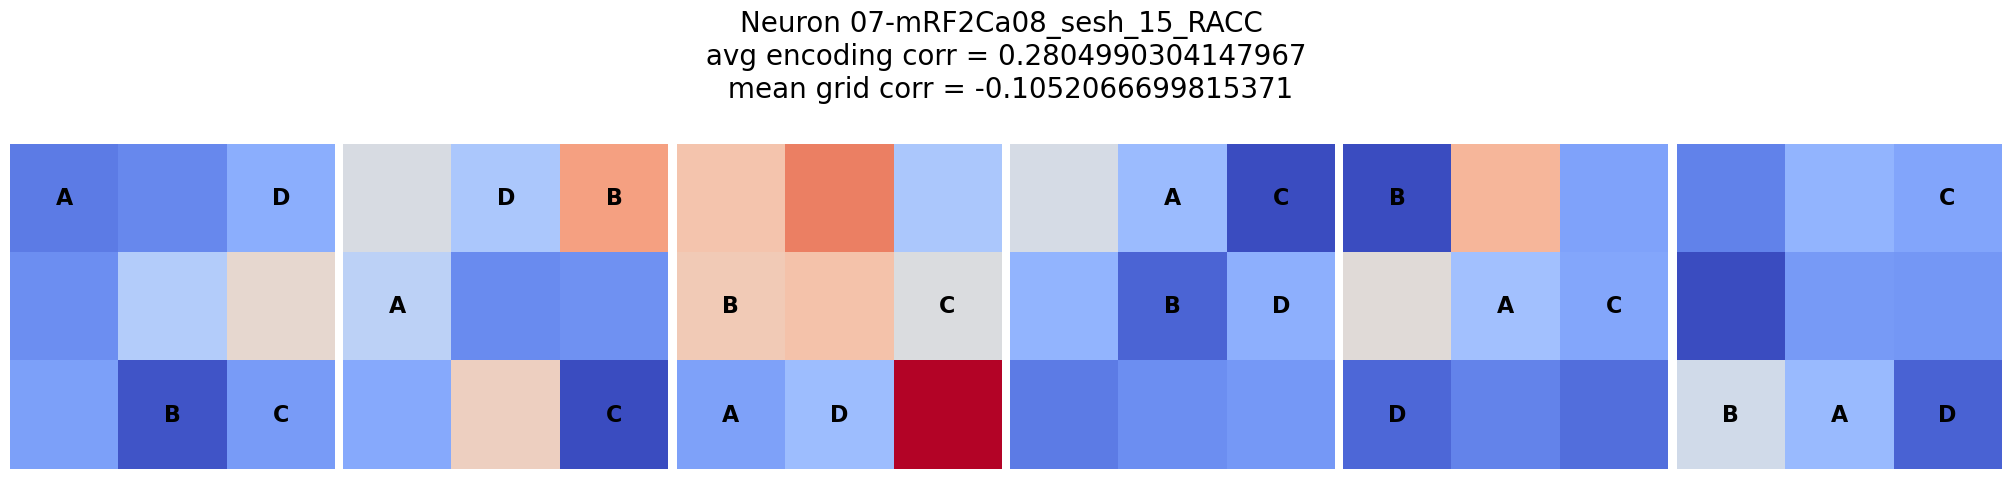

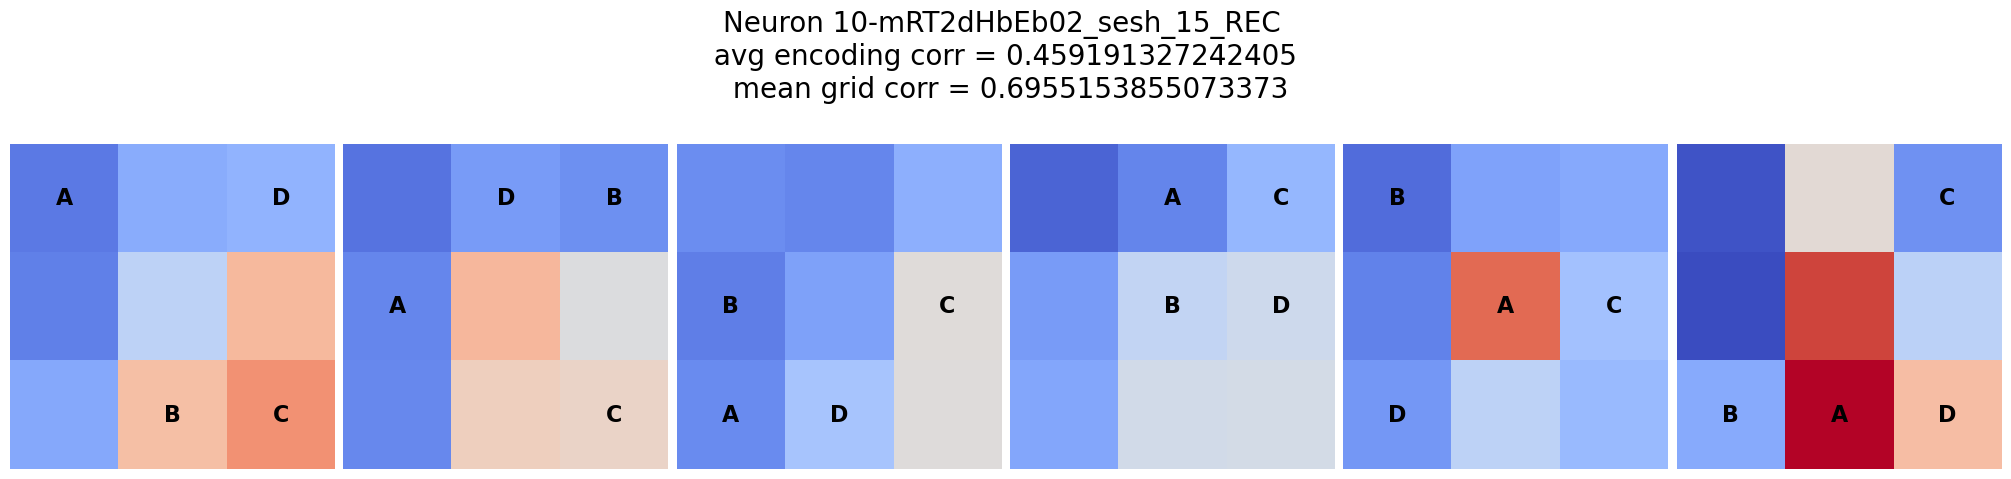

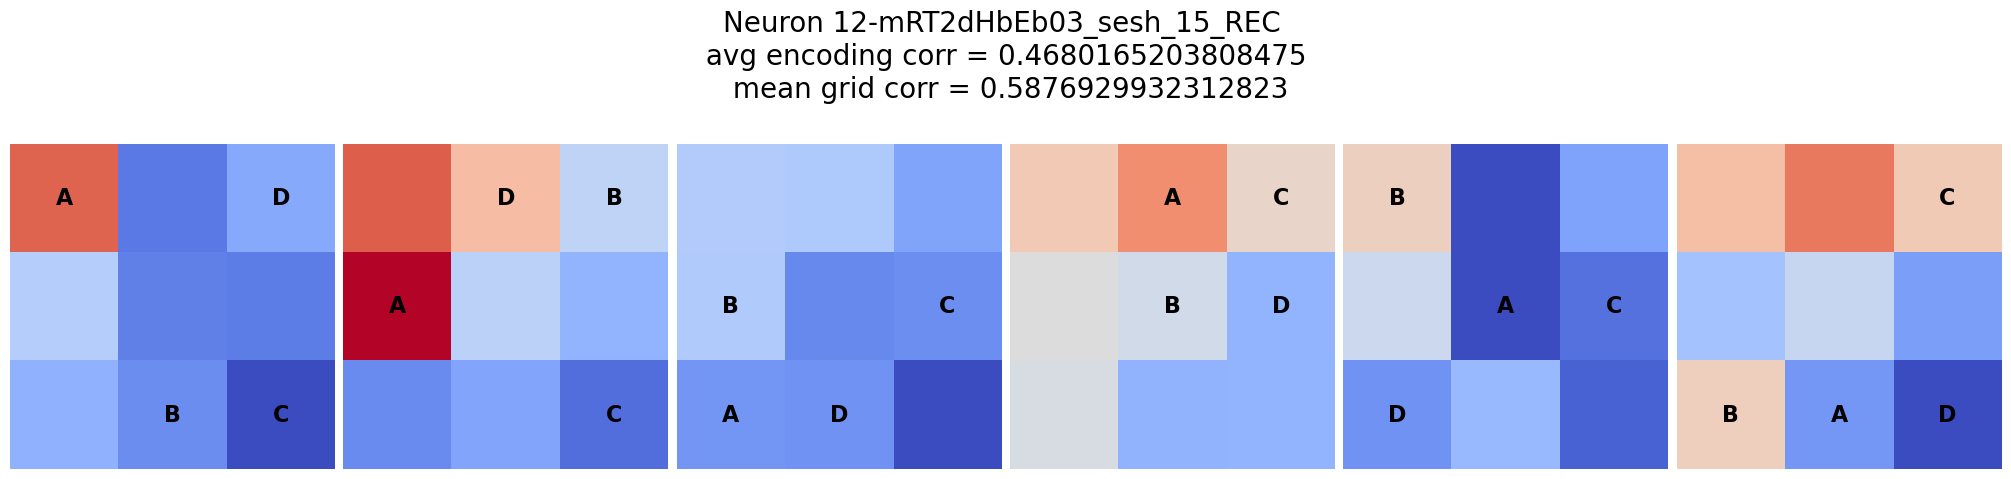

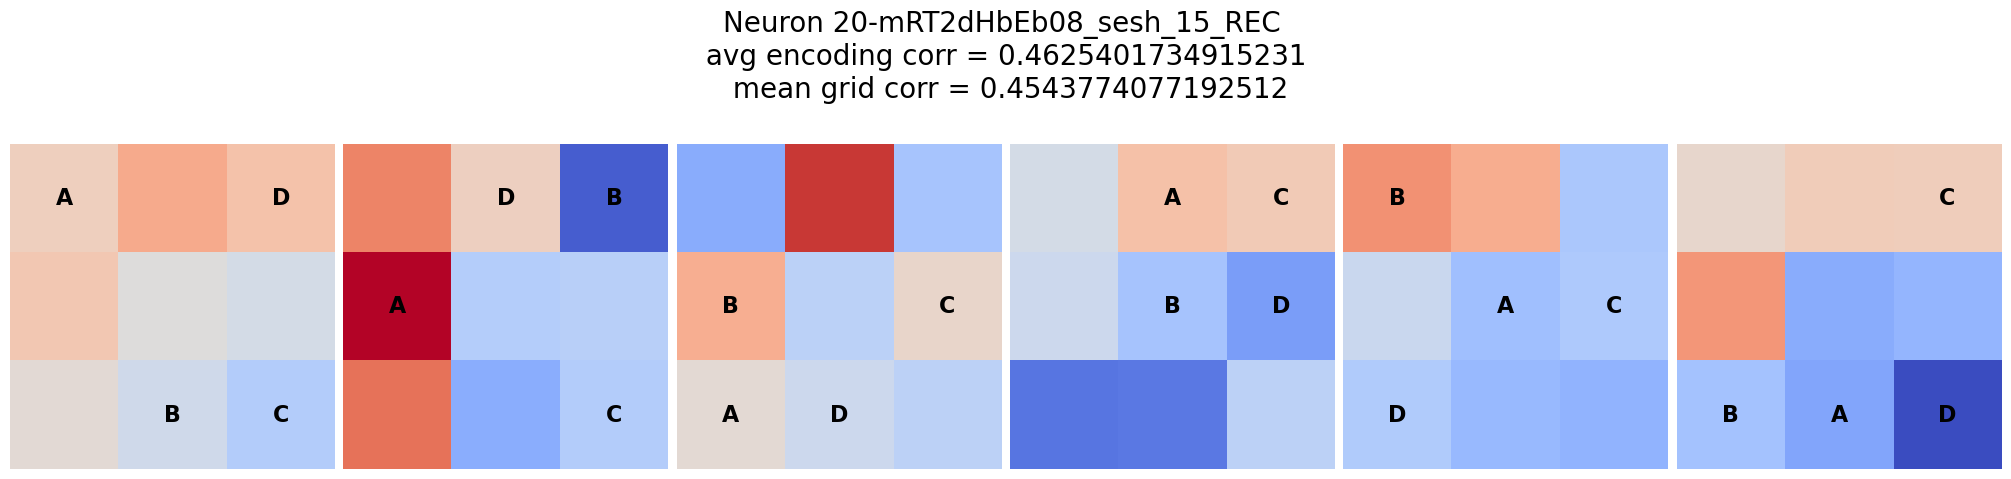

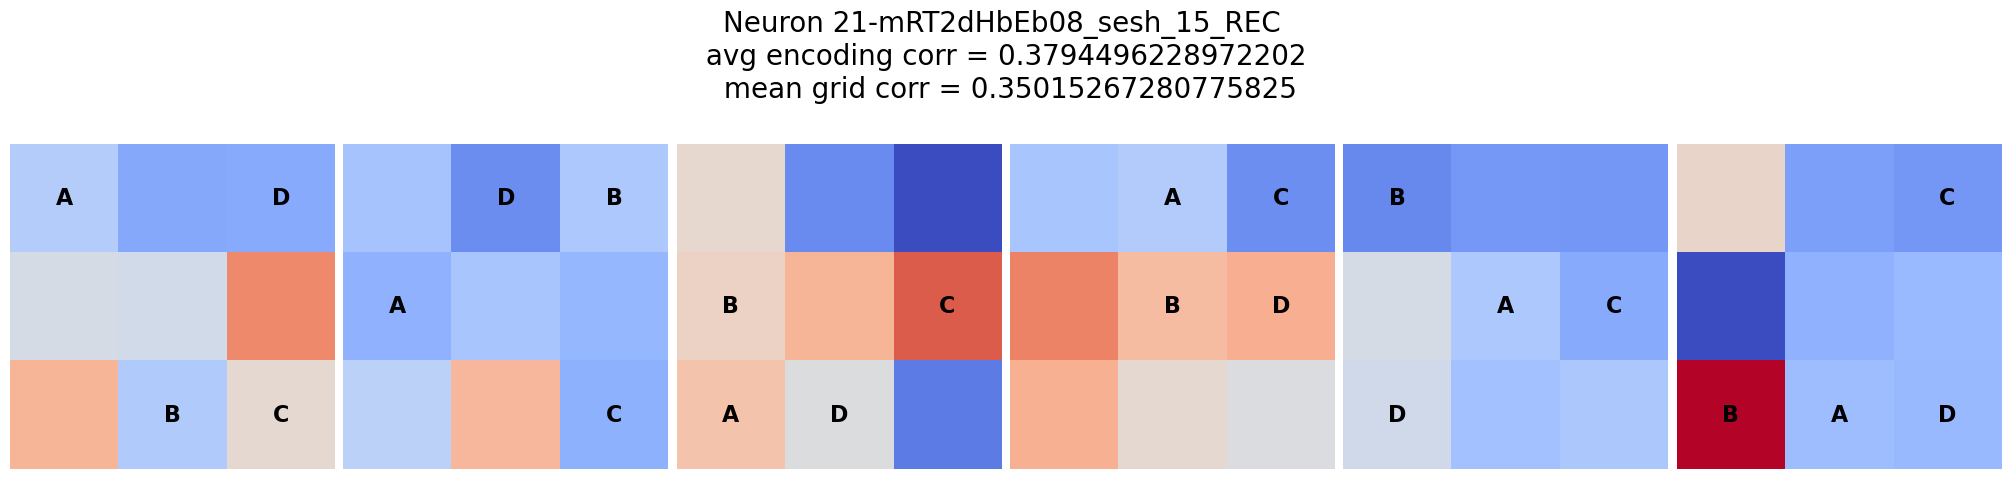

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# firing_rate_cells is a list of (9 x N) arrays, one per neuron
for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
    max_rate = np.nanmax(FR_maps_neuron)
    min_rate = np.nanmin(FR_maps_neuron)

    fig1, f1_axes = plt.subplots(figsize=(20, 5), ncols=FR_maps_neuron.shape[1], nrows=1, constrained_layout=True)
    
    # If only one grid, f1_axes won't be iterable – wrap in list
    if FR_maps_neuron.shape[1] == 1:
        f1_axes = [f1_axes]

    for task_ind in np.arange(FR_maps_neuron.shape[1]):
        FR_map_neuron_task = FR_maps_neuron[:, task_ind].reshape(3, 3)
        ax1 = f1_axes[task_ind]

        im = ax1.matshow(FR_map_neuron_task, cmap='coolwarm', vmin=min_rate, vmax=max_rate)
        ax1.axis('off')

        for i_r, reward in enumerate(unique_grids[task_ind]):
            if i_r == 0:
                write = 'A'
            elif i_r == 1:
                write = 'B'
            elif i_r == 2:
                write = 'C'
            elif i_r == 3:
                write = 'D'
            pos_idx = int(reward) - 1  # assuming rewards are 1-based location indices
            row, col = Task_grid_plotting[pos_idx]
            ax1.text(col, row, write, ha='center', va='center',
                     color='black', fontsize=16, fontweight='bold')

    fig1.suptitle(f'Neuron {target_cells[neuron_i]} \n avg encoding corr = {avg_corr_target_cells[neuron_i]} \n mean grid corr = {mean_grid_corr[neuron_i]}', fontsize=20)
    plt.show()


01
loading files for subject 01
unique grids are [[1. 4. 8. 2.]
 [1. 6. 3. 5.]
 [1. 8. 7. 3.]
 [3. 4. 9. 8.]
 [6. 2. 7. 9.]
 [8. 2. 5. 7.]]
Neuron 0: Mean grid correlation = 0.117


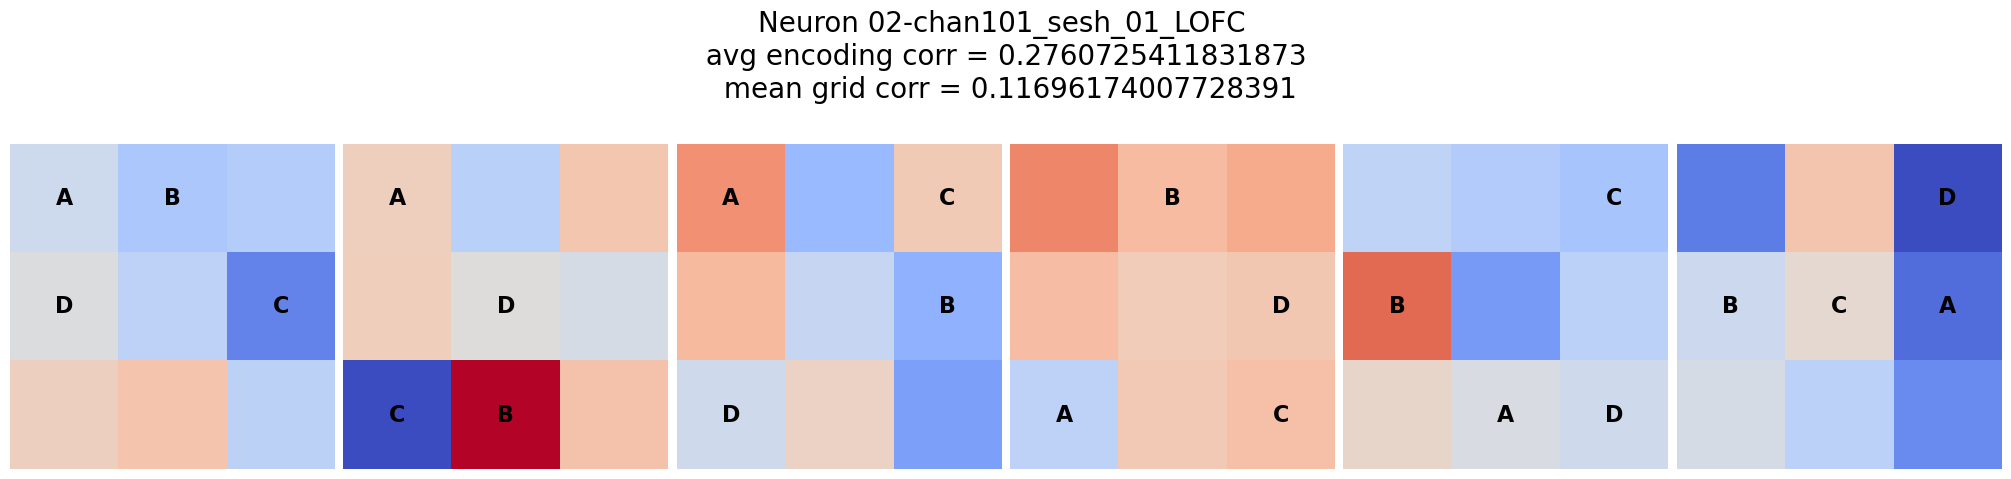

02
loading files for subject 02
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.053


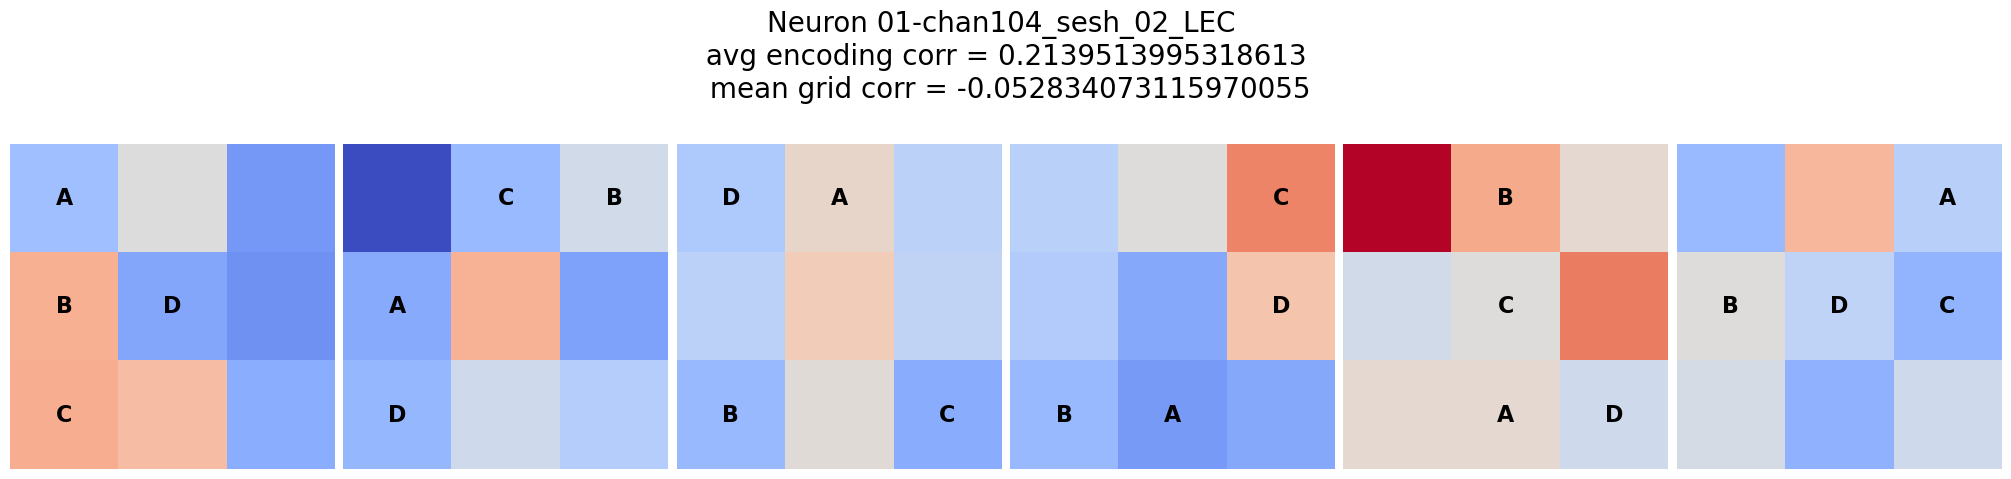

03
loading files for subject 03
unique grids are [[1. 5. 2. 3.]
 [2. 1. 5. 8.]
 [3. 9. 4. 6.]
 [7. 3. 1. 9.]
 [7. 5. 8. 1.]
 [9. 8. 6. 4.]]
Neuron 0: Mean grid correlation = 0.061


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_14790/3454053708.py:53: RuntimeWarning: Mean of empty slice.
  mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()
/Users/xpsy1114/miniconda3/envs/env_multiple_clocks/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


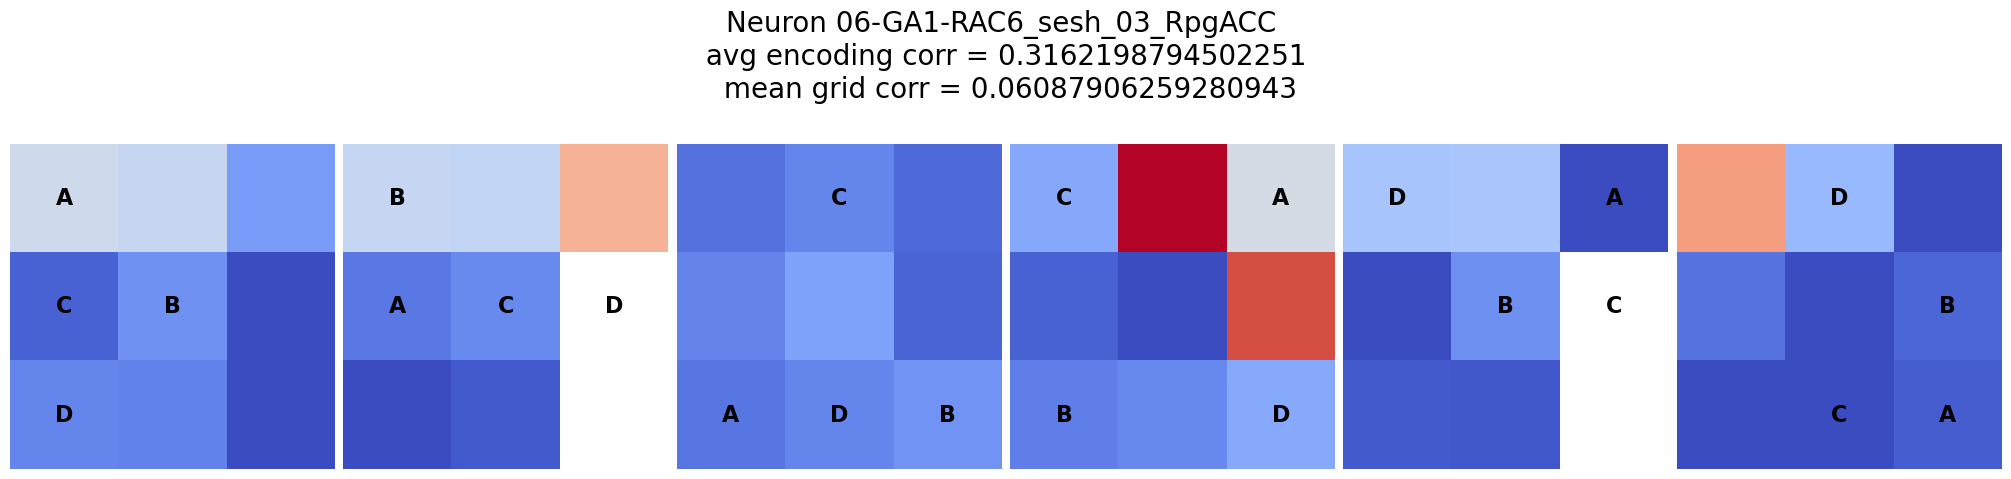

07
loading files for subject 07
unique grids are [[1. 3. 5. 6.]
 [1. 8. 4. 9.]
 [2. 5. 7. 8.]
 [2. 5. 8. 6.]
 [2. 9. 8. 5.]
 [3. 6. 2. 4.]
 [5. 1. 7. 4.]
 [5. 3. 2. 6.]
 [7. 1. 4. 9.]
 [7. 4. 3. 1.]
 [8. 7. 5. 9.]
 [9. 7. 6. 4.]]
Neuron 0: Mean grid correlation = 0.027
Neuron 1: Mean grid correlation = 0.084


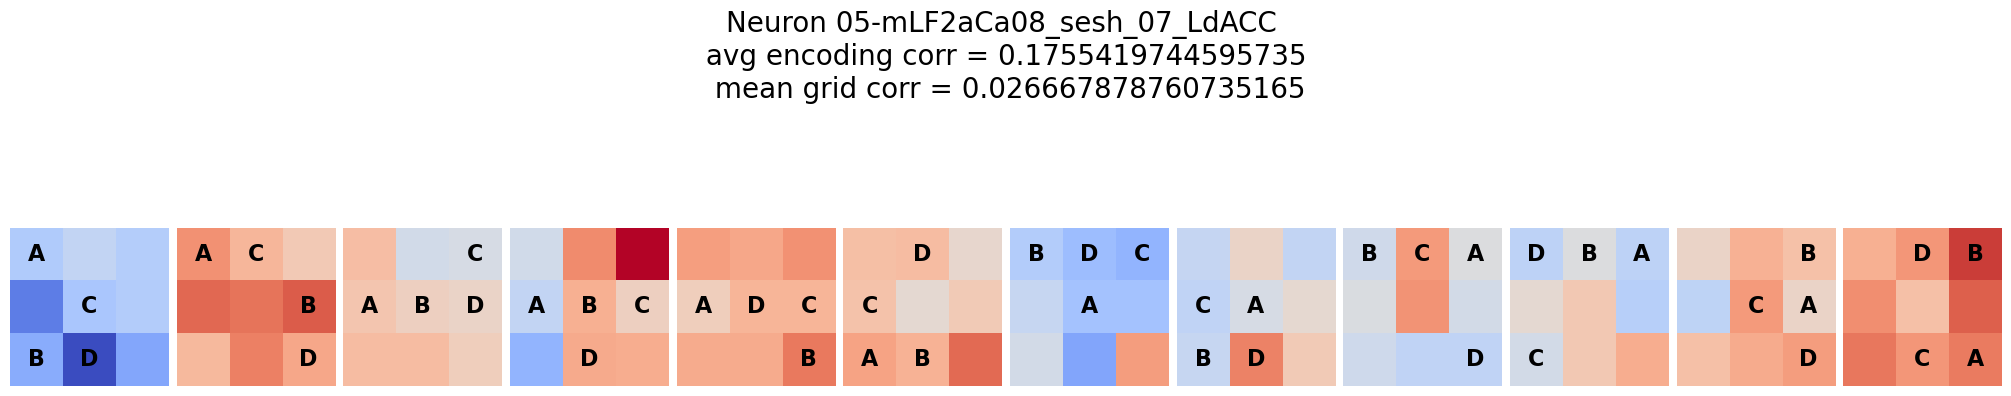

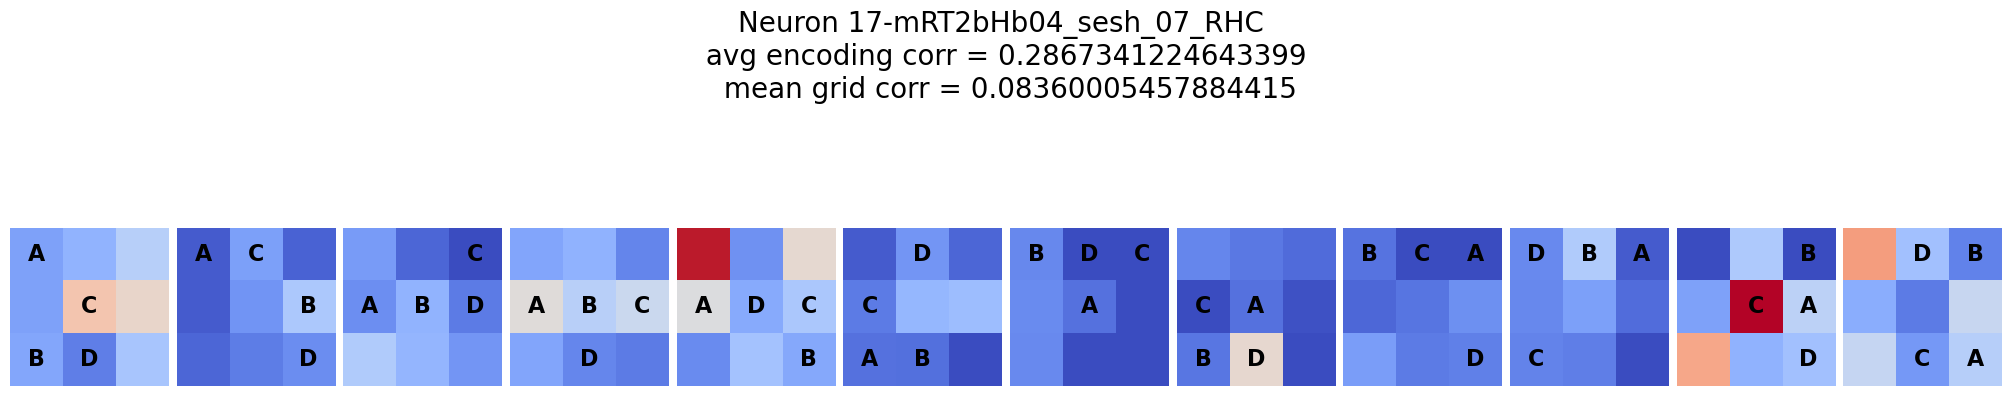

09
loading files for subject 09
unique grids are [[2. 1. 7. 8.]
 [3. 4. 2. 1.]
 [5. 8. 3. 6.]
 [6. 7. 5. 4.]
 [9. 1. 6. 7.]
 [9. 5. 1. 4.]]
Neuron 0: Mean grid correlation = -0.093
Neuron 1: Mean grid correlation = 0.180
Neuron 2: Mean grid correlation = 0.215
Neuron 3: Mean grid correlation = -0.035
Neuron 4: Mean grid correlation = 0.037


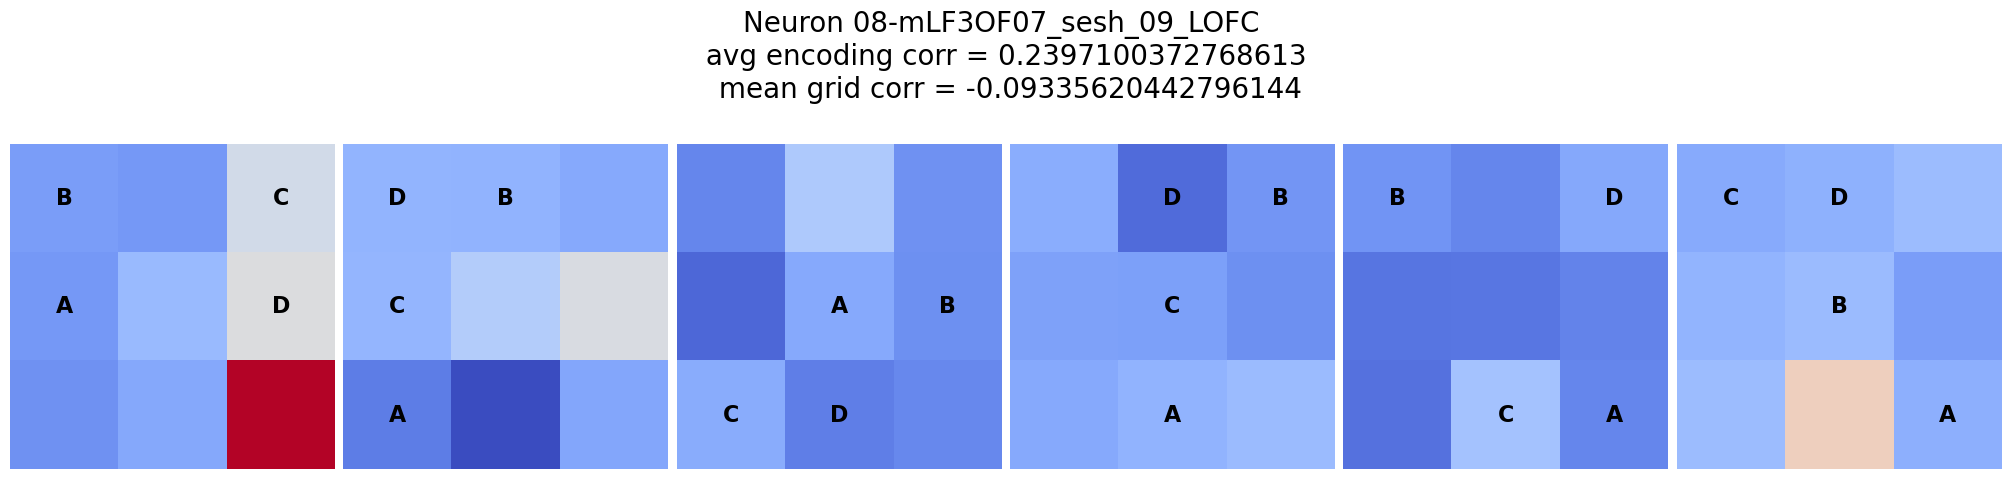

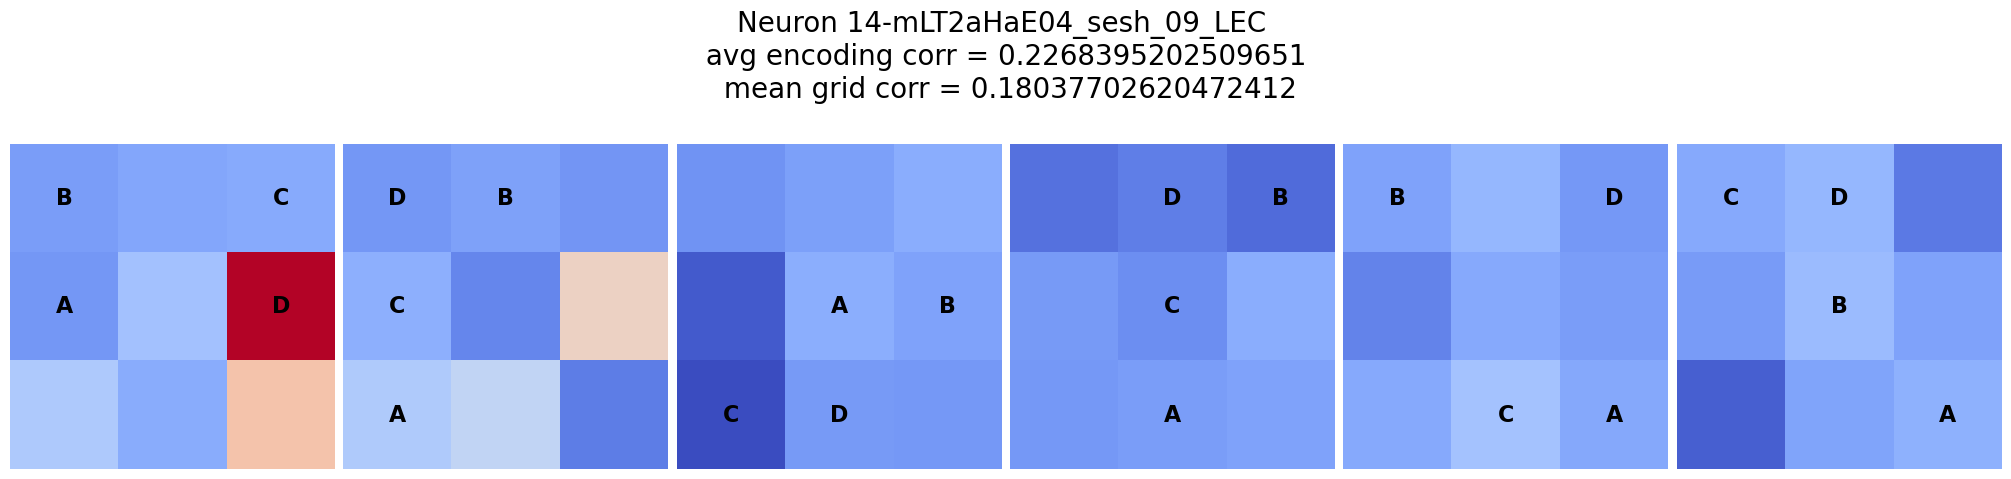

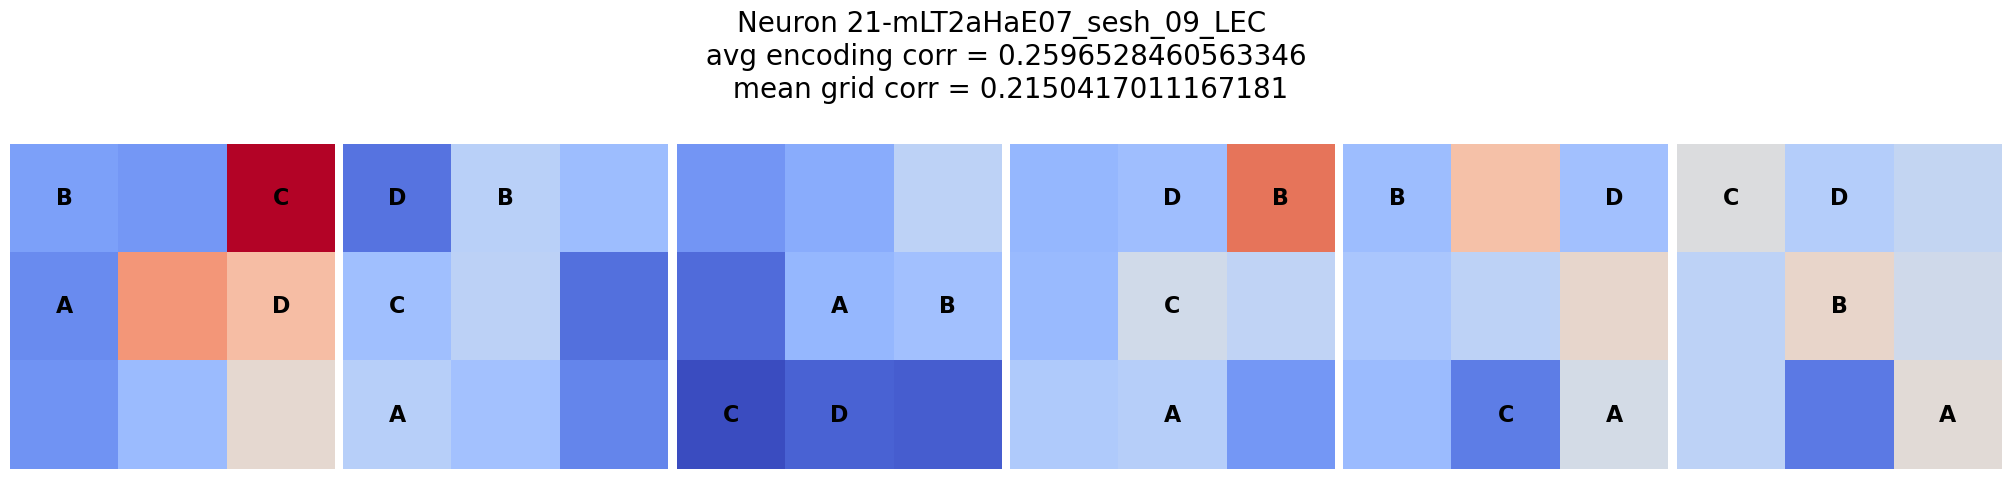

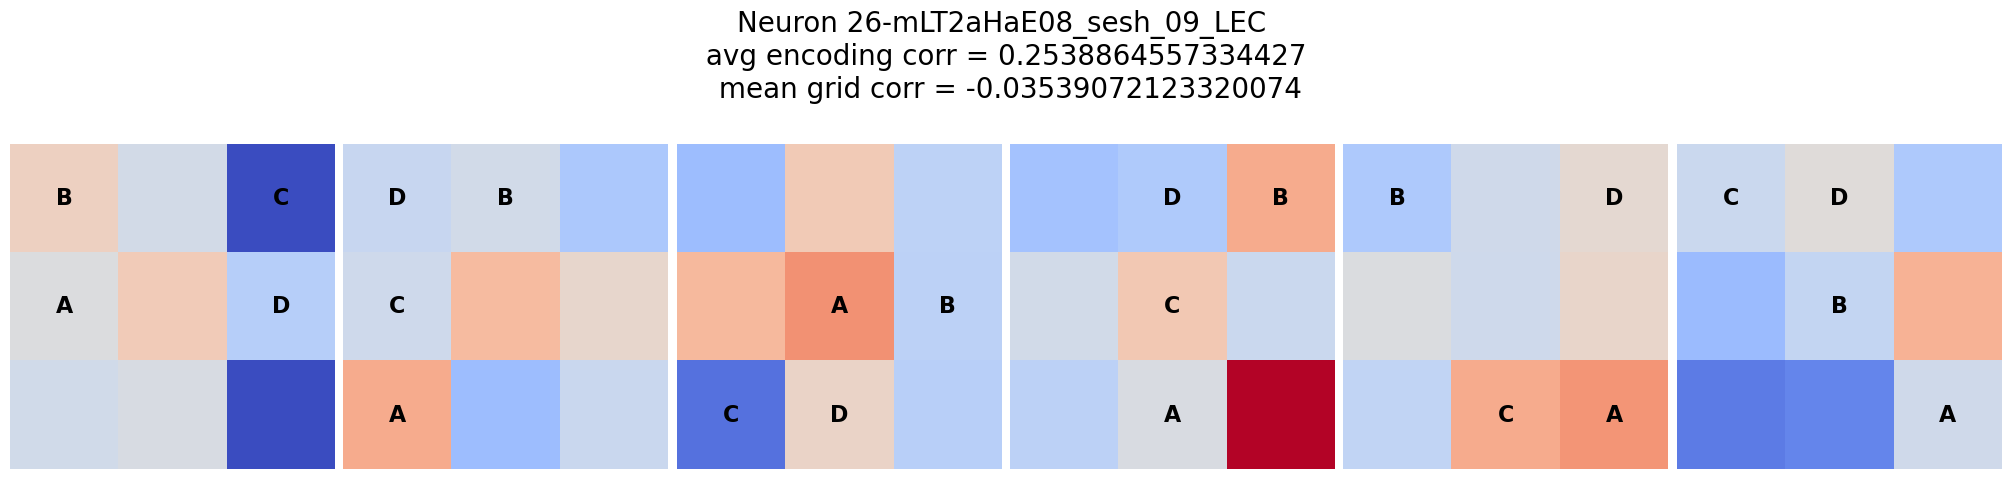

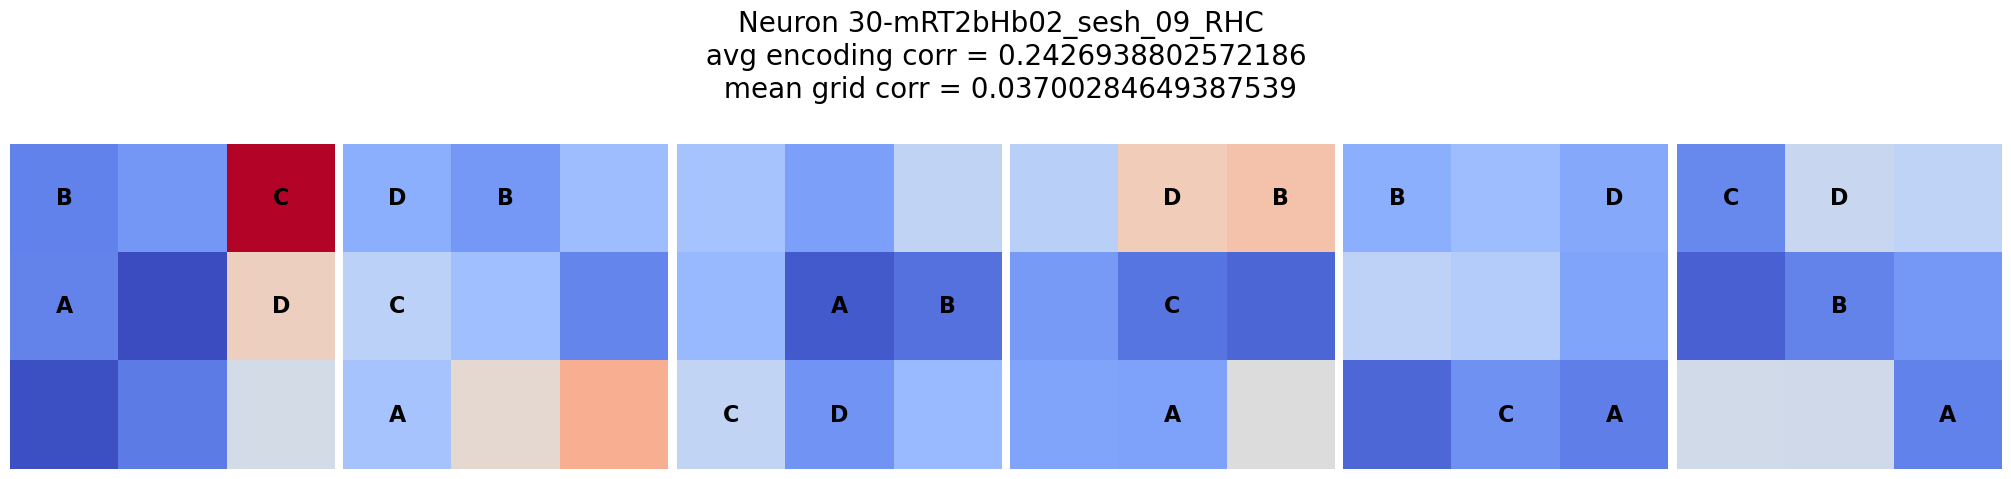

10
loading files for subject 10
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.009
Neuron 1: Mean grid correlation = -0.055


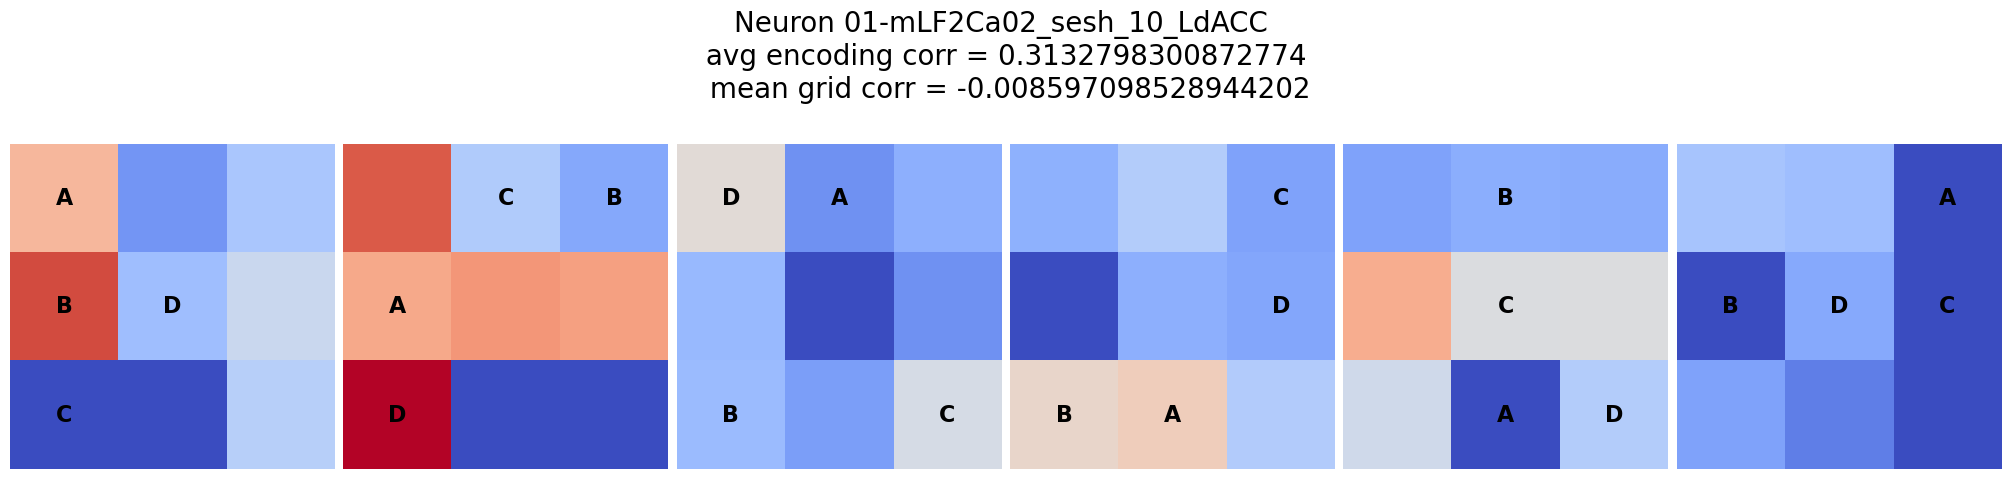

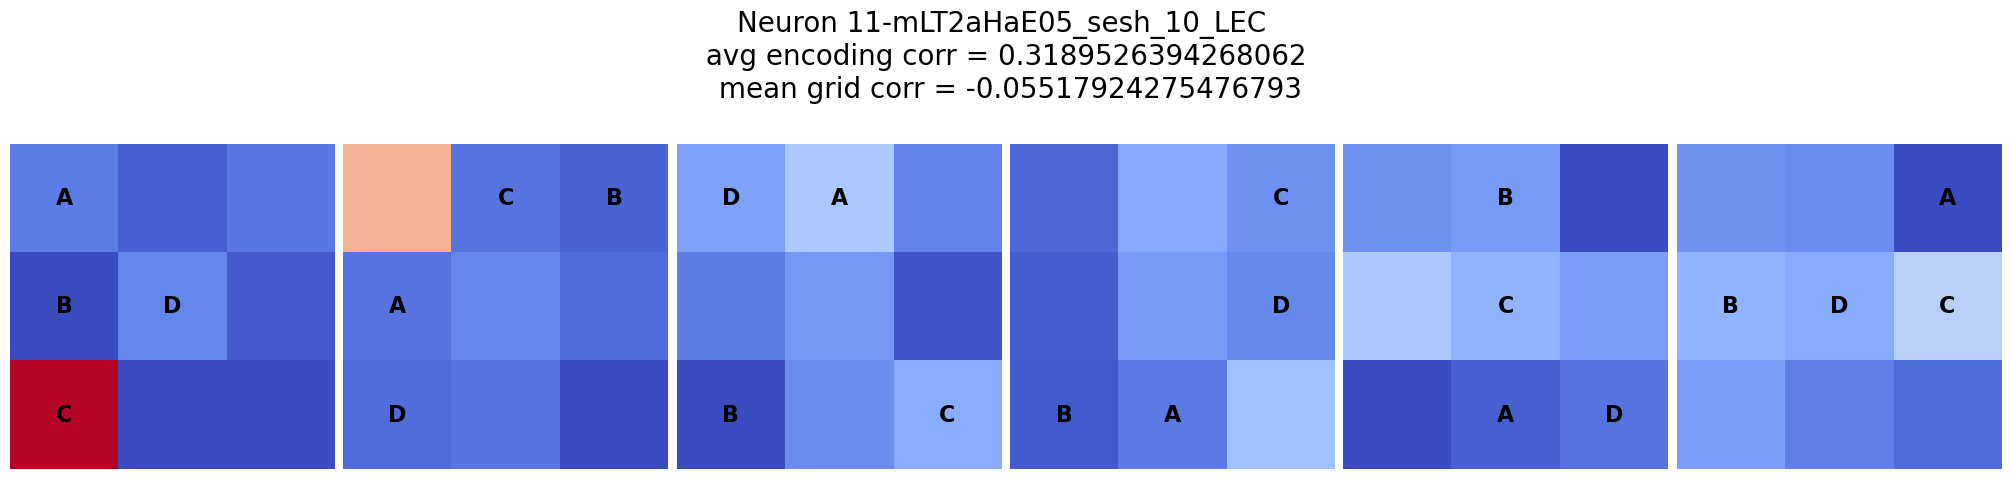

12
loading files for subject 12
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.074
Neuron 1: Mean grid correlation = 0.105


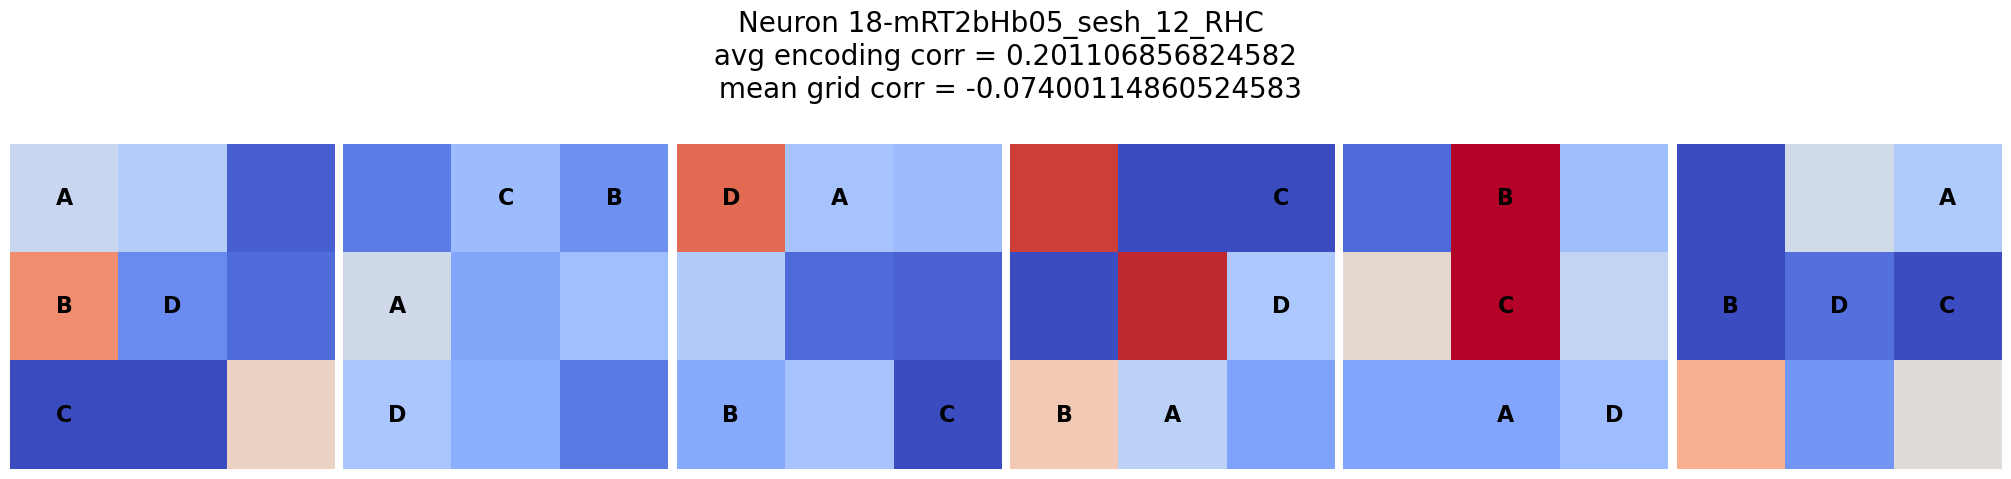

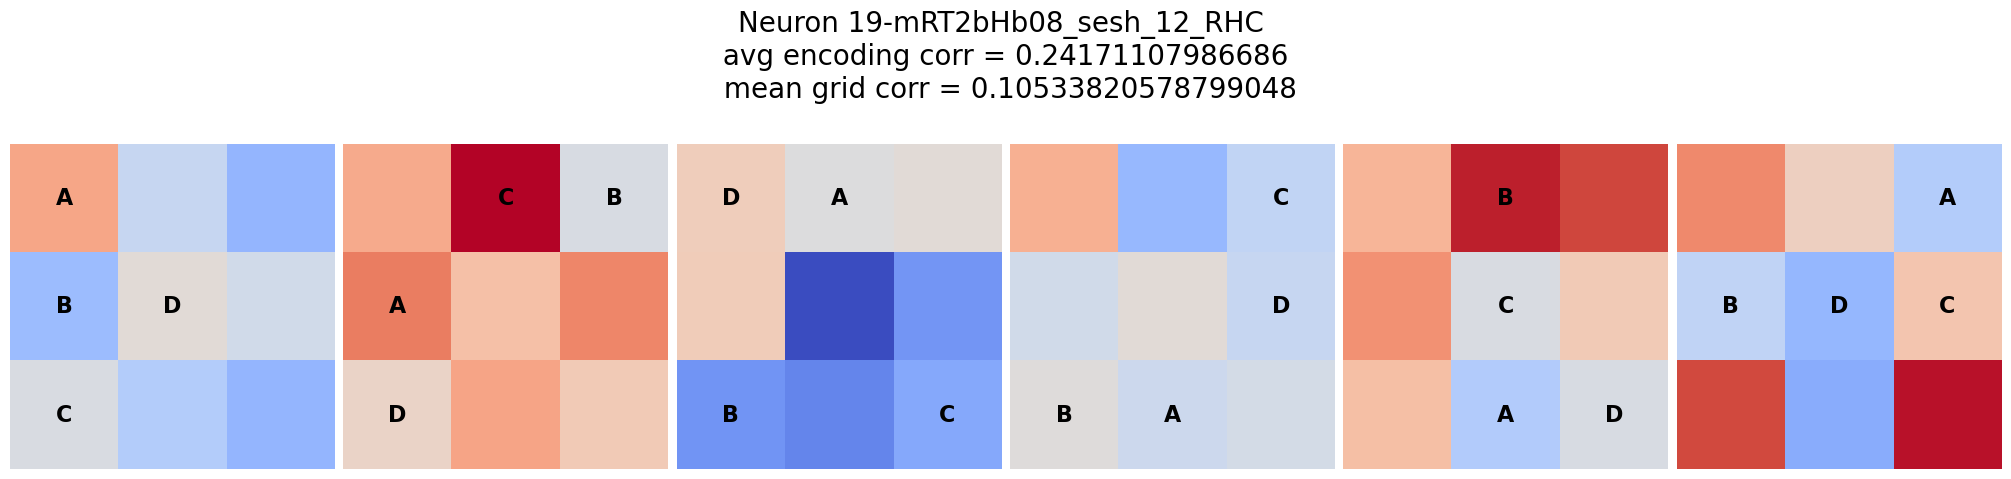

15
loading files for subject 15
unique grids are [[1. 6. 9. 7.]
 [2. 7. 9. 4.]
 [3. 2. 8. 6.]
 [4. 5. 7. 8.]
 [5. 1. 8. 3.]
 [6. 3. 7. 9.]]
Neuron 0: Mean grid correlation = 0.696
Neuron 1: Mean grid correlation = 0.588
Neuron 2: Mean grid correlation = 0.454
Neuron 3: Mean grid correlation = 0.350


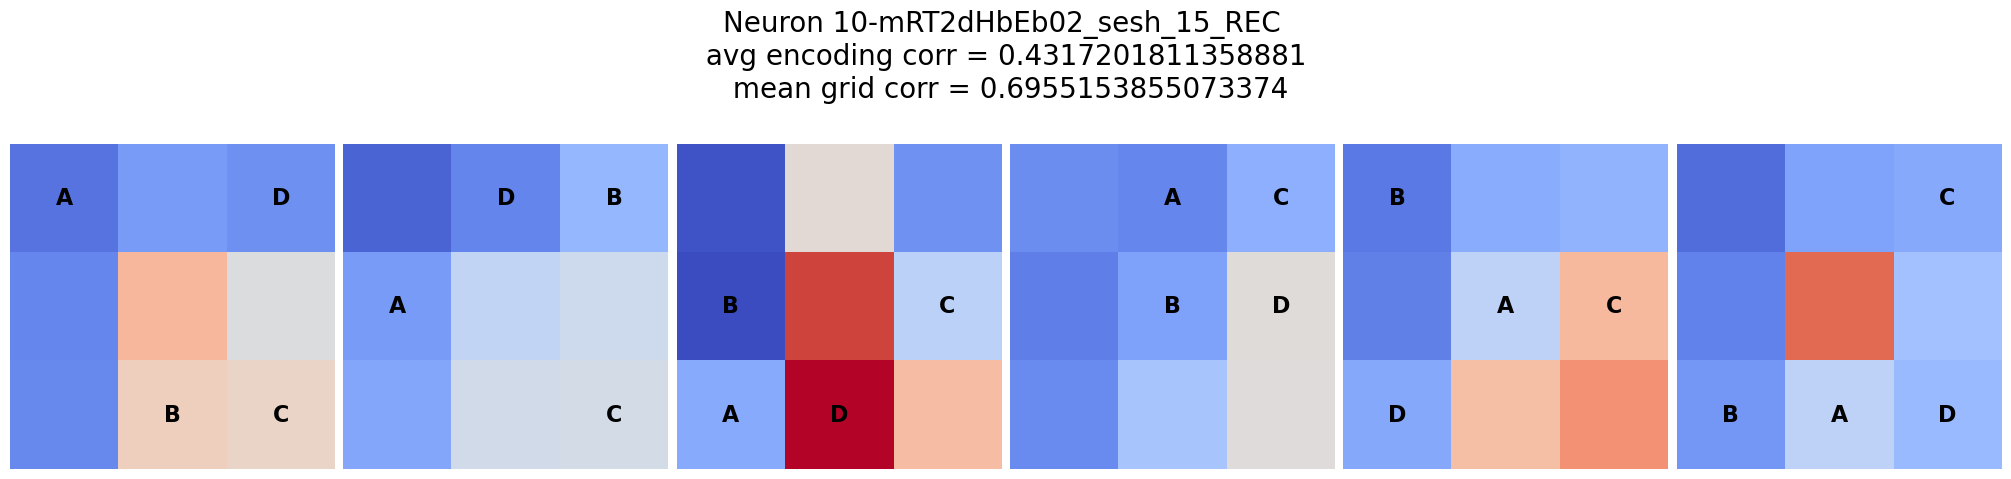

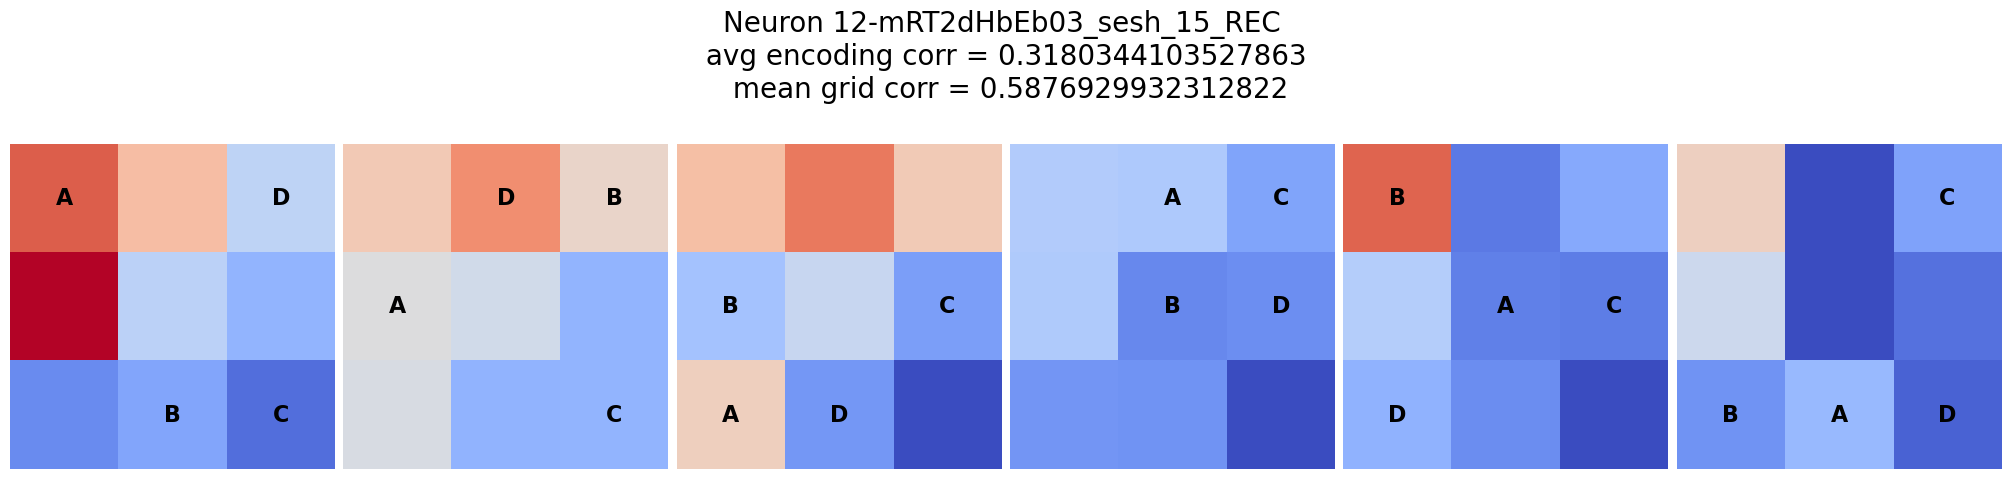

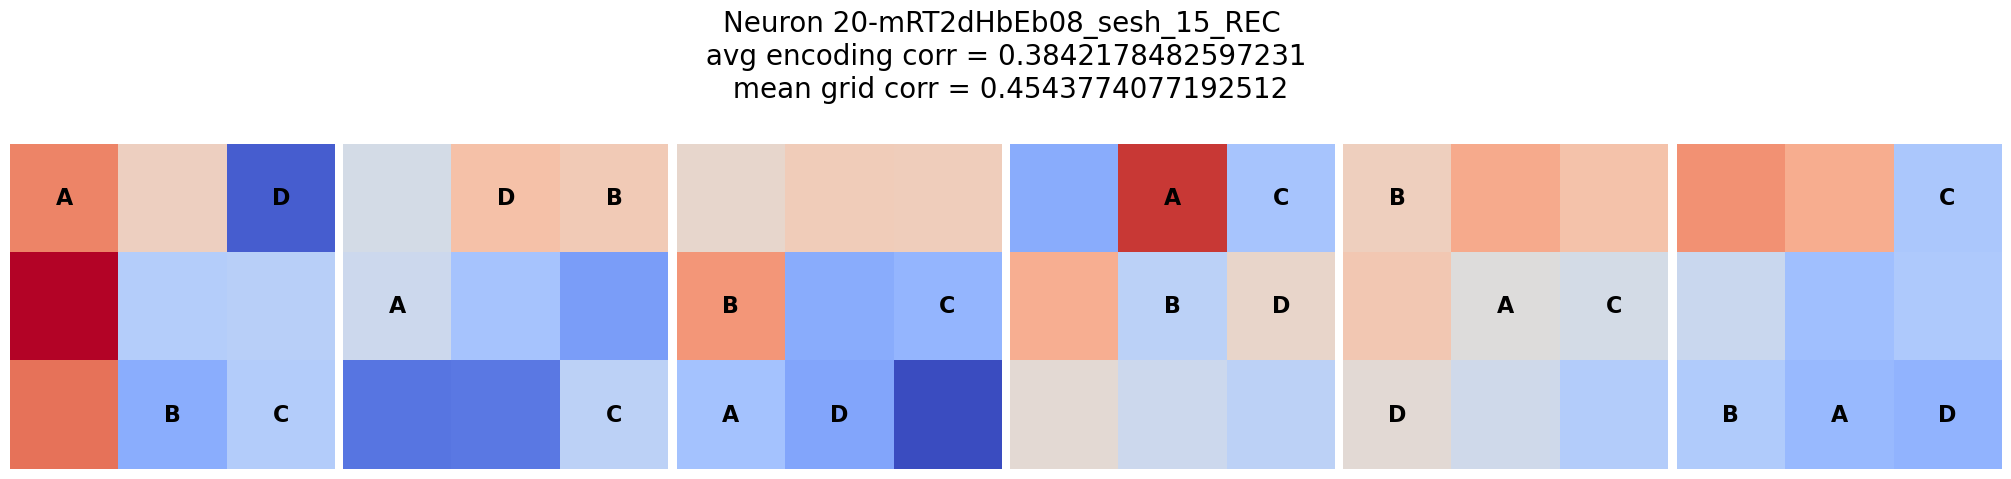

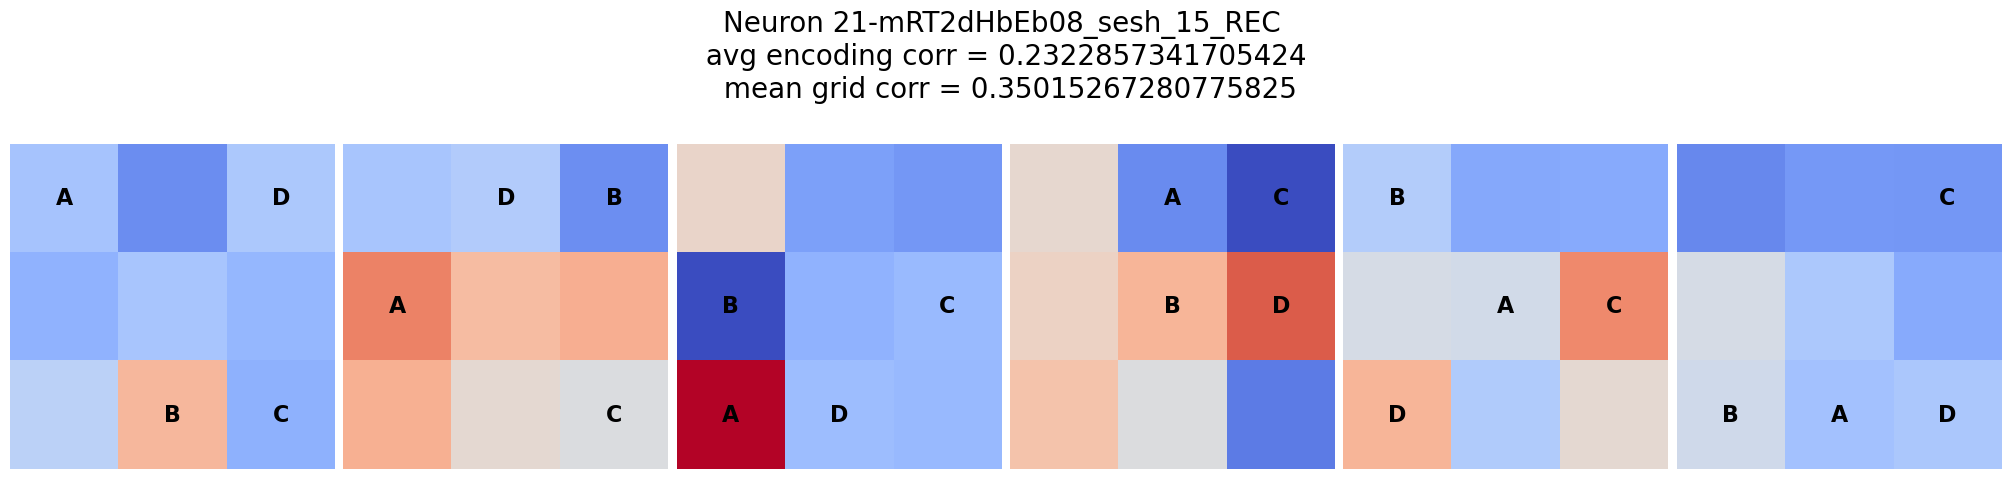

16
loading files for subject 16
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = 0.153
Neuron 1: Mean grid correlation = 0.026


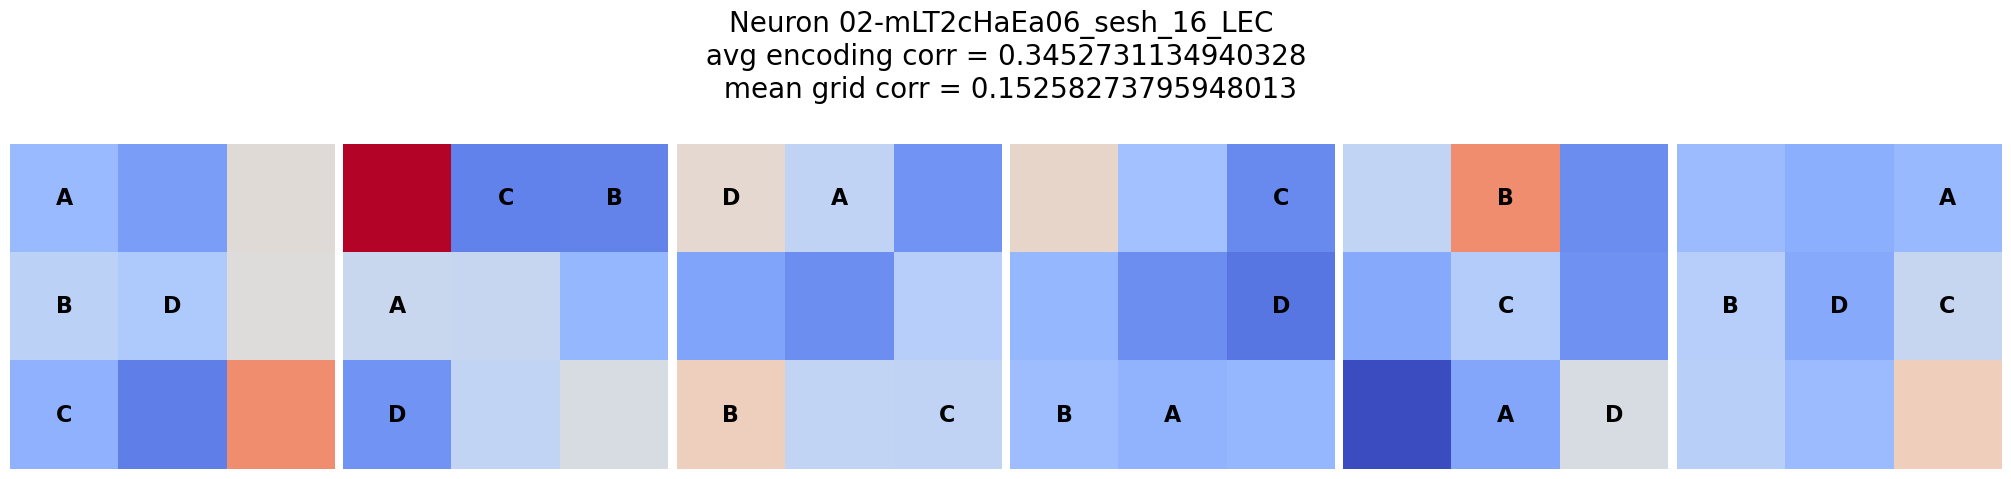

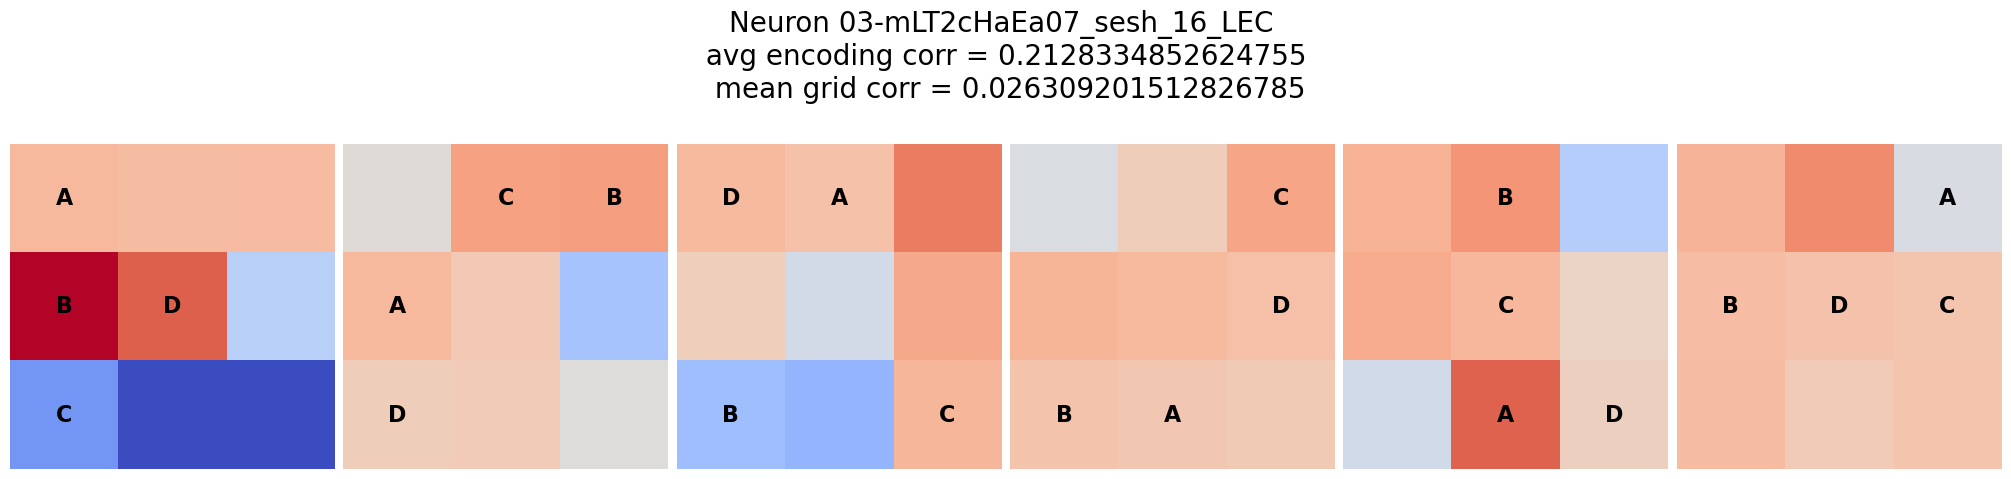

17
loading files for subject 17
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = 0.172


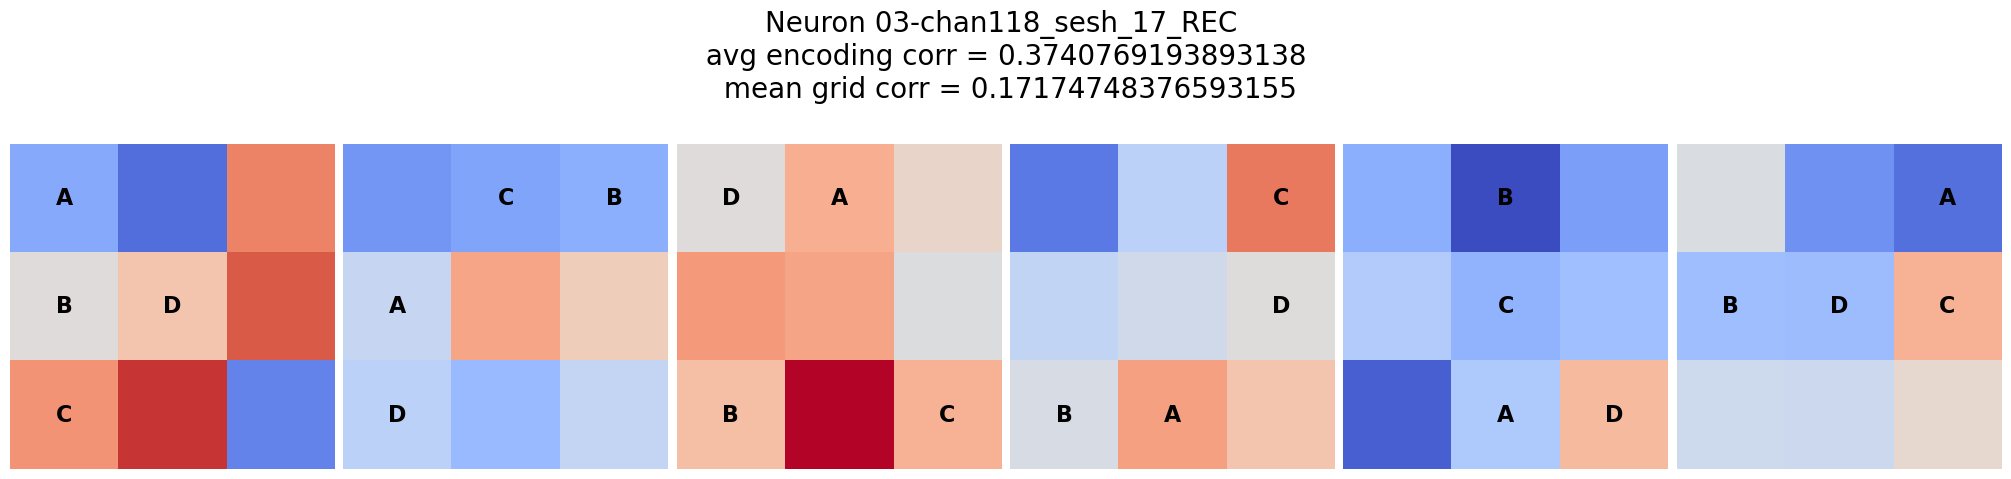

20
loading files for subject 20
unique grids are [[2. 5. 8. 1.]
 [2. 9. 7. 6.]
 [3. 8. 9. 6.]
 [7. 4. 8. 6.]
 [7. 6. 3. 4.]
 [9. 5. 1. 4.]]
Neuron 0: Mean grid correlation = 0.122
Neuron 1: Mean grid correlation = 0.133


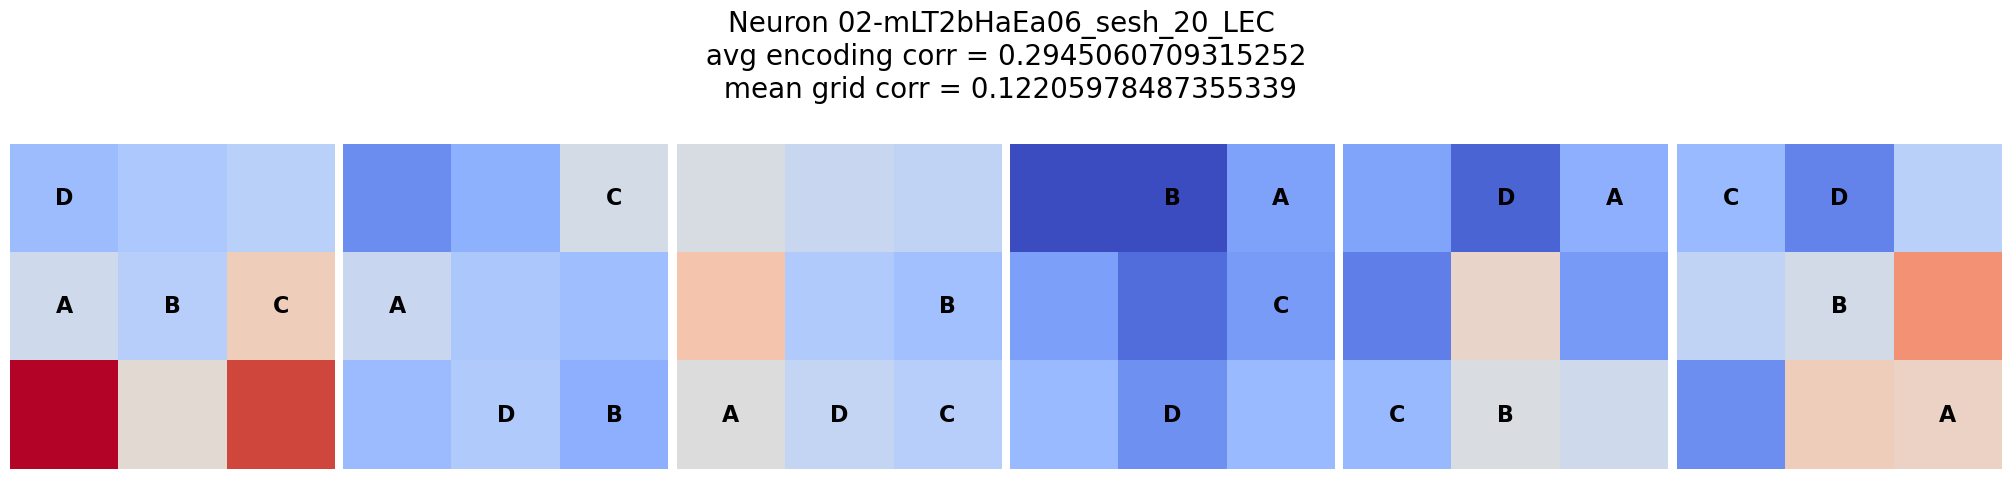

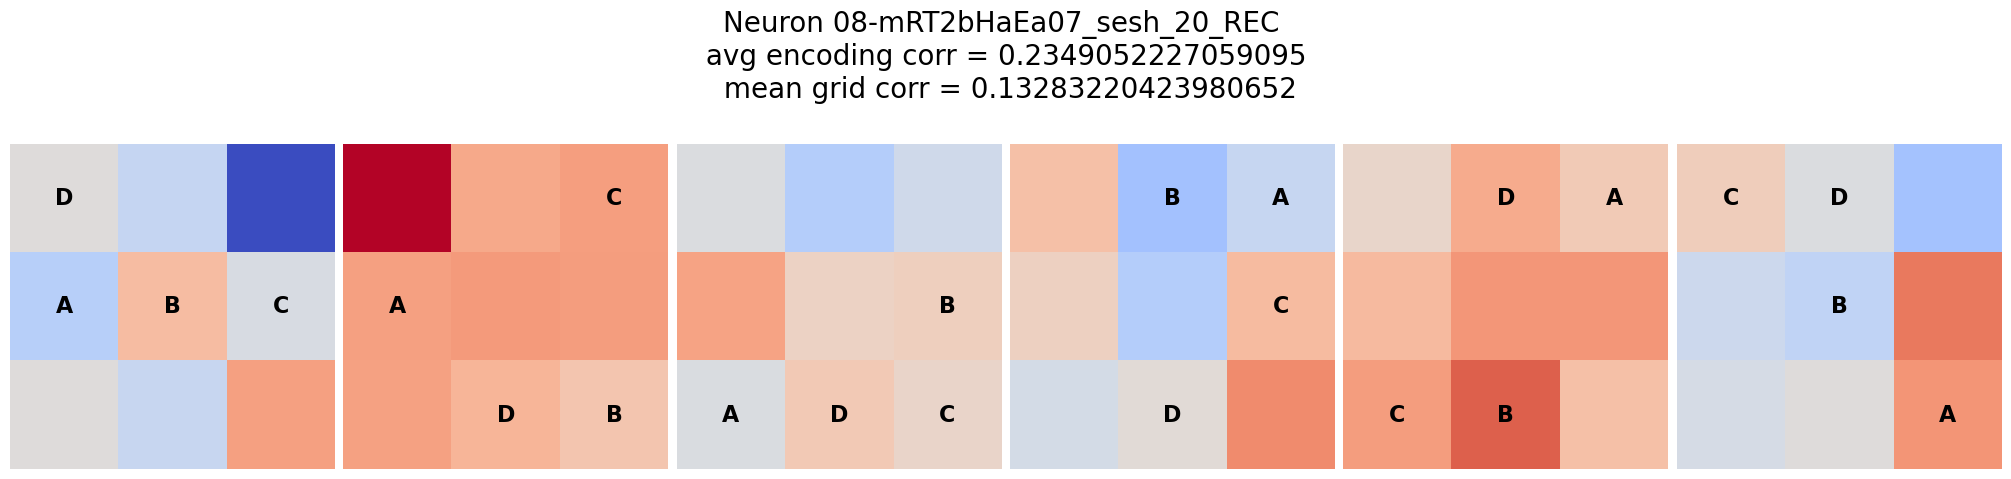

25
loading files for subject 25
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.025
Neuron 1: Mean grid correlation = 0.120
Neuron 2: Mean grid correlation = 0.223


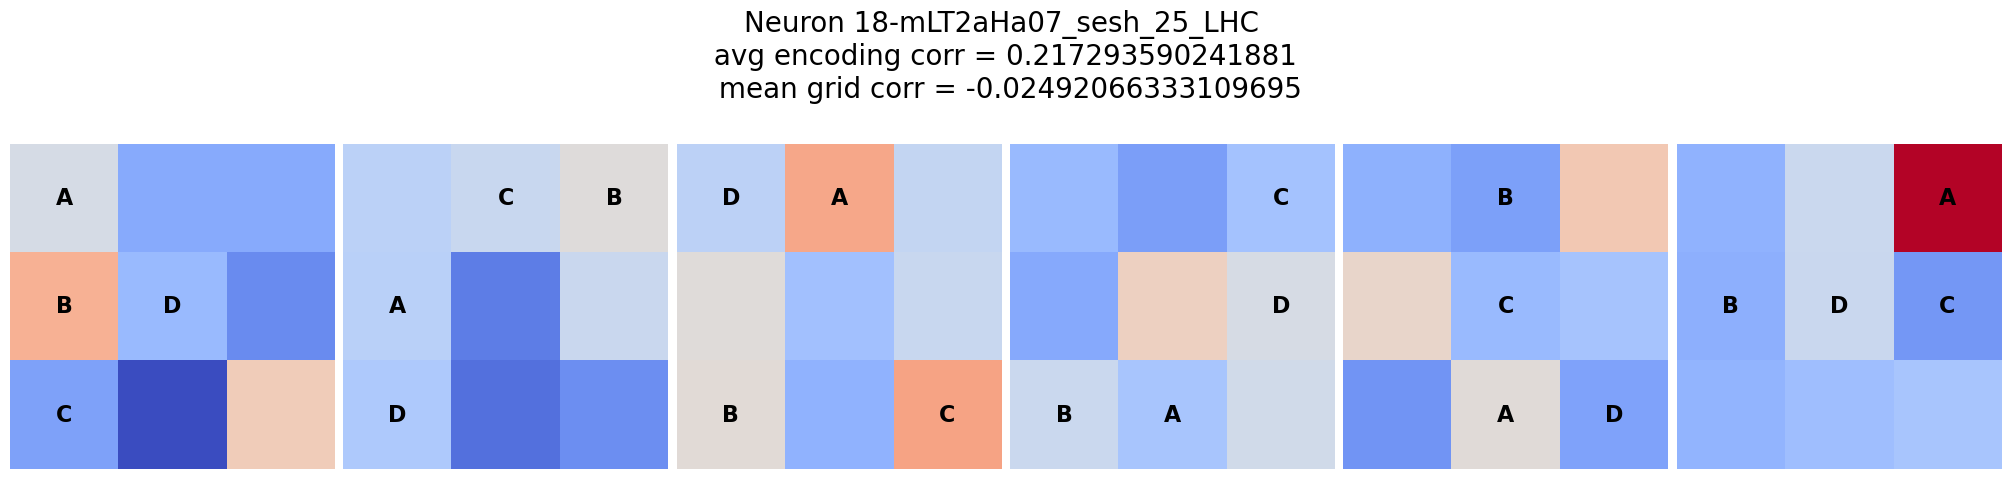

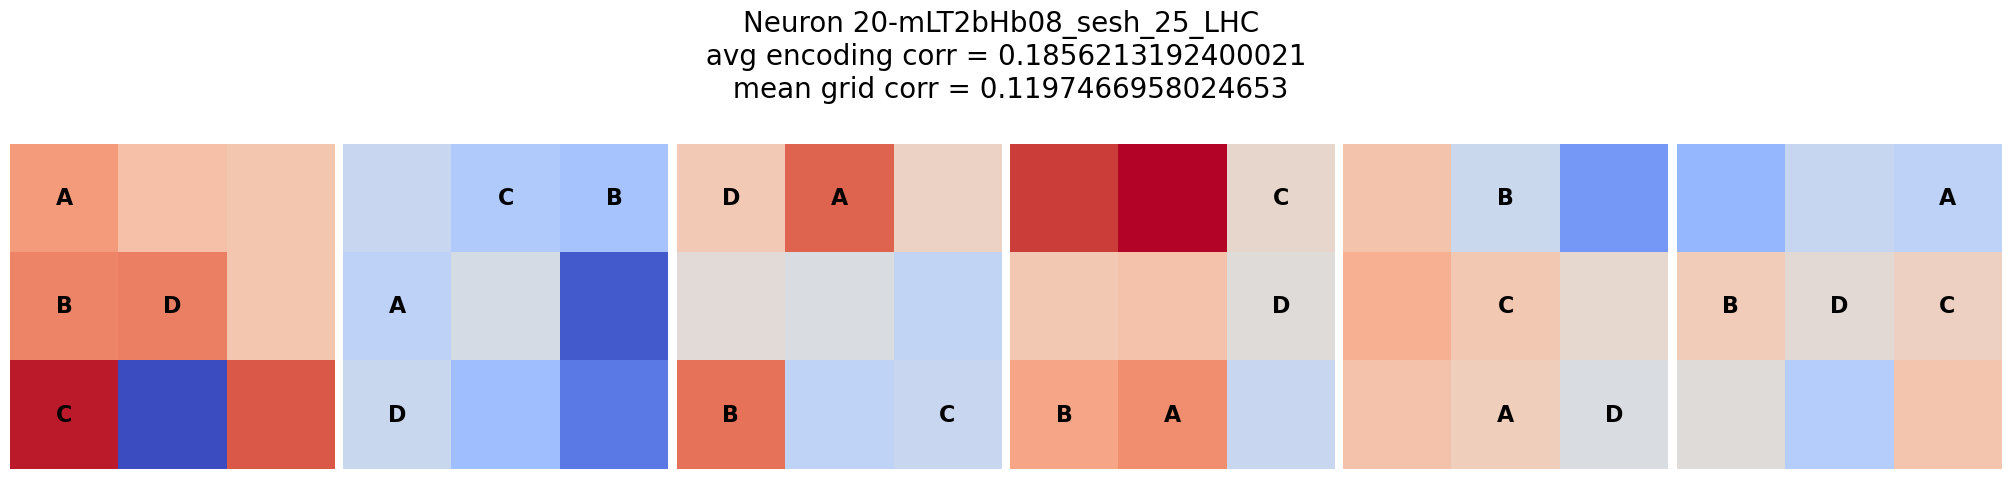

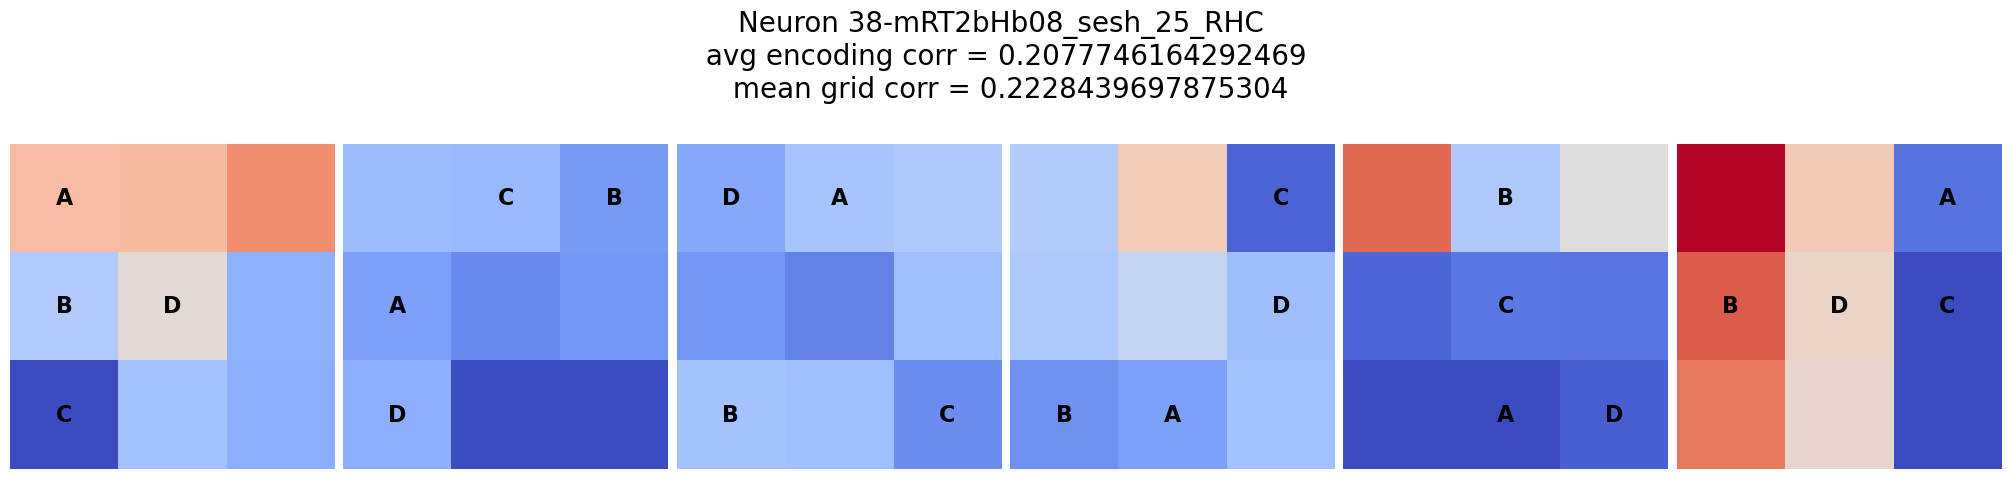

26
loading files for subject 26
unique grids are [[2. 6. 4. 9.]
 [3. 4. 8. 1.]
 [4. 2. 3. 7.]
 [6. 2. 5. 7.]
 [6. 2. 7. 8.]
 [9. 1. 8. 5.]
 [9. 3. 4. 1.]
 [9. 5. 3. 7.]]
Neuron 0: Mean grid correlation = 0.020


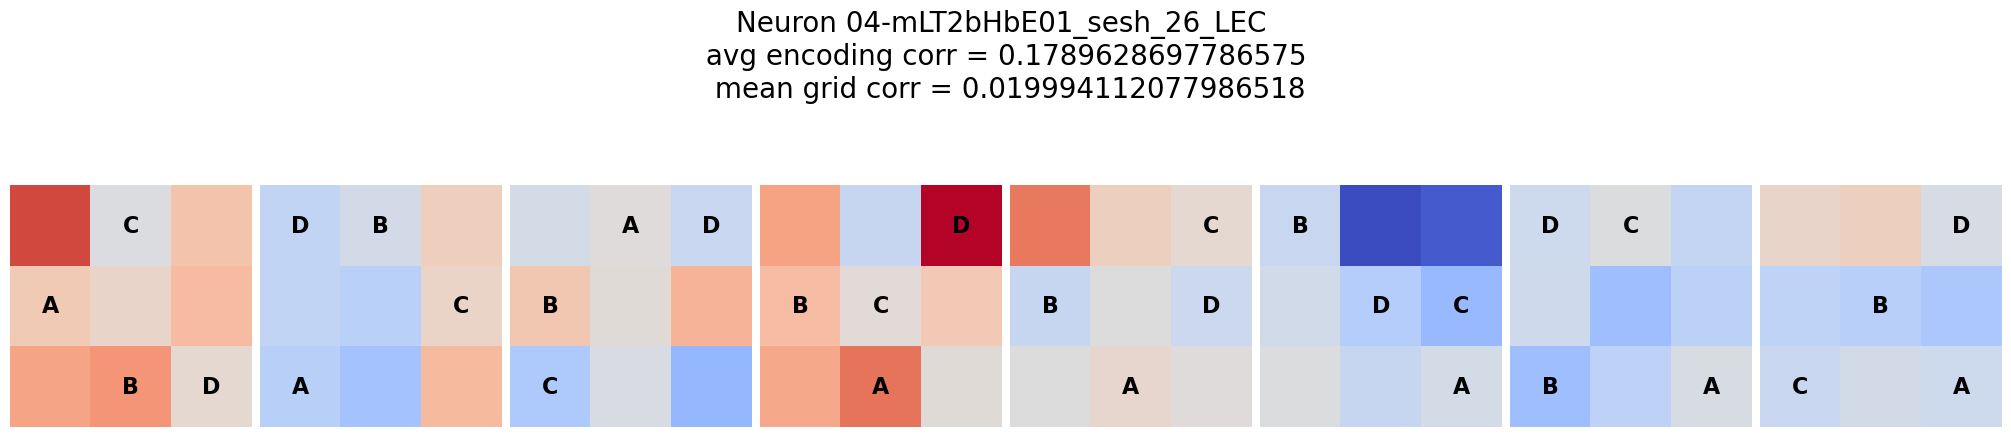

29
loading files for subject 29
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.110
Neuron 1: Mean grid correlation = 0.049


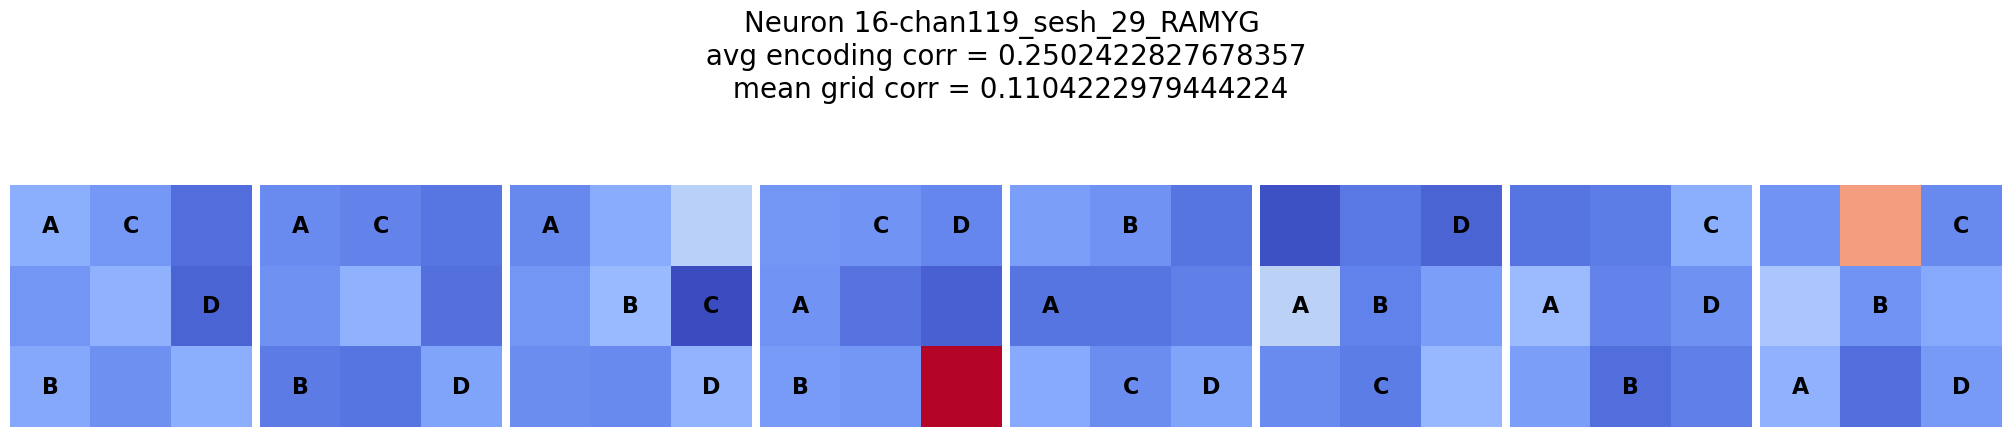

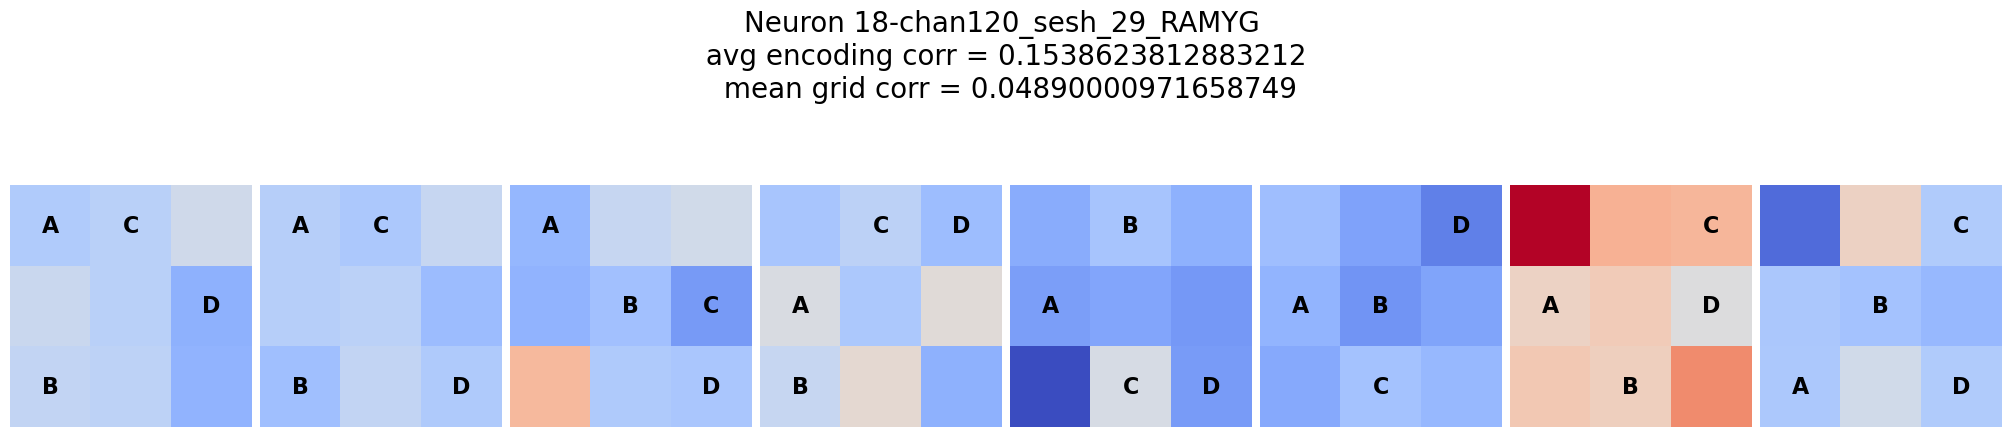

30
loading files for subject 30
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.017


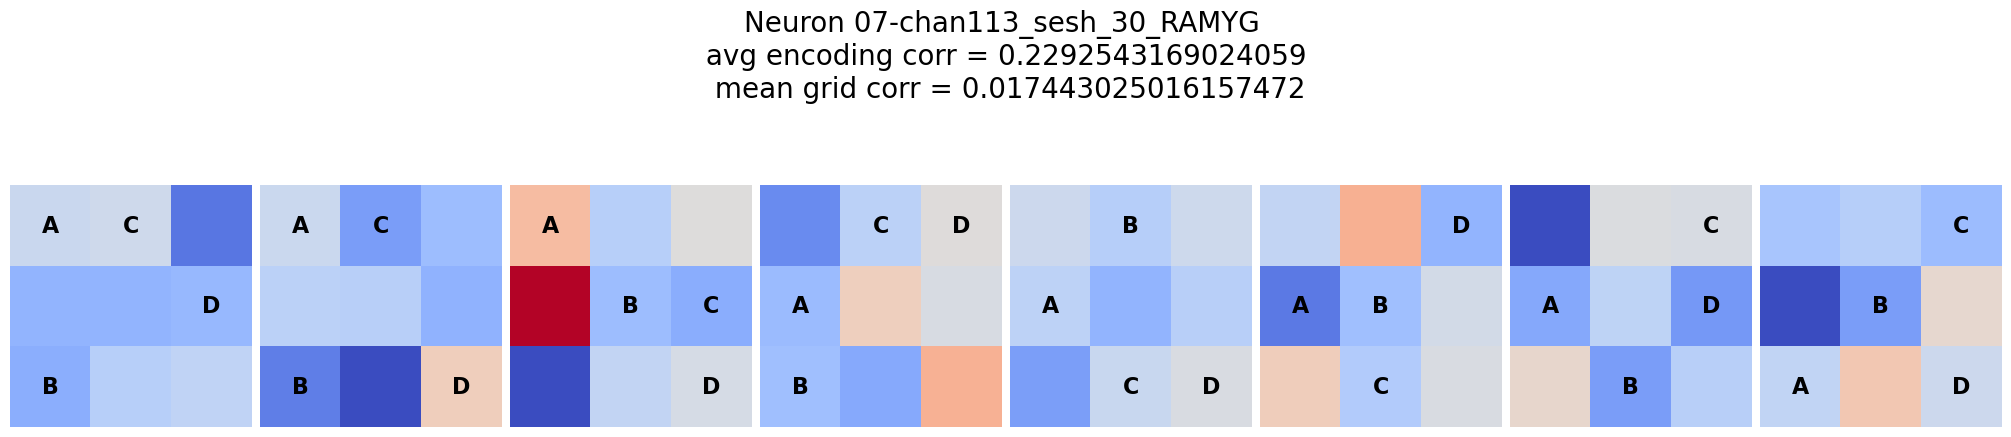

31
loading files for subject 31
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.320
Neuron 1: Mean grid correlation = -0.073
Neuron 2: Mean grid correlation = 0.027


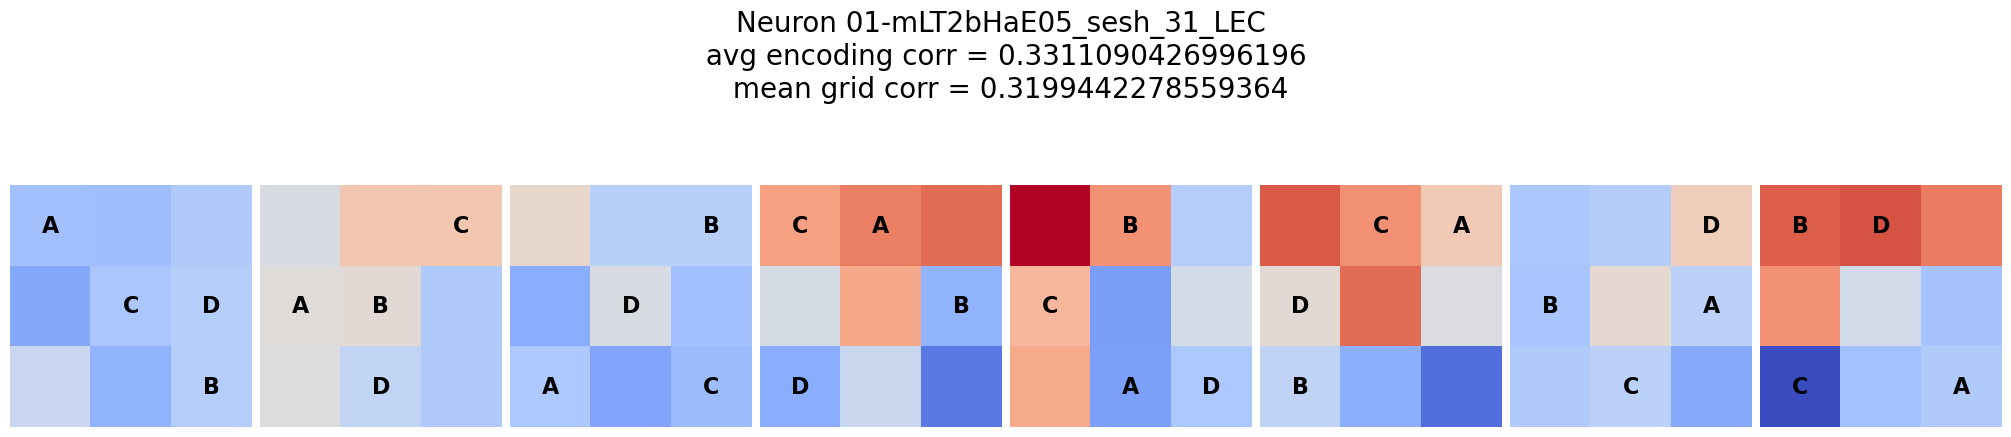

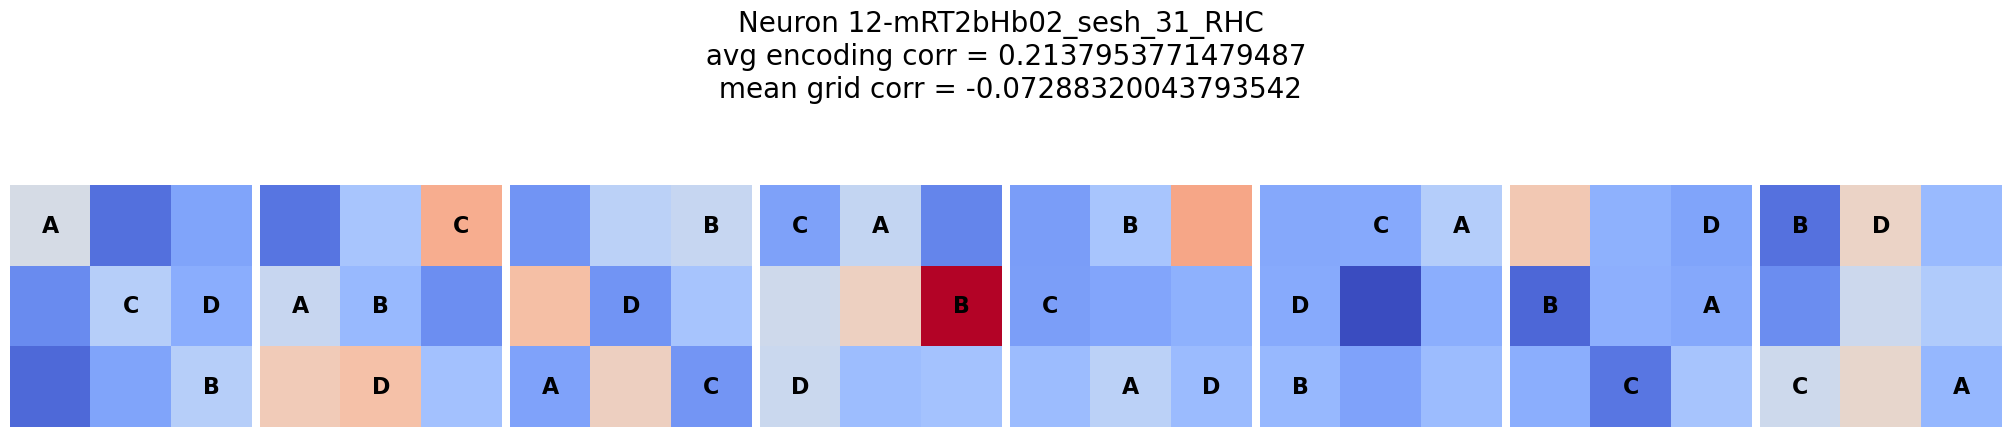

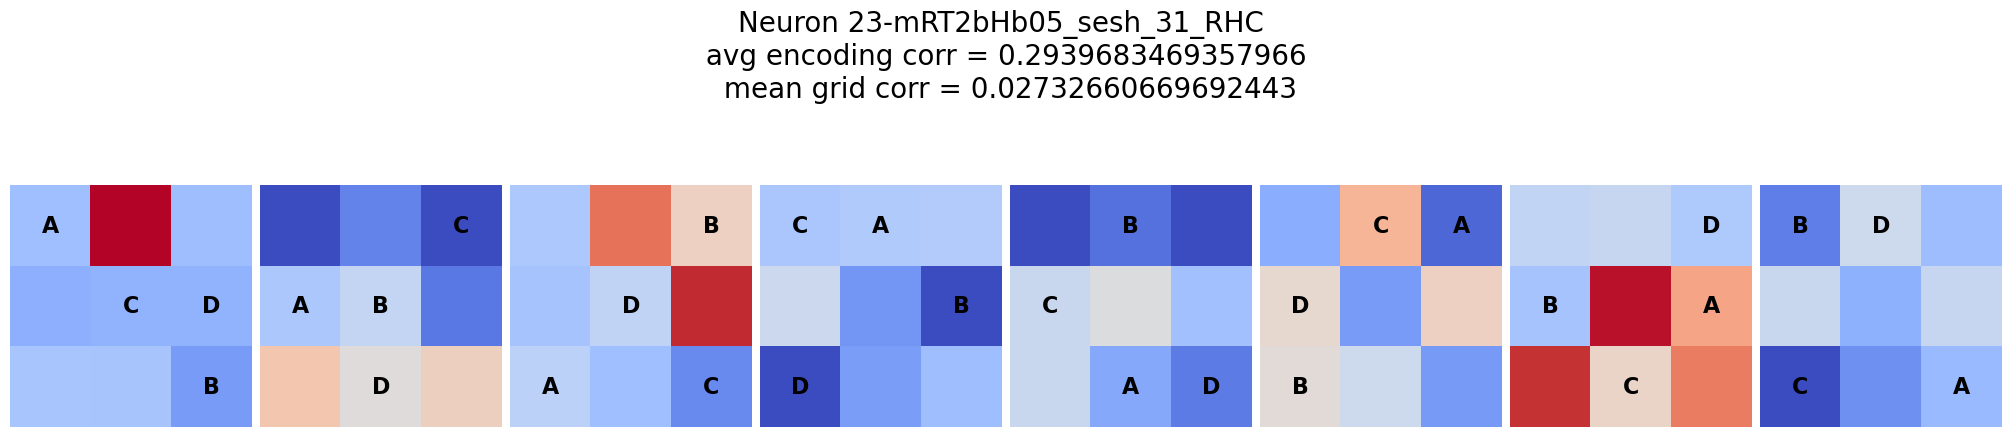

34
loading files for subject 34
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.395


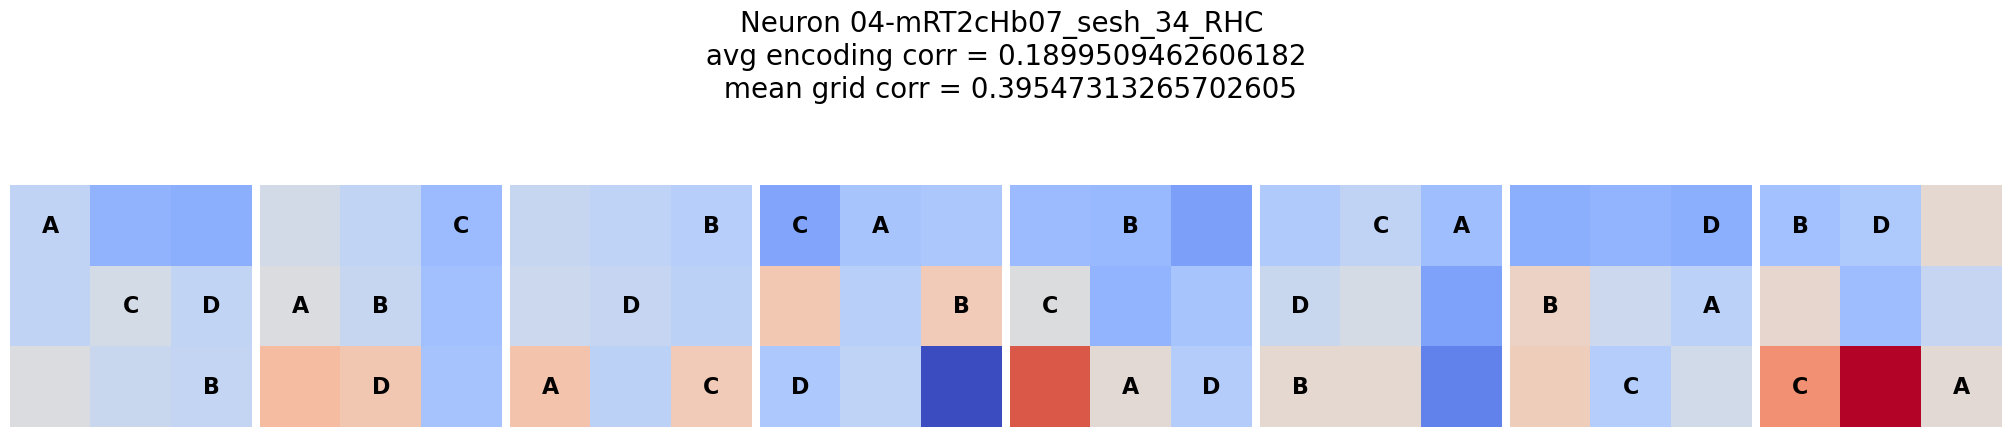

37
loading files for subject 37
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.050


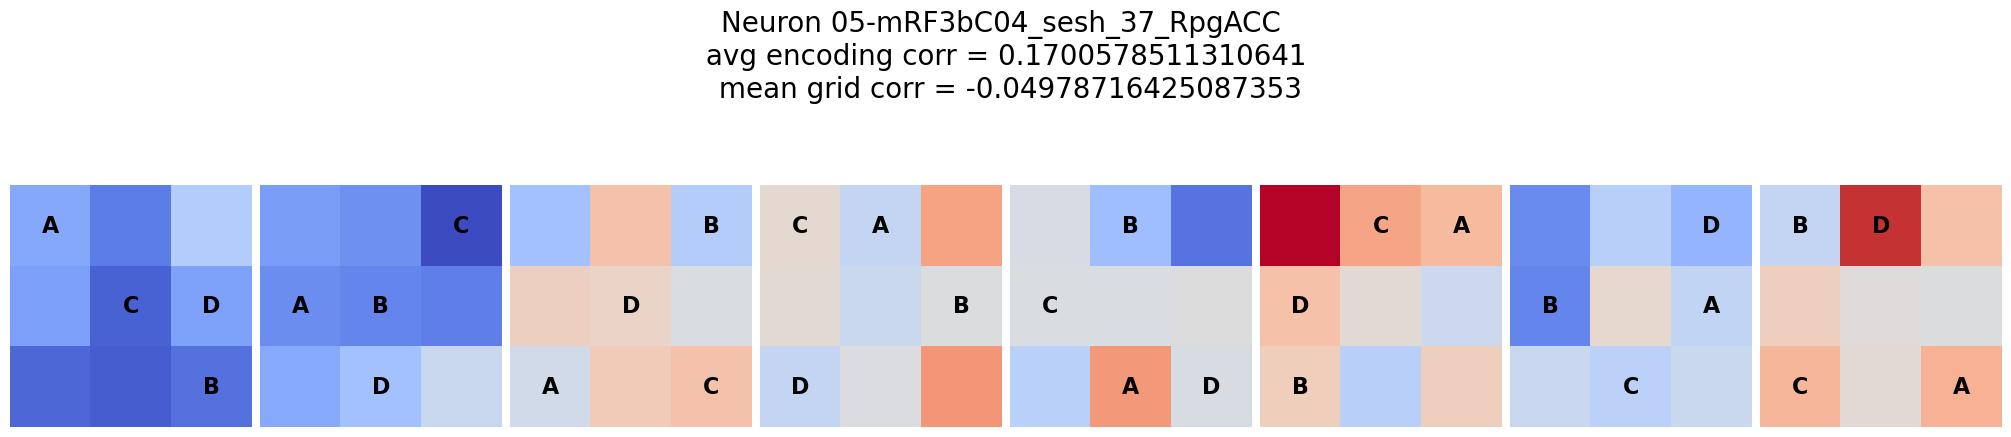

39
loading files for subject 39
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.018


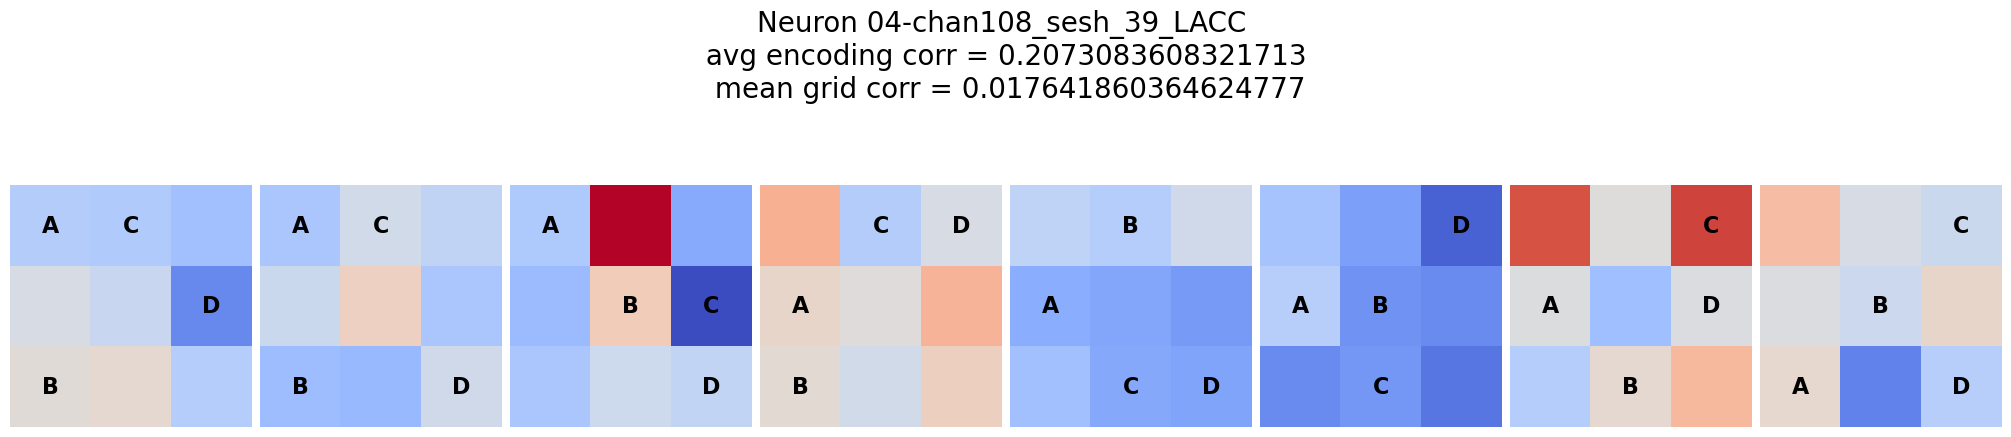

40
loading files for subject 40
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.023
Neuron 1: Mean grid correlation = 0.089


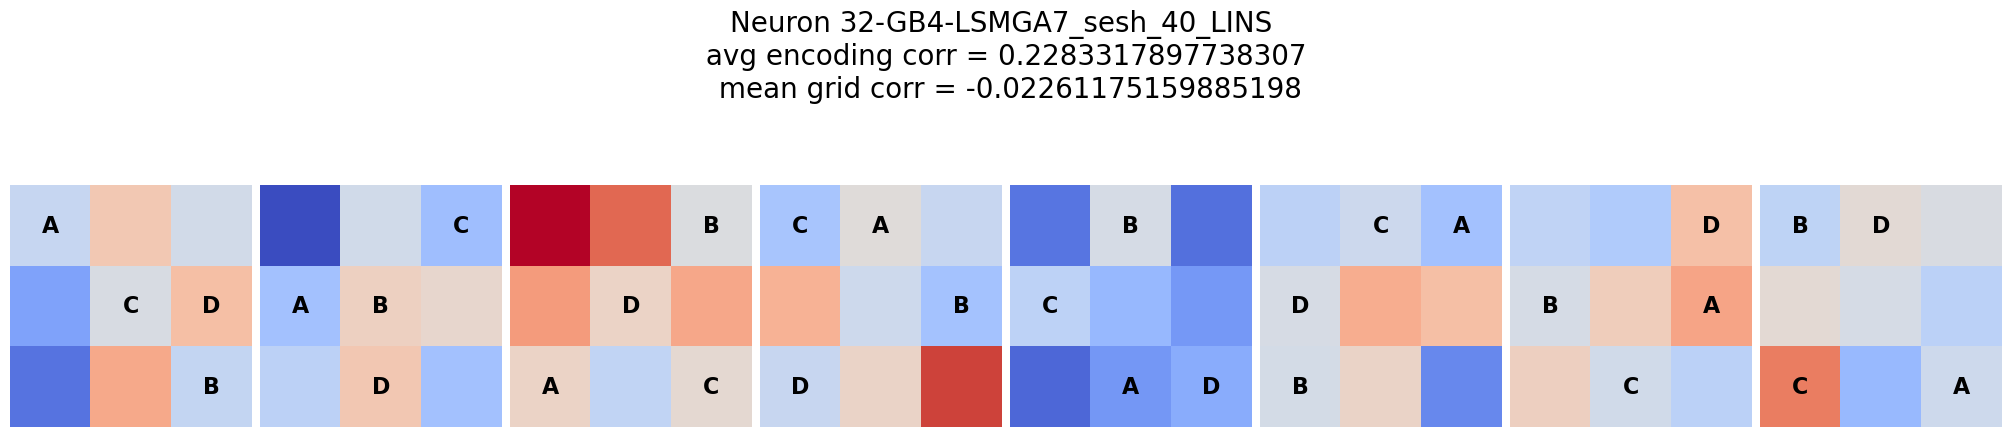

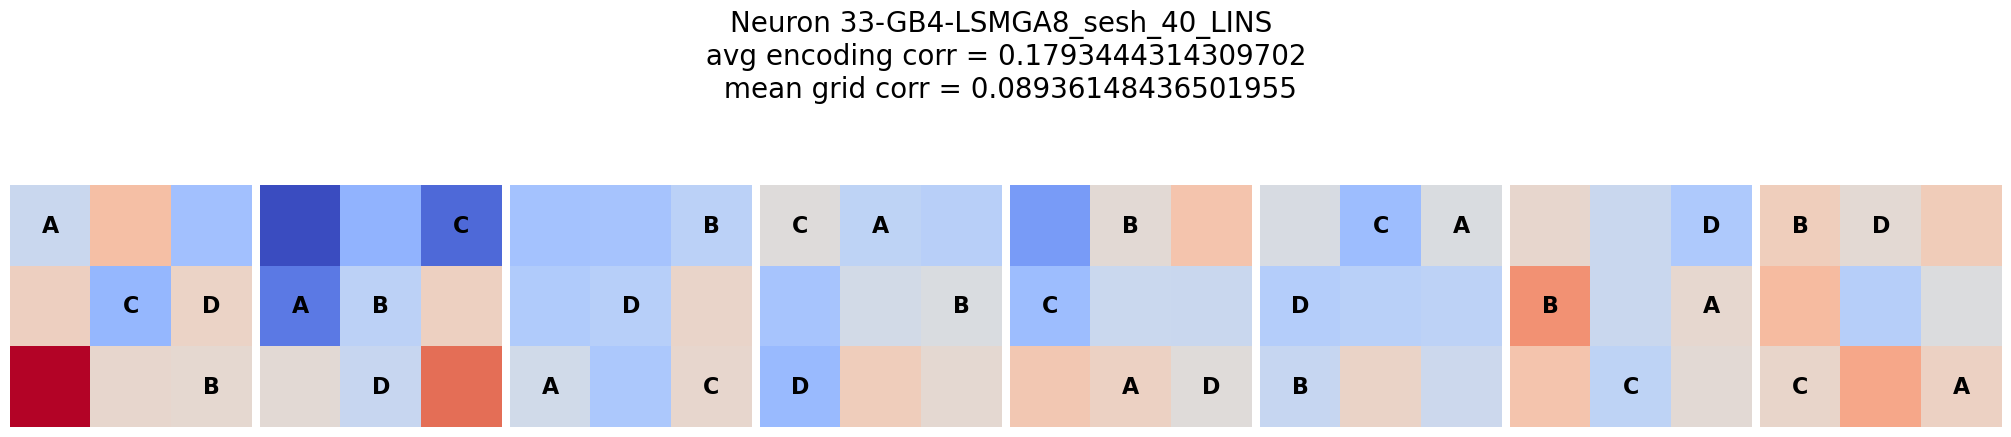

41
loading files for subject 41
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.509


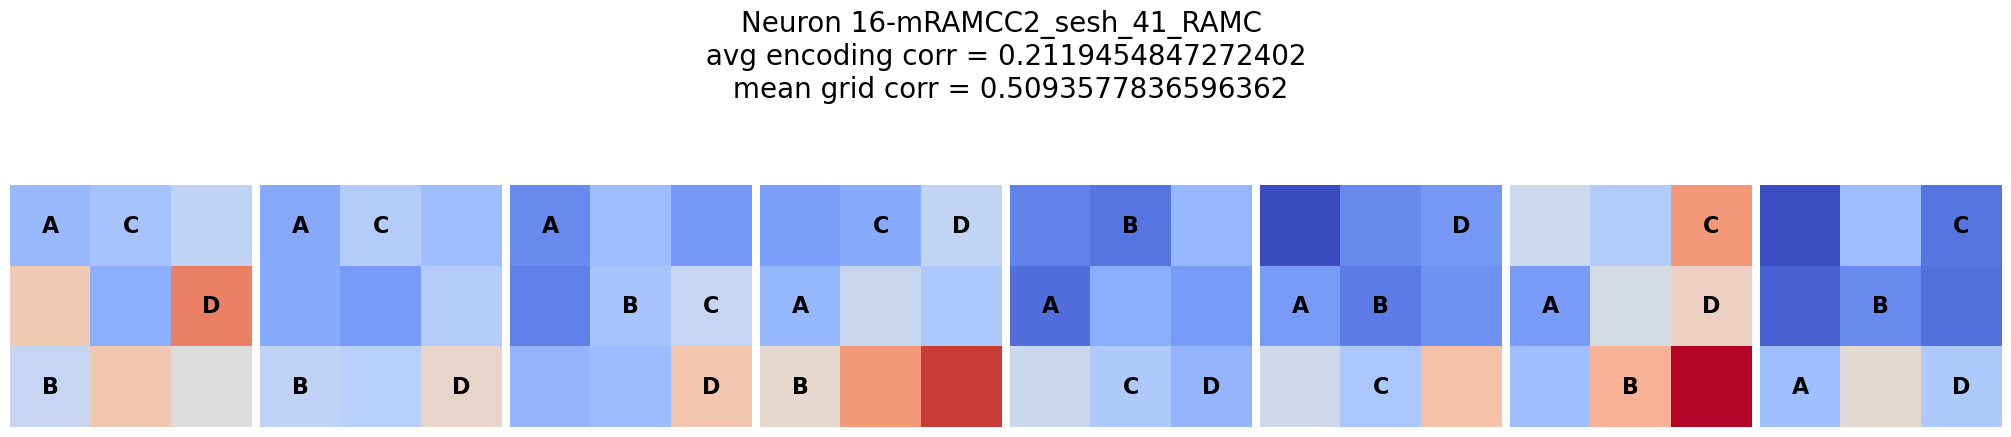

43
loading files for subject 43
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.081


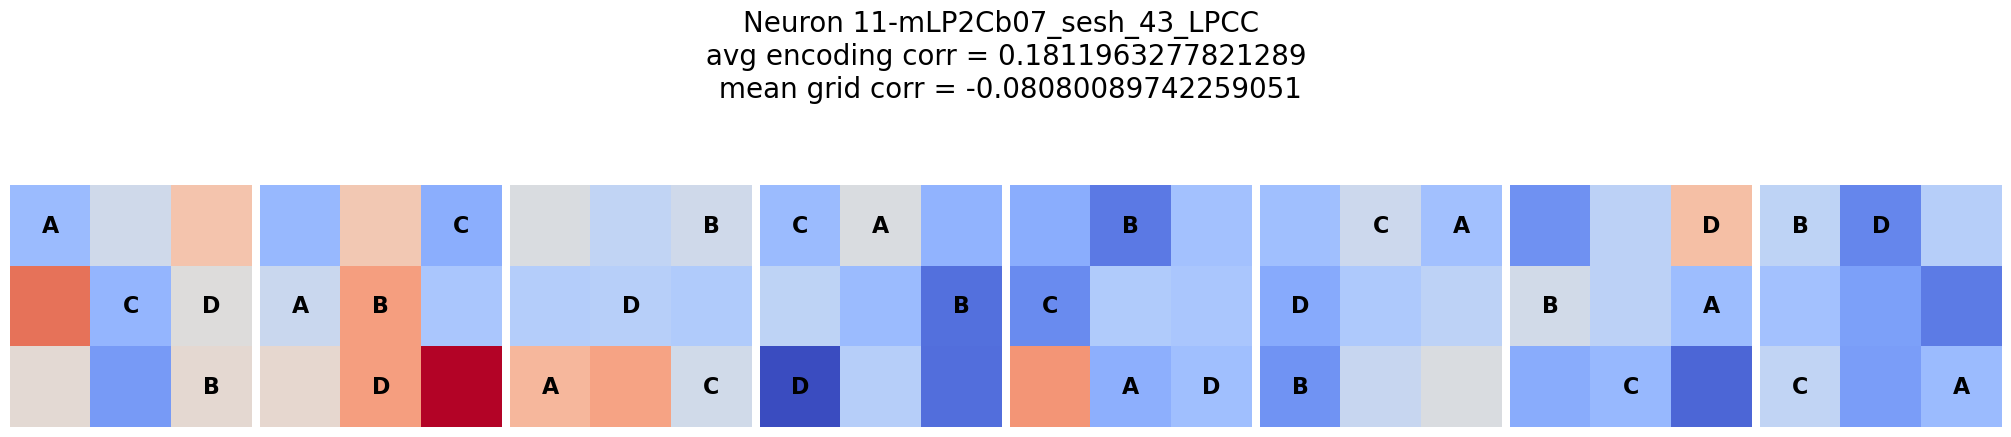

46
loading files for subject 46
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.044


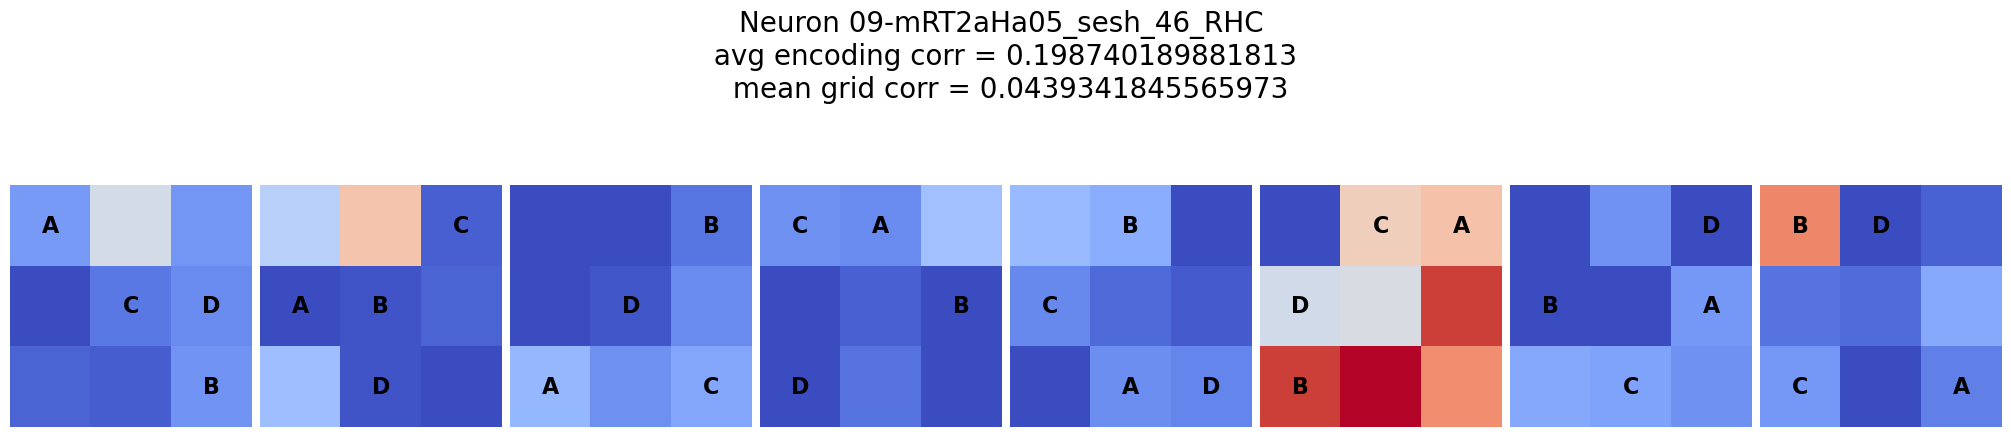

48
loading files for subject 48
unique grids are [[1. 7. 6. 9.]
 [2. 3. 7. 9.]
 [2. 5. 6. 4.]
 [5. 8. 4. 1.]
 [5. 9. 2. 7.]
 [9. 3. 8. 6.]]
Neuron 0: Mean grid correlation = -0.061


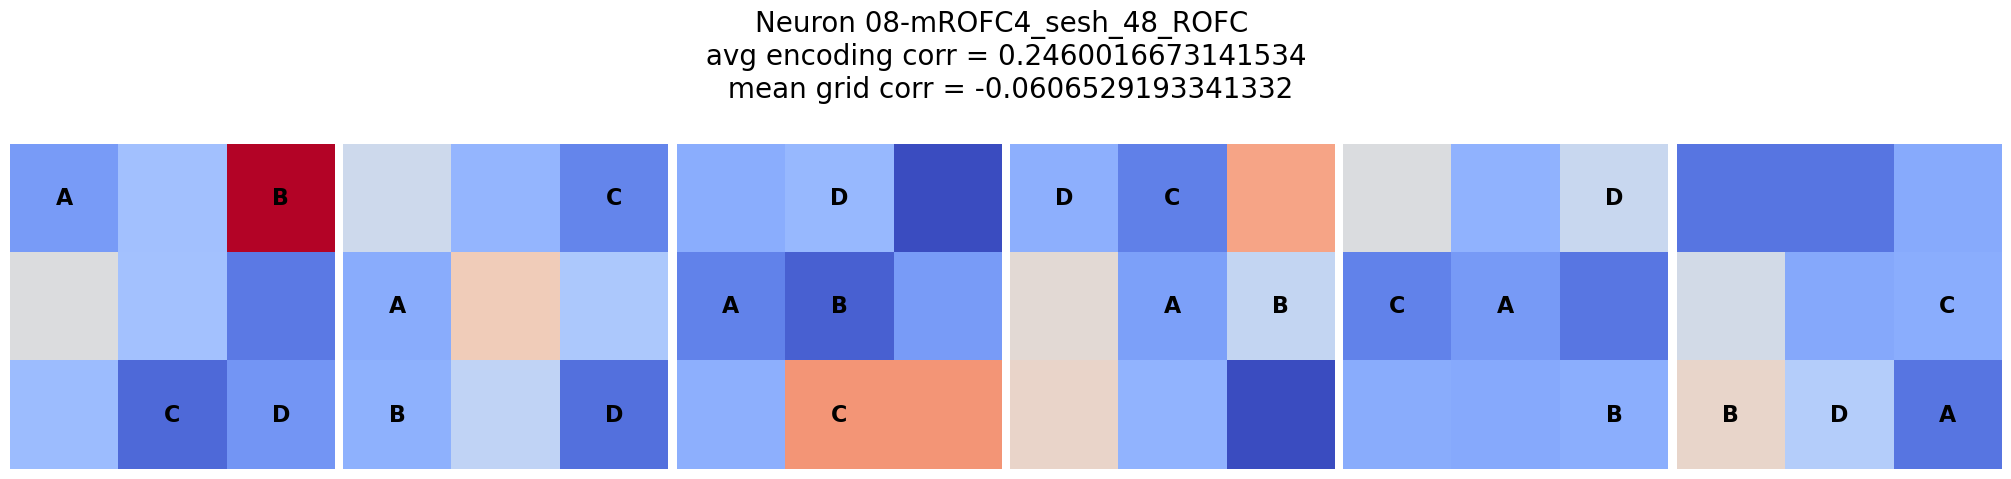

51
loading files for subject 51
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.150


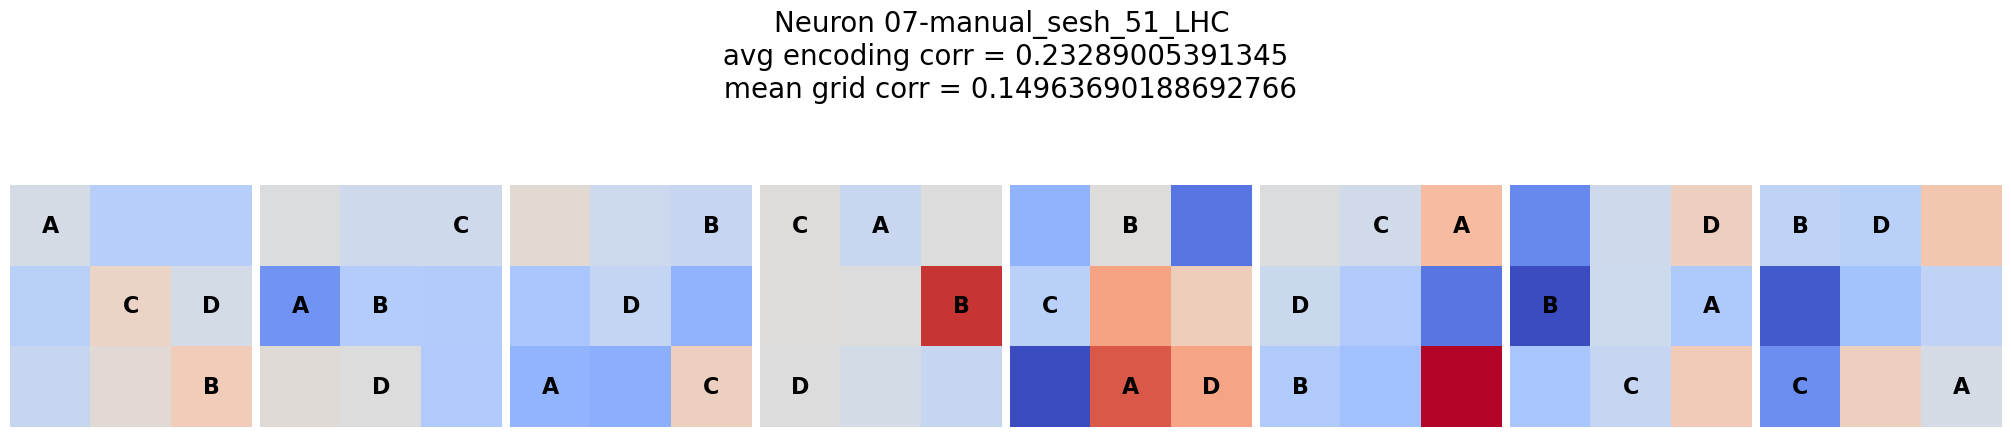

52
loading files for subject 52
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = -0.001


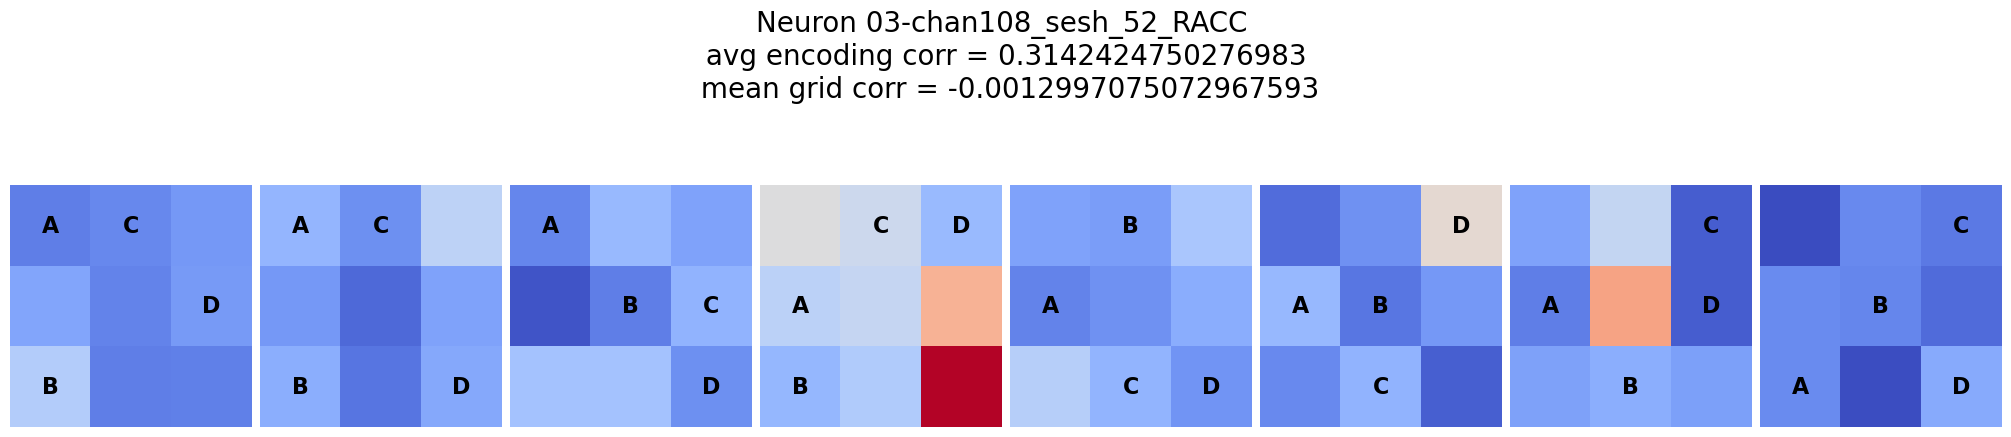

54
loading files for subject 54
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = -0.030


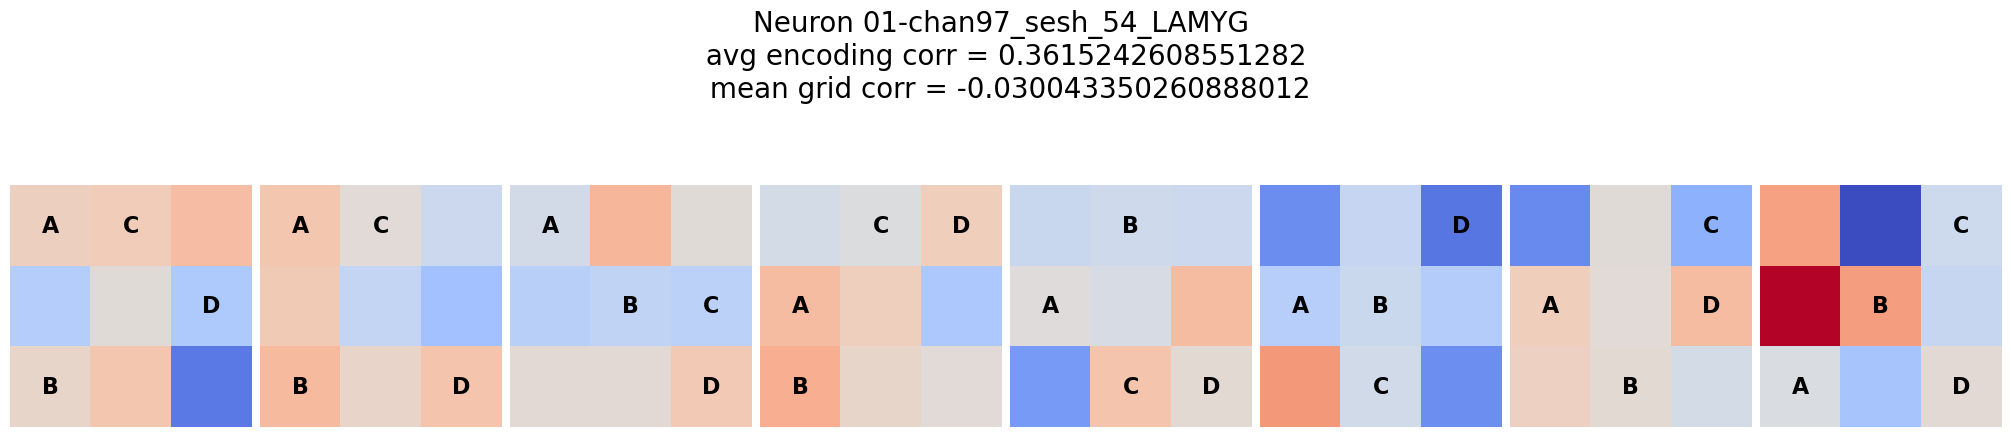

56
loading files for subject 56
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.089


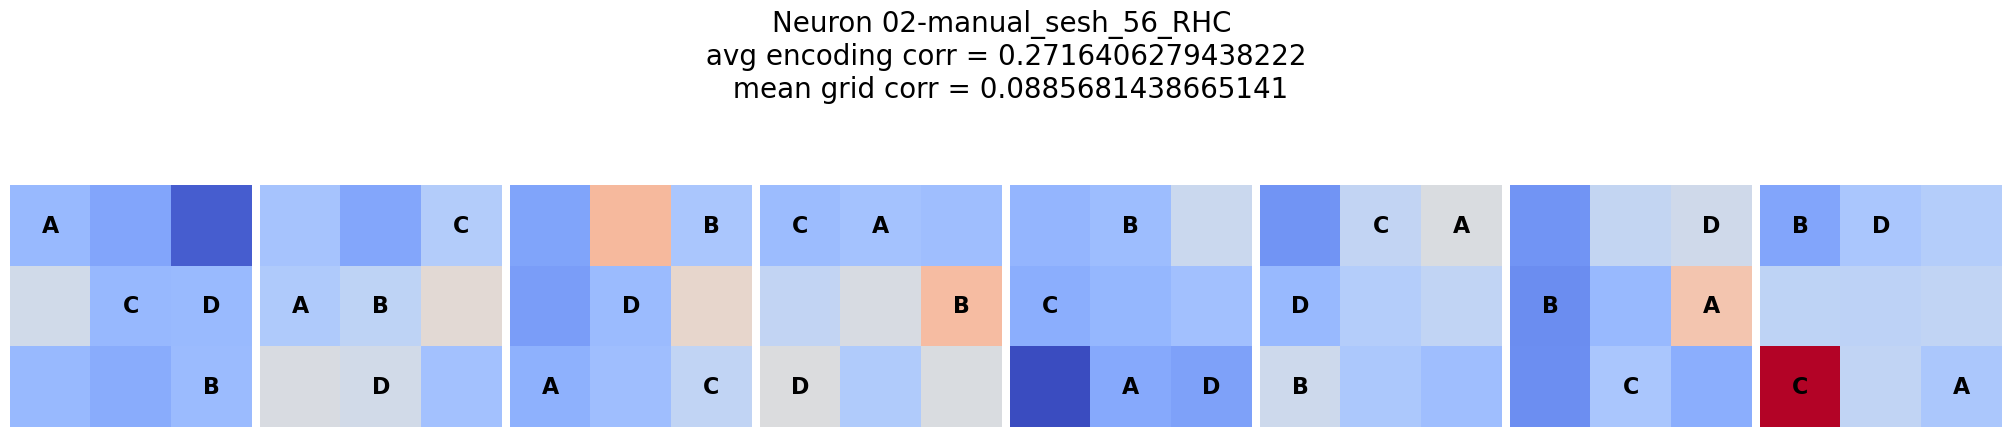

57
loading files for subject 57
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.014


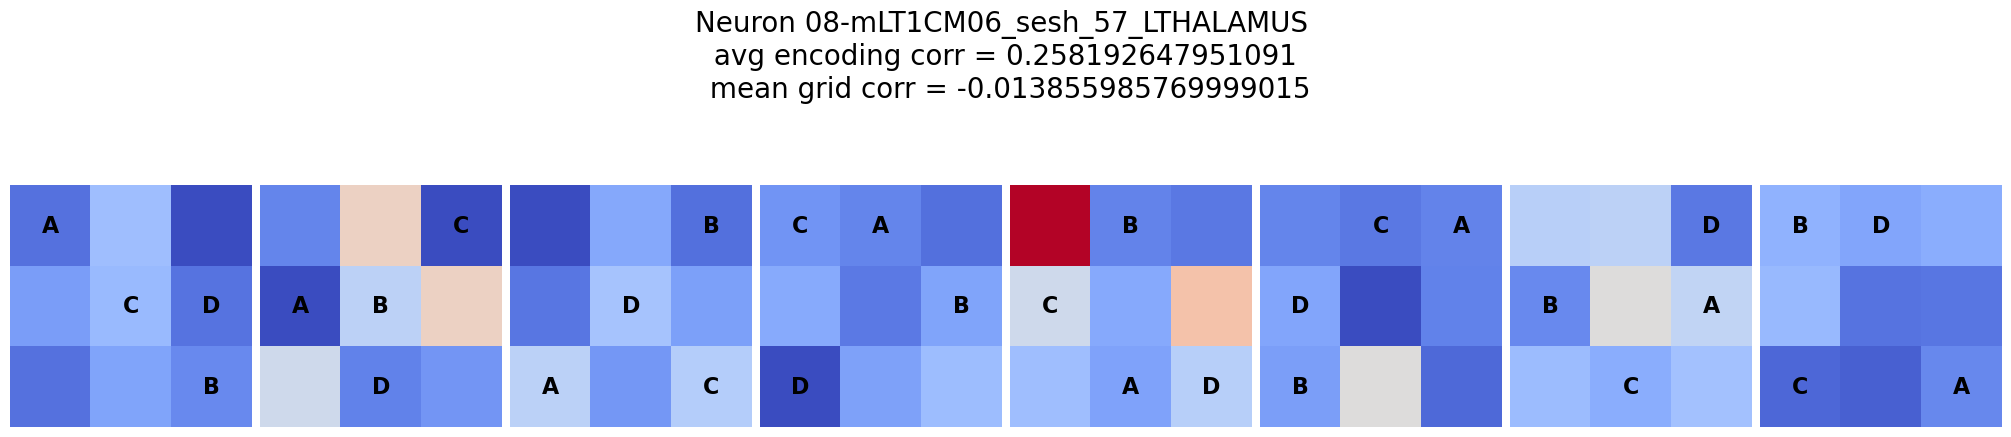

58
loading files for subject 58
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.403
Neuron 1: Mean grid correlation = 0.224
Neuron 2: Mean grid correlation = 0.151


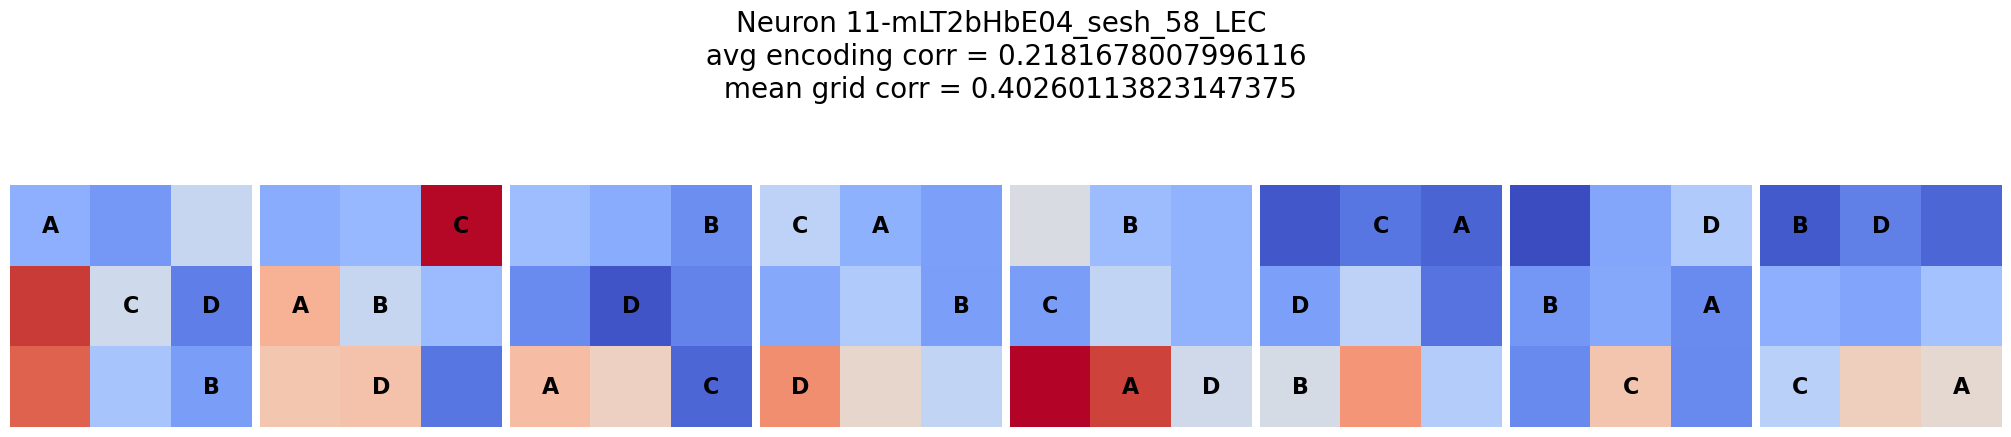

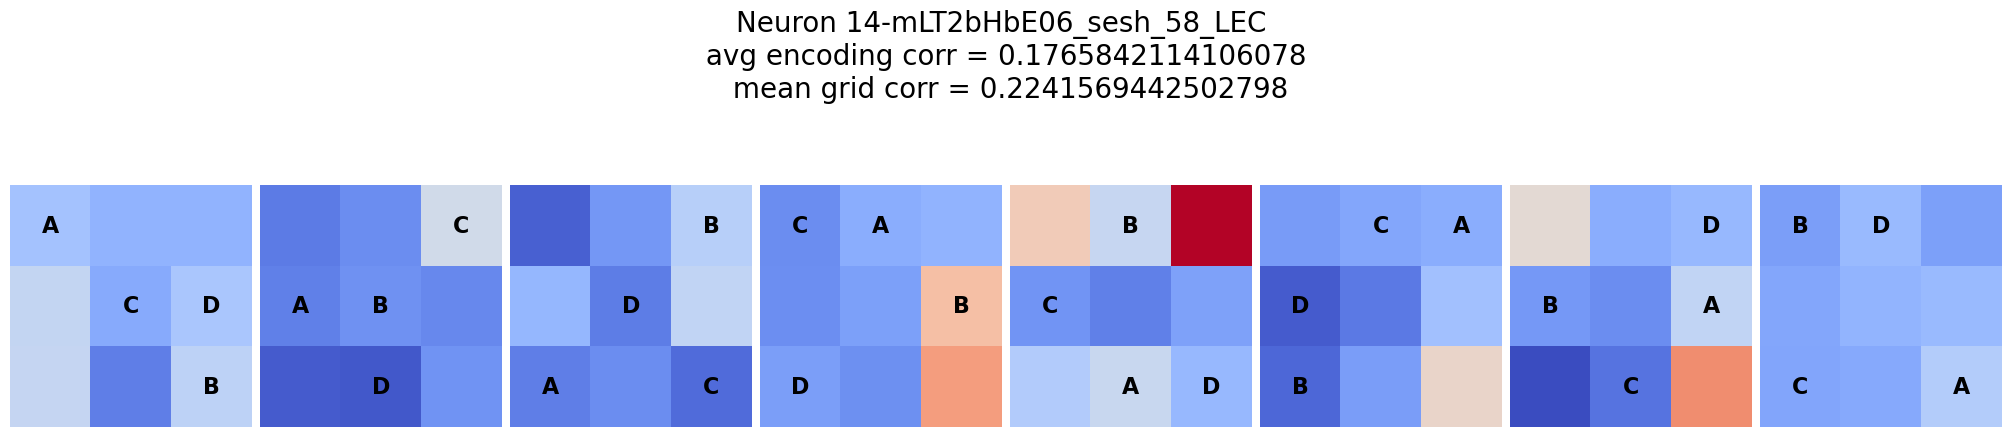

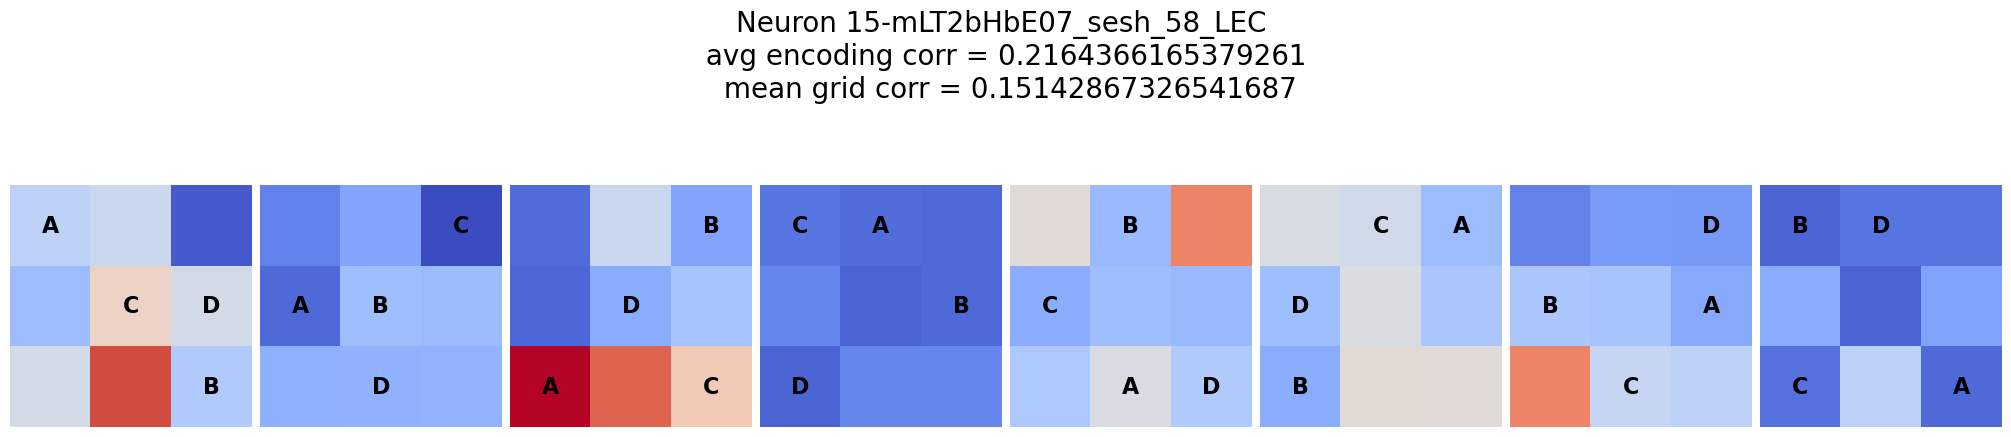

59
loading files for subject 59
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.101
Neuron 1: Mean grid correlation = 0.005
Neuron 2: Mean grid correlation = 0.296
Neuron 3: Mean grid correlation = 0.053
Neuron 4: Mean grid correlation = 0.080


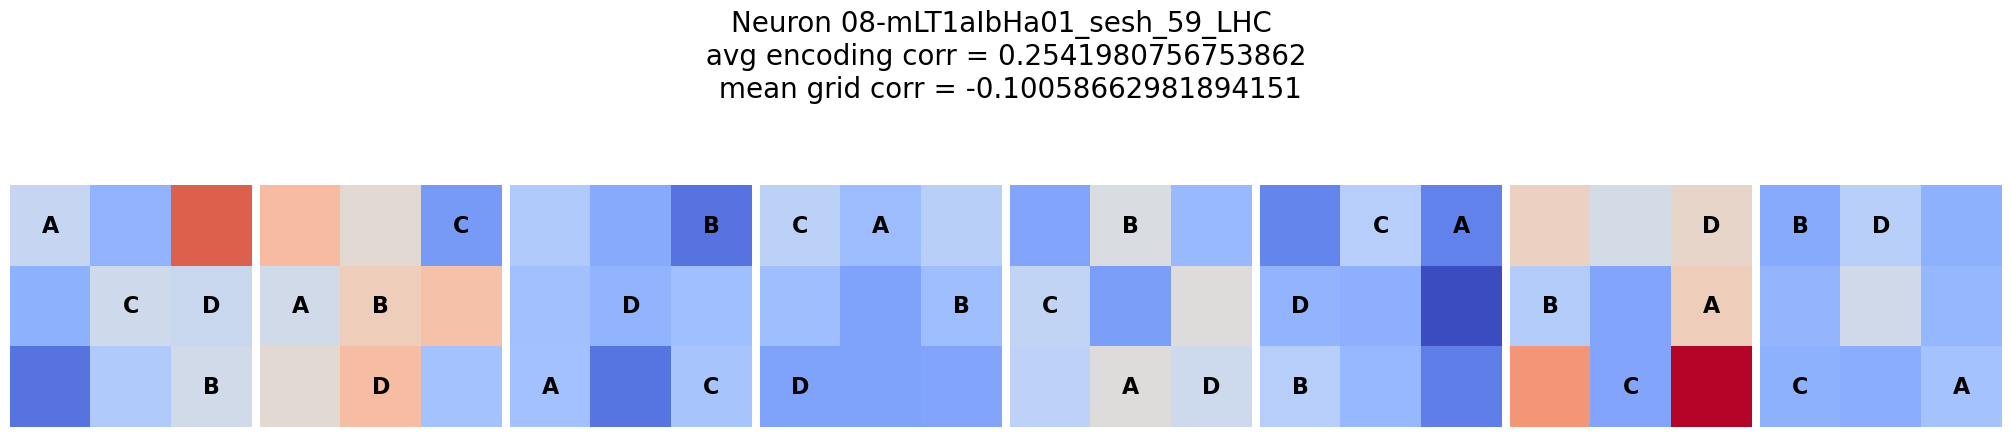

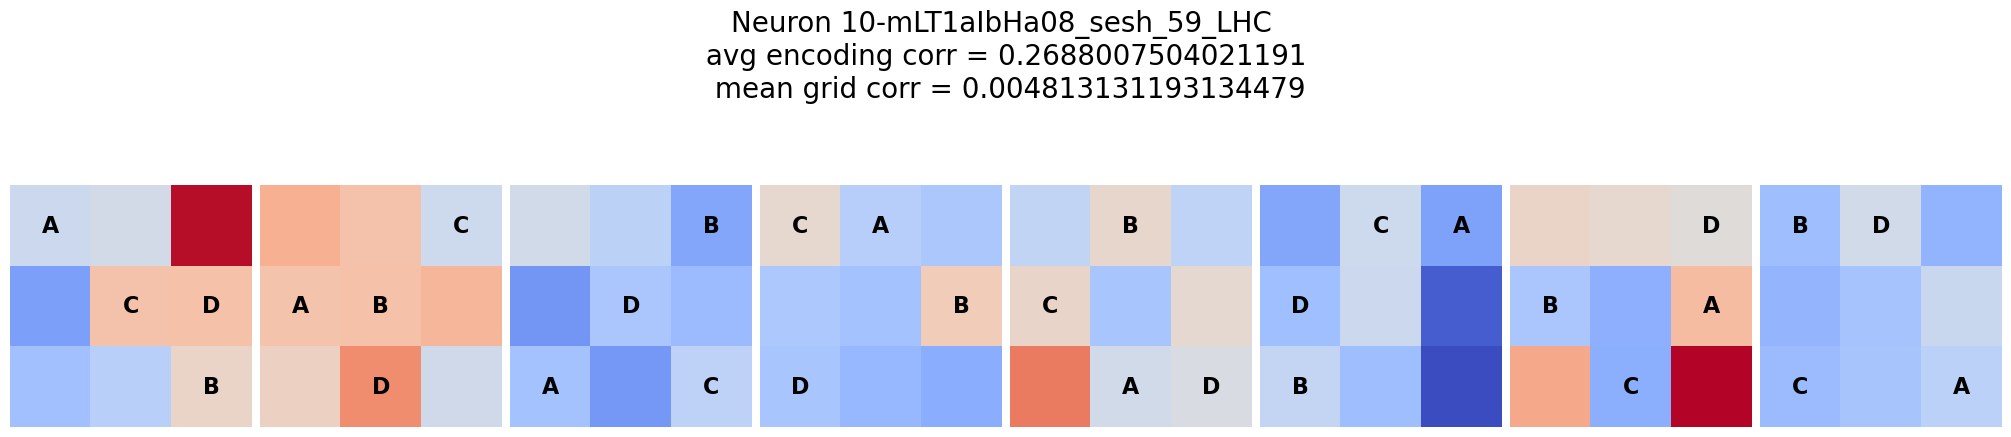

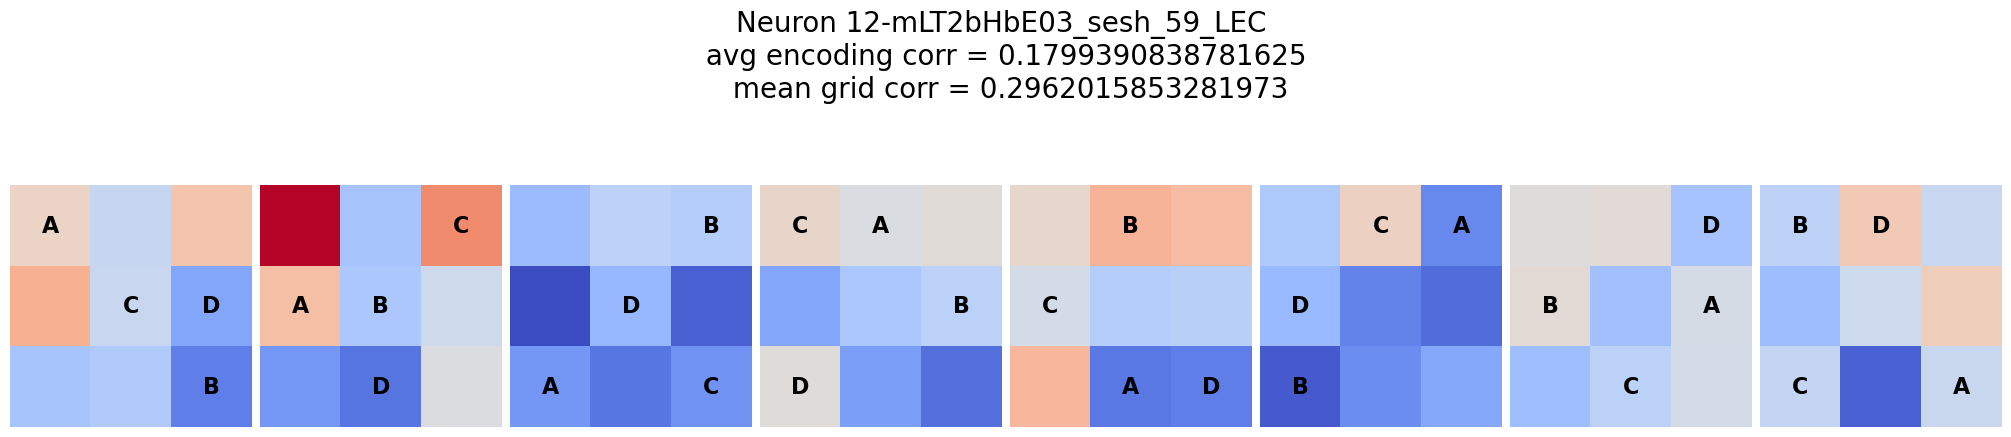

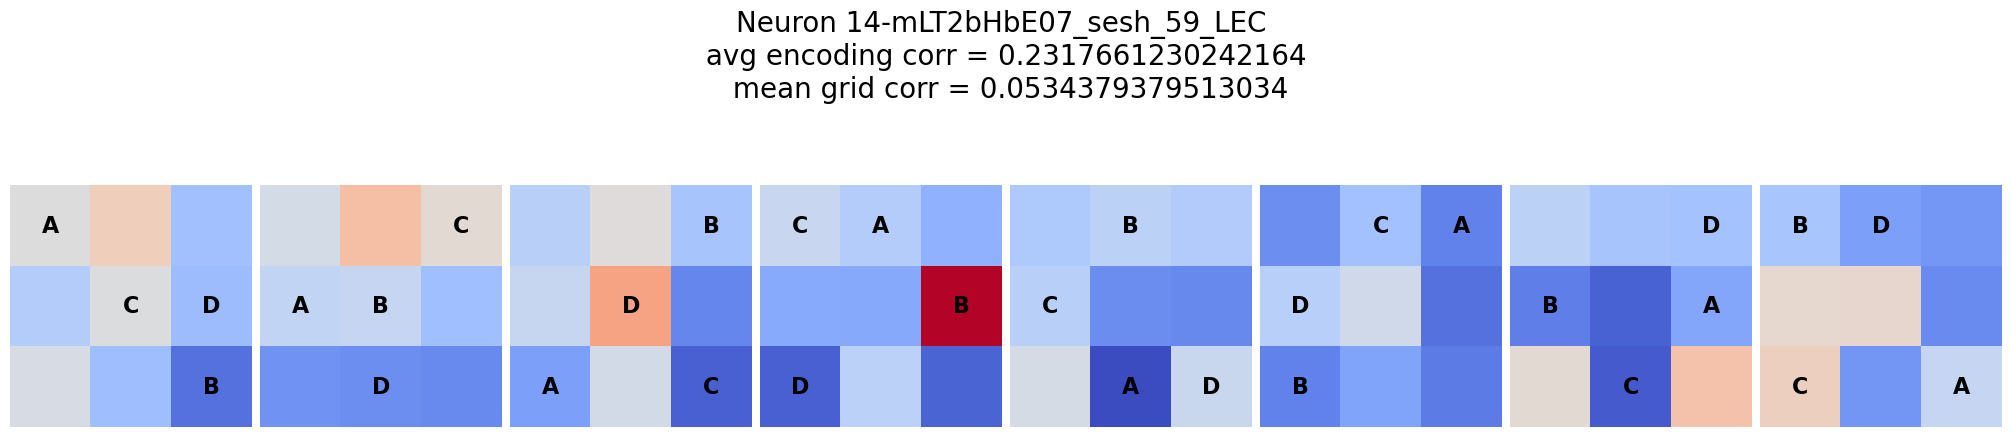

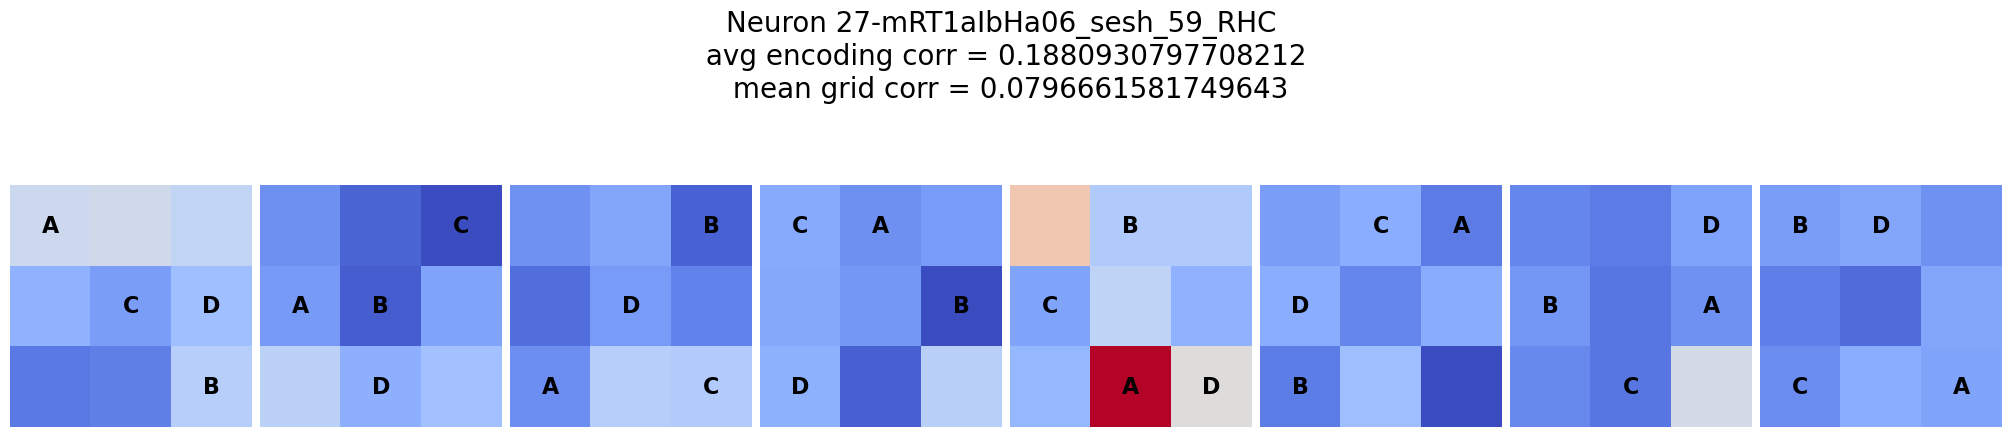

In [24]:
# DO THIS FOR ALL IN ONE BIG LOOP
data_folder = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives"

# sig_sessions_test = sig_sessions[0:3]

for sub in sig_sessions:
    if sub == 'sub-18':
        continue
    sesh = sub.split('-')[1]
    print(sesh)
    target_cells = []
    avg_corr_target_cells = []
    for idx, row in loc_df_sig.iterrows():
        if f"sesh_{sesh}" in row['cell']:
            target_cells.append(row['cell'])
            avg_corr_target_cells.append(row['average_corr'])
    data = mc.analyse.helpers_human_cells.load_cell_data(data_folder, [sesh])
    
    
    # go through 'electrode_labels' and figure out the correct index of the cell array.
    # take the first target cell.
    target_idx = [
        idx for idx, label_cell in enumerate(data[f"sub-{sesh}"]['electrode_labels'])
        if any(target in label_cell or label_cell in target for target in target_cells)
    ]
    
    # find out which grids are unique
    unique_grids, idx_unique_grid, idx_same_grids, counts = np.unique(data[f"sub-{sesh}"]['reward_configs'], axis=0,
                                                            return_index=True,
                                                            return_inverse=True,
                                                            return_counts=True)

    print(f"unique grids are {unique_grids}")

    firing_rate_cells = []
    for target_cell in target_idx:
        # initialise mean firing rates array for all target neurons
        mean_firing_rates_locs = np.zeros((9, len(idx_unique_grid)))
        # then go through all unique grids and concatenate the neurons to compute the firing rate for each location per grid.
        for i, unique_task_idx in enumerate(idx_unique_grid): 
            # I need to concatenate the location and cell array from the same grids.
            all_task_idx = np.where(idx_same_grids == idx_same_grids[unique_task_idx])[0]
            # print(f"same grids are in {all_task_idx}")
            all_neurons_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['neurons'])
            curr_neuron_currtask = [all_neurons[target_cell] for all_neurons in all_neurons_currtask]
            curr_neuron_currtask_flat = np.concatenate(curr_neuron_currtask)

            # DO THE SAME FOR LOCATIONS!
            all_locs_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['locations'])
            curr_locs_currtask_flat = np.concatenate(all_locs_currtask)

            for loc in range(9):
                mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()
                
        firing_rate_cells.append(mean_firing_rates_locs)


    # compute mean correlation between all grids
    mean_grid_corr = []
    for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
        # Compute pairwise Pearson correlation between columns (i.e., grids)
        corr_matrix = np.corrcoef(FR_maps_neuron.T)  # transpose: shape (n_grids, 9) --> correlation of grids

        # Mask upper triangle excluding diagonal
        upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
        mean_corr = np.nanmean(corr_matrix[upper_triangle_indices])  # nanmean in case of NaNs
        mean_grid_corr.append(mean_corr)
        print(f"Neuron {neuron_i}: Mean grid correlation = {mean_corr:.3f}")

        

    # firing_rate_cells is a list of (9 x N) arrays, one per neuron
    for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
        max_rate = np.nanmax(FR_maps_neuron)
        min_rate = np.nanmin(FR_maps_neuron)

        fig1, f1_axes = plt.subplots(figsize=(20, 5), ncols=FR_maps_neuron.shape[1], nrows=1, constrained_layout=True)

        # If only one grid, f1_axes won't be iterable – wrap in list
        if FR_maps_neuron.shape[1] == 1:
            f1_axes = [f1_axes]

        for task_ind in np.arange(FR_maps_neuron.shape[1]):
            FR_map_neuron_task = FR_maps_neuron[:, task_ind].reshape(3, 3)
            ax1 = f1_axes[task_ind]

            im = ax1.matshow(FR_map_neuron_task, cmap='coolwarm', vmin=min_rate, vmax=max_rate)
            ax1.axis('off')

            for i_r, reward in enumerate(unique_grids[task_ind]):
                if i_r == 0:
                    write = 'A'
                elif i_r == 1:
                    write = 'B'
                elif i_r == 2:
                    write = 'C'
                elif i_r == 3:
                    write = 'D'
                pos_idx = int(reward) - 1  # assuming rewards are 1-based location indices
                row, col = Task_grid_plotting[pos_idx]
                ax1.text(col, row, write, ha='center', va='center',
                         color='black', fontsize=16, fontweight='bold')

        fig1.suptitle(f'Neuron {target_cells[neuron_i]} \n avg encoding corr = {avg_corr_target_cells[neuron_i]} \n mean grid corr = {mean_grid_corr[neuron_i]}', fontsize=20)
        plt.show()


07
loading files for subject 07
unique grids are [[1. 3. 5. 6.]
 [1. 8. 4. 9.]
 [2. 5. 7. 8.]
 [2. 5. 8. 6.]
 [2. 9. 8. 5.]
 [3. 6. 2. 4.]
 [5. 1. 7. 4.]
 [5. 3. 2. 6.]
 [7. 1. 4. 9.]
 [7. 4. 3. 1.]
 [8. 7. 5. 9.]
 [9. 7. 6. 4.]]
same grids are in [12 18]
same grids are in [ 2 11]
same grids are in [ 0 10]
same grids are in [13 23]
same grids are in [16 21]
same grids are in [4 9]
same grids are in [1 6]
same grids are in [3 7]
same grids are in [5 8]
same grids are in [17 20]
same grids are in [14 19]
same grids are in [15 22]
same grids are in [12 18]
same grids are in [ 2 11]
same grids are in [ 0 10]
same grids are in [13 23]
same grids are in [16 21]
same grids are in [4 9]
same grids are in [1 6]
same grids are in [3 7]
same grids are in [5 8]
same grids are in [17 20]
same grids are in [14 19]
same grids are in [15 22]
Neuron 0: Mean grid correlation = 0.027
Neuron 1: Mean grid correlation = 0.084


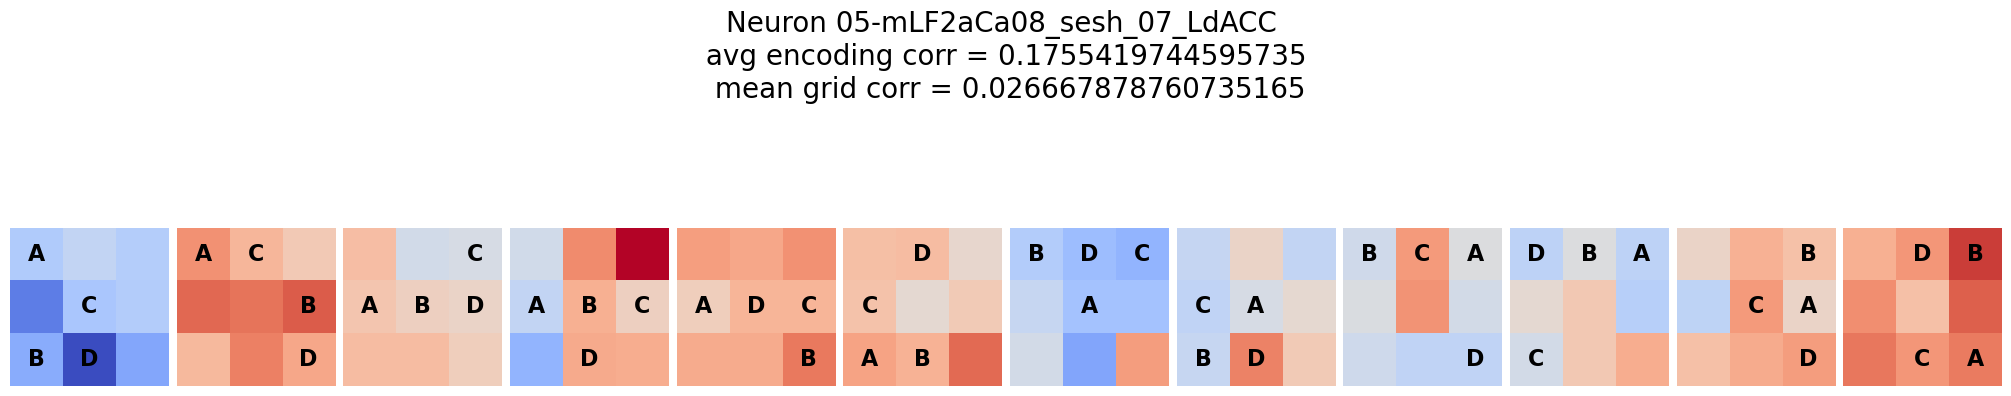

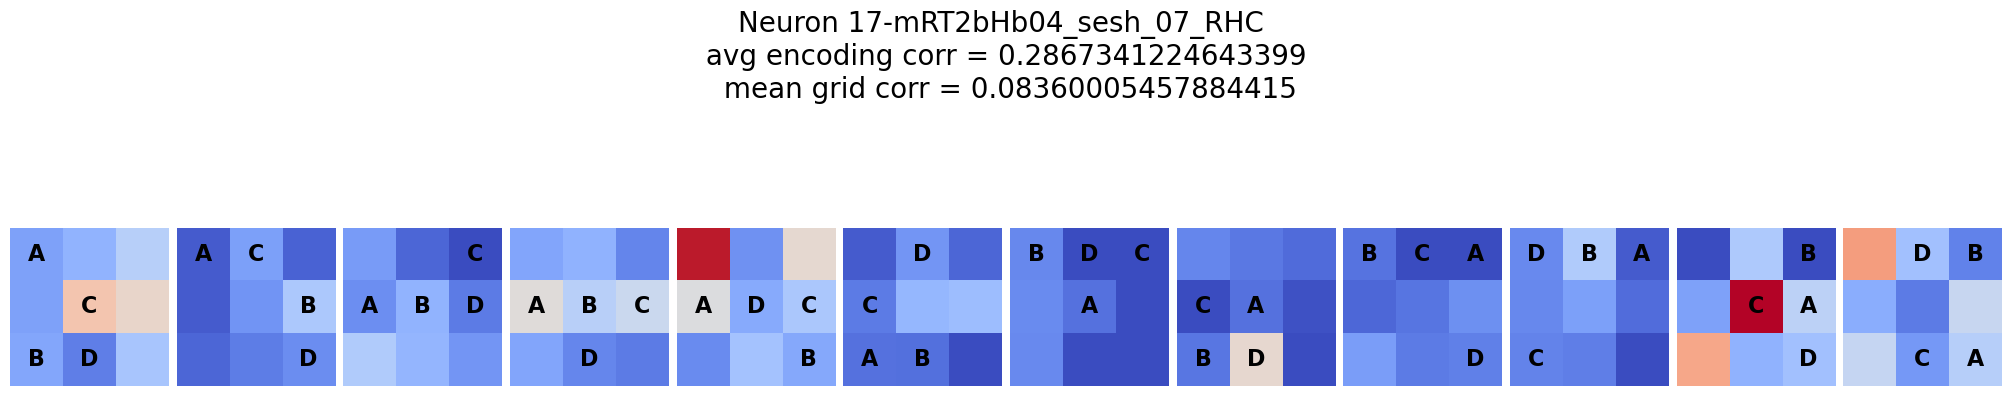

In [23]:
# just checking neuron 05 for session 07. 
data_folder = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives"
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))
Task_grid_plotting=np.column_stack((Task_grid[:,1],Task_grid[:,0]))

# sig_sessions_test = sig_sessions[0:3]
sub = 'sub-07'
sesh = sub.split('-')[1]
print(sesh)
target_cells = []
avg_corr_target_cells = []
for idx, row in loc_df_sig.iterrows():
    if f"sesh_{sesh}" in row['cell']:
        target_cells.append(row['cell'])
        avg_corr_target_cells.append(row['average_corr'])
data = mc.analyse.helpers_human_cells.load_cell_data(data_folder, [sesh])


# go through 'electrode_labels' and figure out the correct index of the cell array.
# take the first target cell.
target_idx = [
    idx for idx, label_cell in enumerate(data[f"sub-{sesh}"]['electrode_labels'])
    if any(target in label_cell or label_cell in target for target in target_cells)
]

# find out which grids are unique
unique_grids, idx_unique_grid, idx_same_grids, counts = np.unique(data[f"sub-{sesh}"]['reward_configs'], axis=0,
                                                        return_index=True,
                                                        return_inverse=True,
                                                        return_counts=True)

print(f"unique grids are {unique_grids}")

firing_rate_cells = []
for target_cell in target_idx:
    # initialise mean firing rates array for all target neurons
    mean_firing_rates_locs = np.zeros((9, len(idx_unique_grid)))
    # then go through all unique grids and concatenate the neurons to compute the firing rate for each location per grid.
    for i, unique_task_idx in enumerate(idx_unique_grid): 
        # I need to concatenate the location and cell array from the same grids.
        all_task_idx = np.where(idx_same_grids == idx_same_grids[unique_task_idx])[0]
        print(f"same grids are in {all_task_idx}")
        all_neurons_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['neurons'])
        curr_neuron_currtask = [all_neurons[target_cell] for all_neurons in all_neurons_currtask]
        curr_neuron_currtask_flat = np.concatenate(curr_neuron_currtask)

        # DO THE SAME FOR LOCATIONS!
        all_locs_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['locations'])
        curr_locs_currtask_flat = np.concatenate(all_locs_currtask)

        for loc in range(9):
            mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()

    firing_rate_cells.append(mean_firing_rates_locs)


# compute mean correlation between all grids
mean_grid_corr = []
for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
    # Compute pairwise Pearson correlation between columns (i.e., grids)
    corr_matrix = np.corrcoef(FR_maps_neuron.T)  # transpose: shape (n_grids, 9) --> correlation of grids

    # Mask upper triangle excluding diagonal
    upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
    mean_corr = np.nanmean(corr_matrix[upper_triangle_indices])  # nanmean in case of NaNs
    mean_grid_corr.append(mean_corr)
    print(f"Neuron {neuron_i}: Mean grid correlation = {mean_corr:.3f}")



# firing_rate_cells is a list of (9 x N) arrays, one per neuron
for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
    max_rate = np.nanmax(FR_maps_neuron)
    min_rate = np.nanmin(FR_maps_neuron)

    fig1, f1_axes = plt.subplots(figsize=(20, 5), ncols=FR_maps_neuron.shape[1], nrows=1, constrained_layout=True)

    # If only one grid, f1_axes won't be iterable – wrap in list
    if FR_maps_neuron.shape[1] == 1:
        f1_axes = [f1_axes]

    for task_ind in np.arange(FR_maps_neuron.shape[1]):
        FR_map_neuron_task = FR_maps_neuron[:, task_ind].reshape(3, 3)
        ax1 = f1_axes[task_ind]

        im = ax1.matshow(FR_map_neuron_task, cmap='coolwarm', vmin=min_rate, vmax=max_rate)
        ax1.axis('off')

        for i_r, reward in enumerate(unique_grids[task_ind]):
            if i_r == 0:
                write = 'A'
            elif i_r == 1:
                write = 'B'
            elif i_r == 2:
                write = 'C'
            elif i_r == 3:
                write = 'D'
            pos_idx = int(reward) - 1  # assuming rewards are 1-based location indices
            row, col = Task_grid_plotting[pos_idx]
            ax1.text(col, row, write, ha='center', va='center',
                     color='black', fontsize=16, fontweight='bold')

    fig1.suptitle(f'Neuron {target_cells[neuron_i]} \n avg encoding corr = {avg_corr_target_cells[neuron_i]} \n mean grid corr = {mean_grid_corr[neuron_i]}', fontsize=20)
    plt.show()


In [22]:
unique_grids, idx_unique_grid, idx_same_grids, counts = np.unique(data[f"sub-{sesh}"]['reward_configs'], axis=0,
                                                        return_index=True,
                                                        return_inverse=True,
                                                        return_counts=True)
print(f"unique grids {unique_grids}")
print(f"idx_unique_grid {idx_unique_grid}")
print(f"idx_same_grids {idx_same_grids}")
print(f"counts {counts}")
print(data[f"sub-{sesh}"]['reward_configs'])


for i, unique_task_idx in enumerate(idx_unique_grid): 
    # I need to concatenate the location and cell array from the same grids.
    all_task_idx = np.where(idx_same_grids == idx_same_grids[unique_task_idx])[0]
    print(f"same grids are in {all_task_idx}")


unique grids [[1. 3. 5. 6.]
 [1. 8. 4. 9.]
 [2. 5. 7. 8.]
 [2. 5. 8. 6.]
 [2. 9. 8. 5.]
 [3. 6. 2. 4.]
 [5. 1. 7. 4.]
 [5. 3. 2. 6.]
 [7. 1. 4. 9.]
 [7. 4. 3. 1.]
 [8. 7. 5. 9.]
 [9. 7. 6. 4.]]
idx_unique_grid [12  2  0 13 16  4  1  3  5 17 14 15]
idx_same_grids [ 2  6  1  7  5  8  6  7  8  5  2  1  0  3 10 11  4  9  0 10  9  4 11  3]
counts [2 2 2 2 2 2 2 2 2 2 2 2]
[[2. 5. 7. 8.]
 [5. 1. 7. 4.]
 [1. 8. 4. 9.]
 [5. 3. 2. 6.]
 [3. 6. 2. 4.]
 [7. 1. 4. 9.]
 [5. 1. 7. 4.]
 [5. 3. 2. 6.]
 [7. 1. 4. 9.]
 [3. 6. 2. 4.]
 [2. 5. 7. 8.]
 [1. 8. 4. 9.]
 [1. 3. 5. 6.]
 [2. 5. 8. 6.]
 [8. 7. 5. 9.]
 [9. 7. 6. 4.]
 [2. 9. 8. 5.]
 [7. 4. 3. 1.]
 [1. 3. 5. 6.]
 [8. 7. 5. 9.]
 [7. 4. 3. 1.]
 [2. 9. 8. 5.]
 [9. 7. 6. 4.]
 [2. 5. 8. 6.]]
same grids are in [12 18]
same grids are in [ 2 11]
same grids are in [ 0 10]
same grids are in [13 23]
same grids are in [16 21]
same grids are in [4 9]
same grids are in [1 6]
same grids are in [3 7]
same grids are in [5 8]
same grids are in [17 20]
same grids are in

In [18]:
all_task_idx = np.where(idx_same_grids == idx_same_grids[i])
print(all_task_idx)
print(i)
print(idx_same_grids[i])
print(idx_same_grids)

(array([ 2, 11]),)
11
1
[ 2  6  1  7  5  8  6  7  8  5  2  1  0  3 10 11  4  9  0 10  9  4 11  3]


01
loading files for subject 01
unique grids are [[1. 4. 8. 2.]
 [1. 6. 3. 5.]
 [1. 8. 7. 3.]
 [3. 4. 9. 8.]
 [6. 2. 7. 9.]
 [8. 2. 5. 7.]]
Neuron 0: Mean grid correlation = 0.117


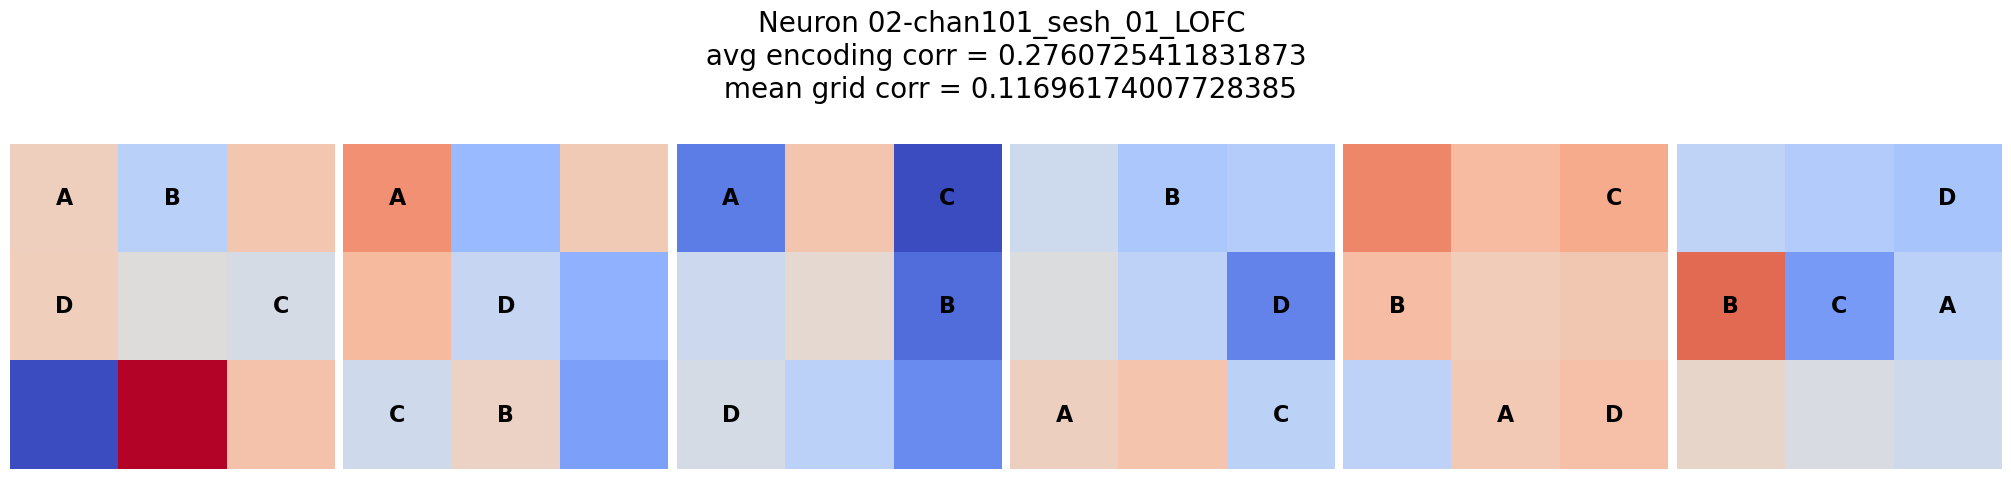

02
loading files for subject 02
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.053


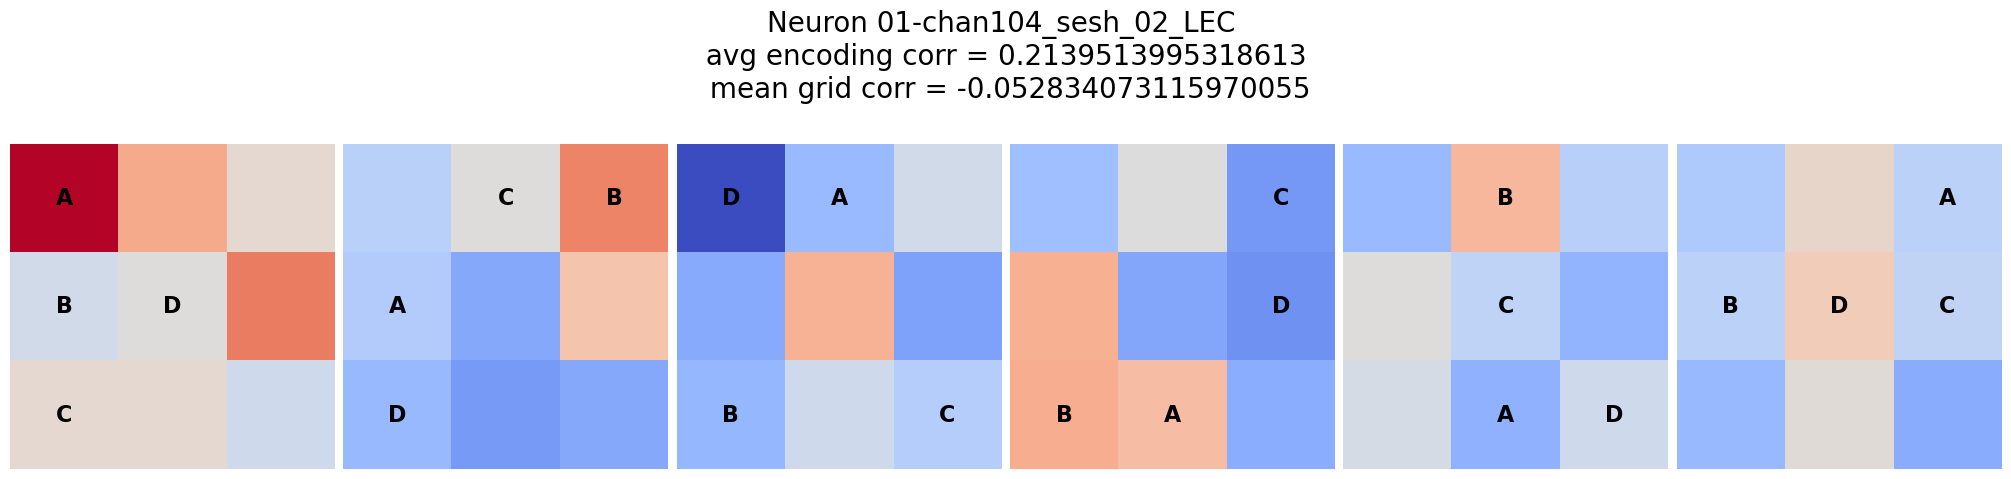

03
loading files for subject 03
unique grids are [[1. 5. 2. 3.]
 [2. 1. 5. 8.]
 [3. 9. 4. 6.]
 [7. 3. 1. 9.]
 [7. 5. 8. 1.]
 [9. 8. 6. 4.]]
Neuron 0: Mean grid correlation = 0.061


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_14790/2766998756.py:57: RuntimeWarning: Mean of empty slice.
  mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()
/Users/xpsy1114/miniconda3/envs/env_multiple_clocks/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


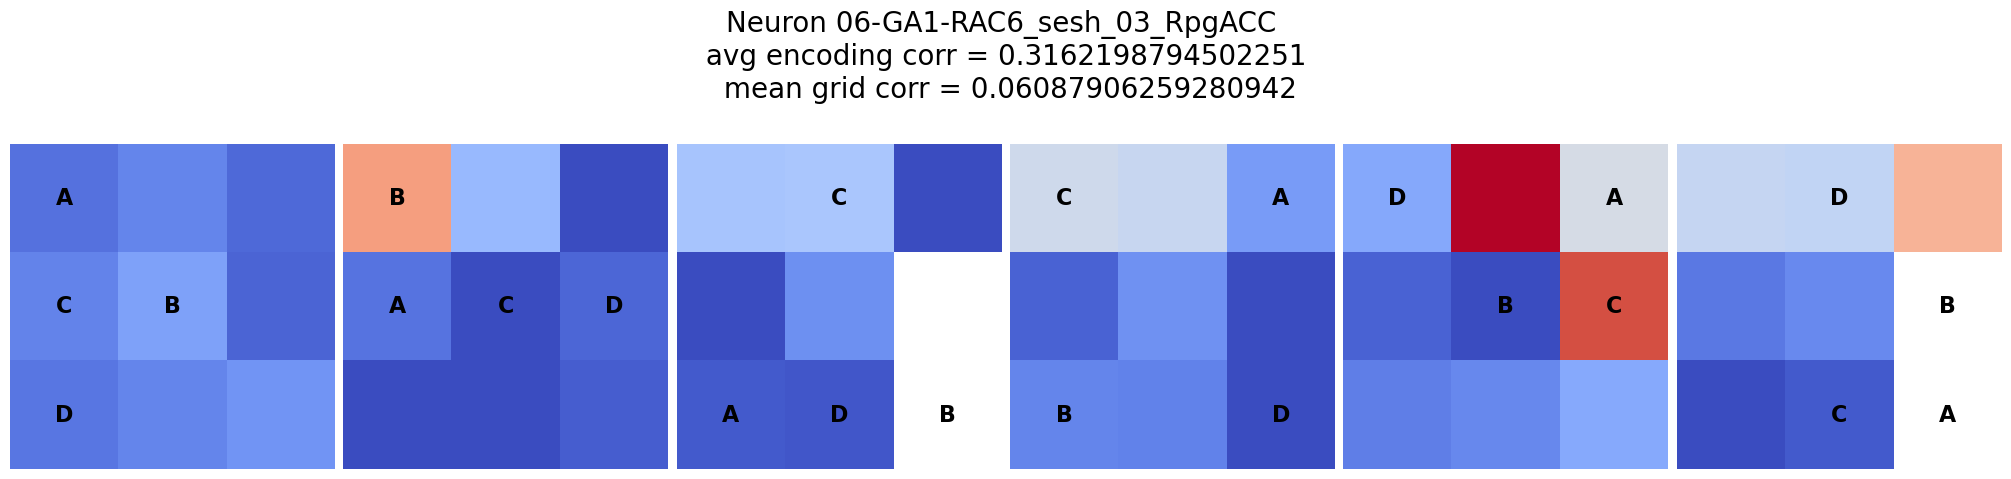

07
loading files for subject 07
unique grids are [[1. 3. 5. 6.]
 [1. 8. 4. 9.]
 [2. 5. 7. 8.]
 [2. 5. 8. 6.]
 [2. 9. 8. 5.]
 [3. 6. 2. 4.]
 [5. 1. 7. 4.]
 [5. 3. 2. 6.]
 [7. 1. 4. 9.]
 [7. 4. 3. 1.]
 [8. 7. 5. 9.]
 [9. 7. 6. 4.]]
Neuron 0: Mean grid correlation = 0.119
Neuron 1: Mean grid correlation = 0.183


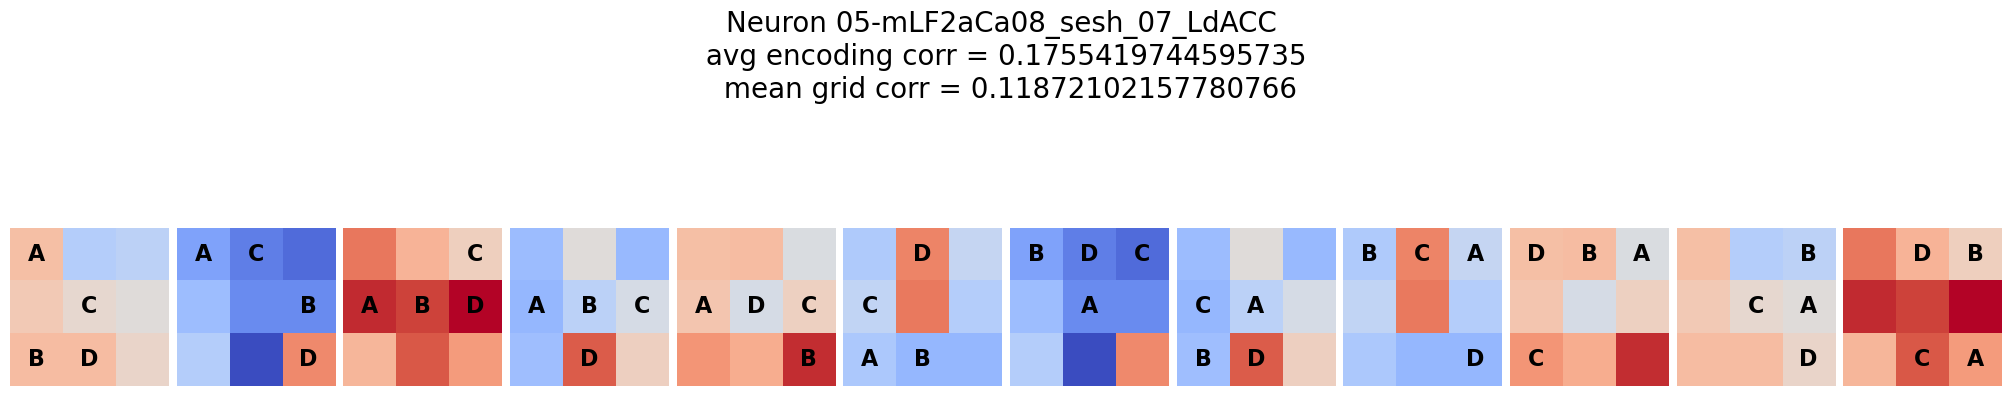

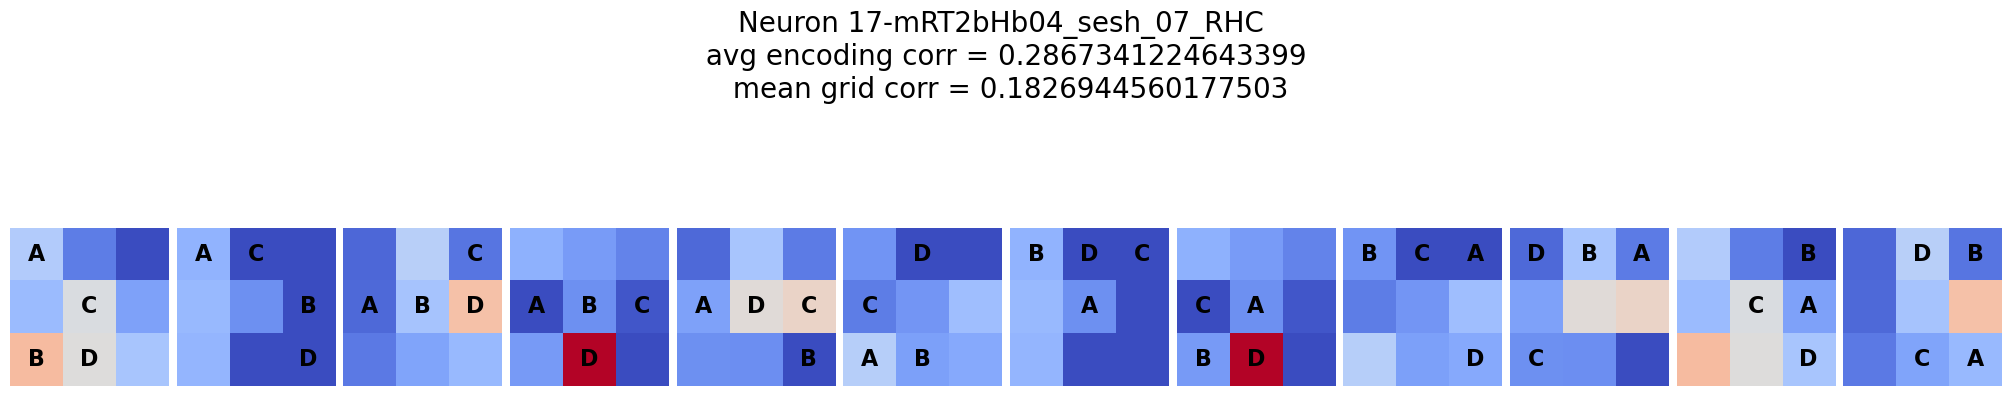

09
loading files for subject 09
unique grids are [[2. 1. 7. 8.]
 [3. 4. 2. 1.]
 [5. 8. 3. 6.]
 [6. 7. 5. 4.]
 [9. 1. 6. 7.]
 [9. 5. 1. 4.]]
Neuron 0: Mean grid correlation = -0.093
Neuron 1: Mean grid correlation = 0.180
Neuron 2: Mean grid correlation = 0.215
Neuron 3: Mean grid correlation = -0.035
Neuron 4: Mean grid correlation = 0.037


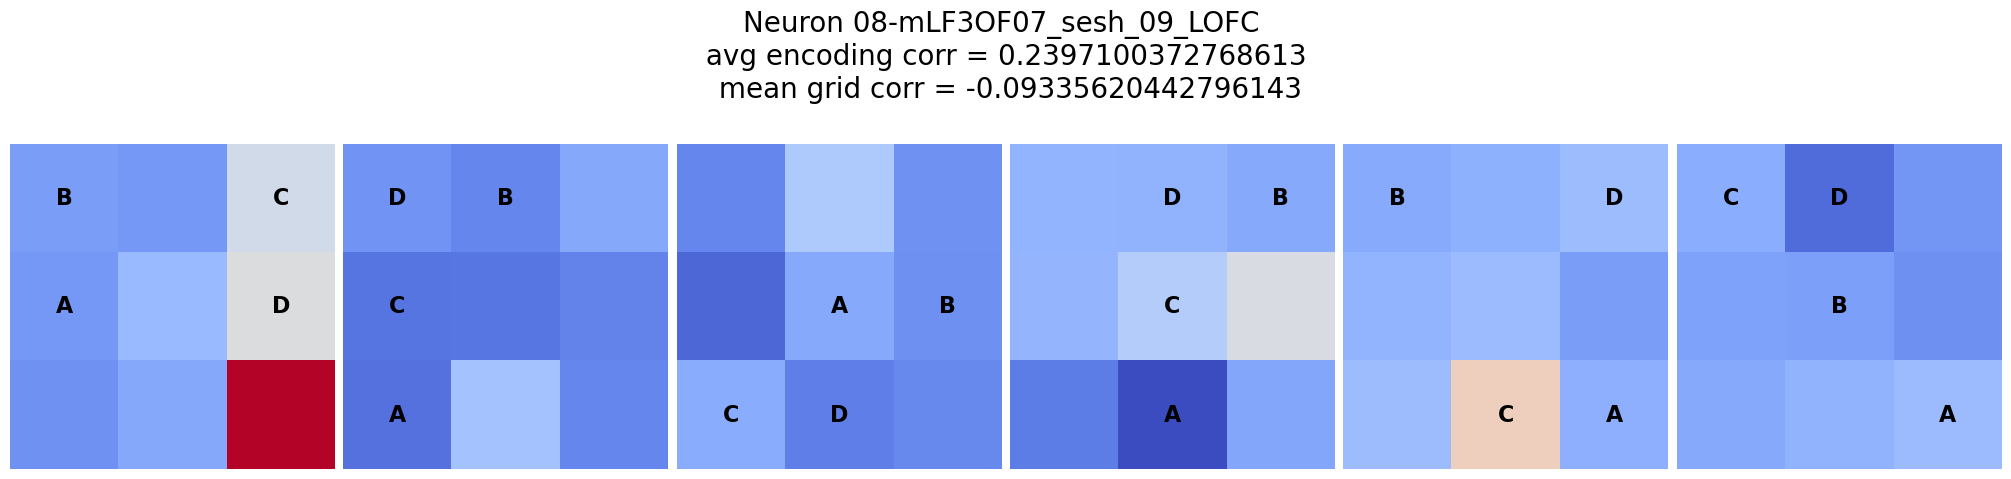

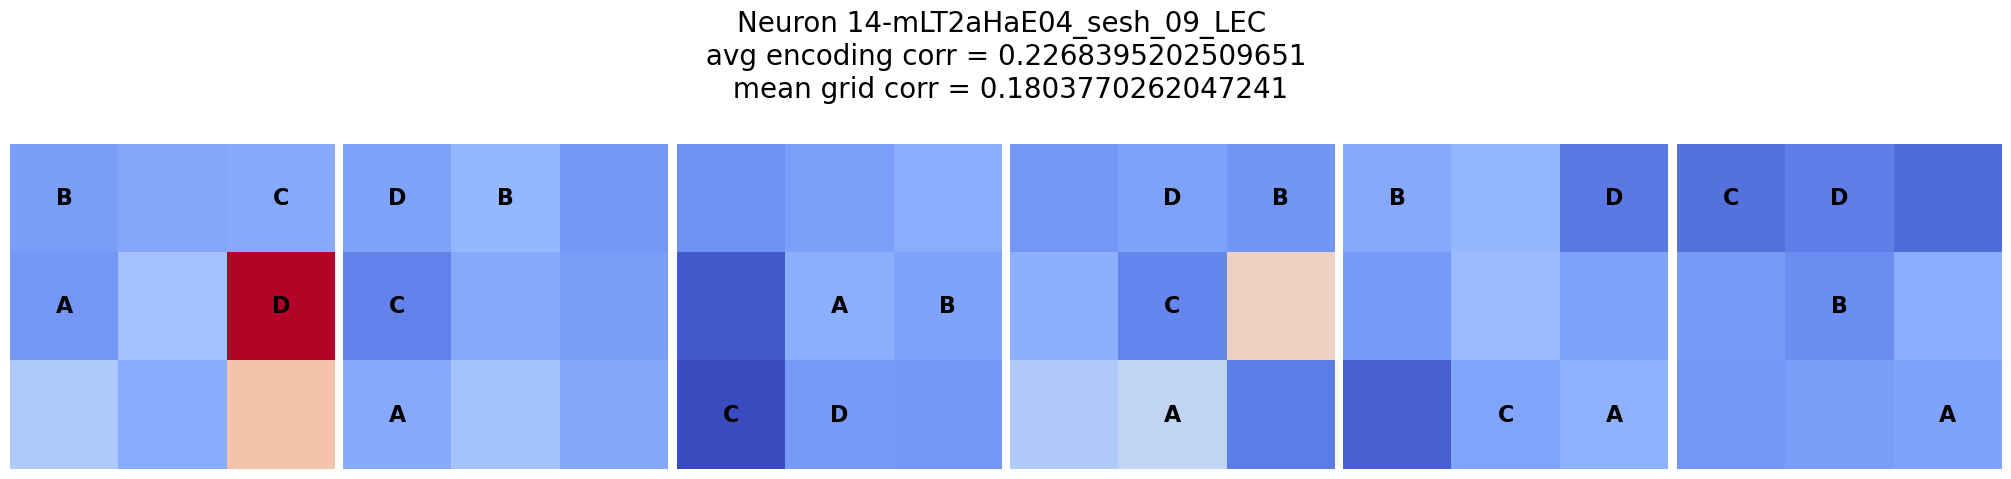

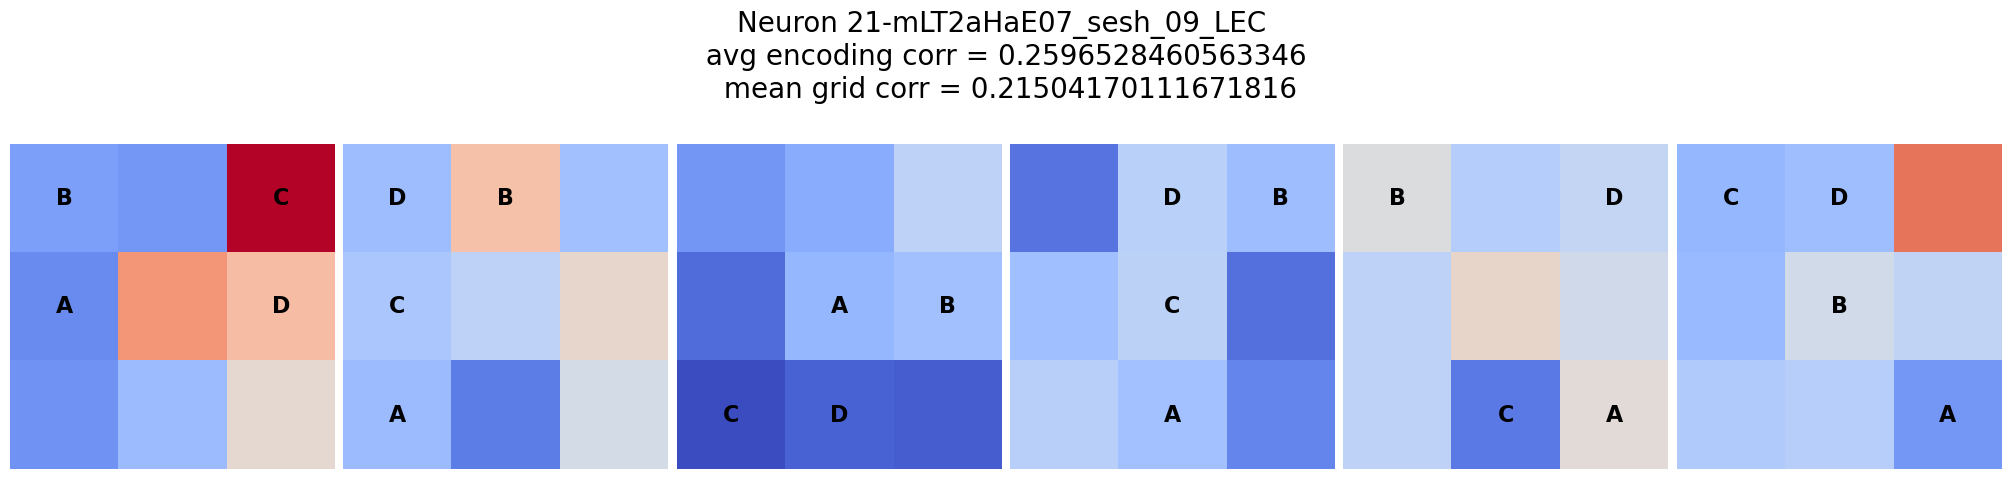

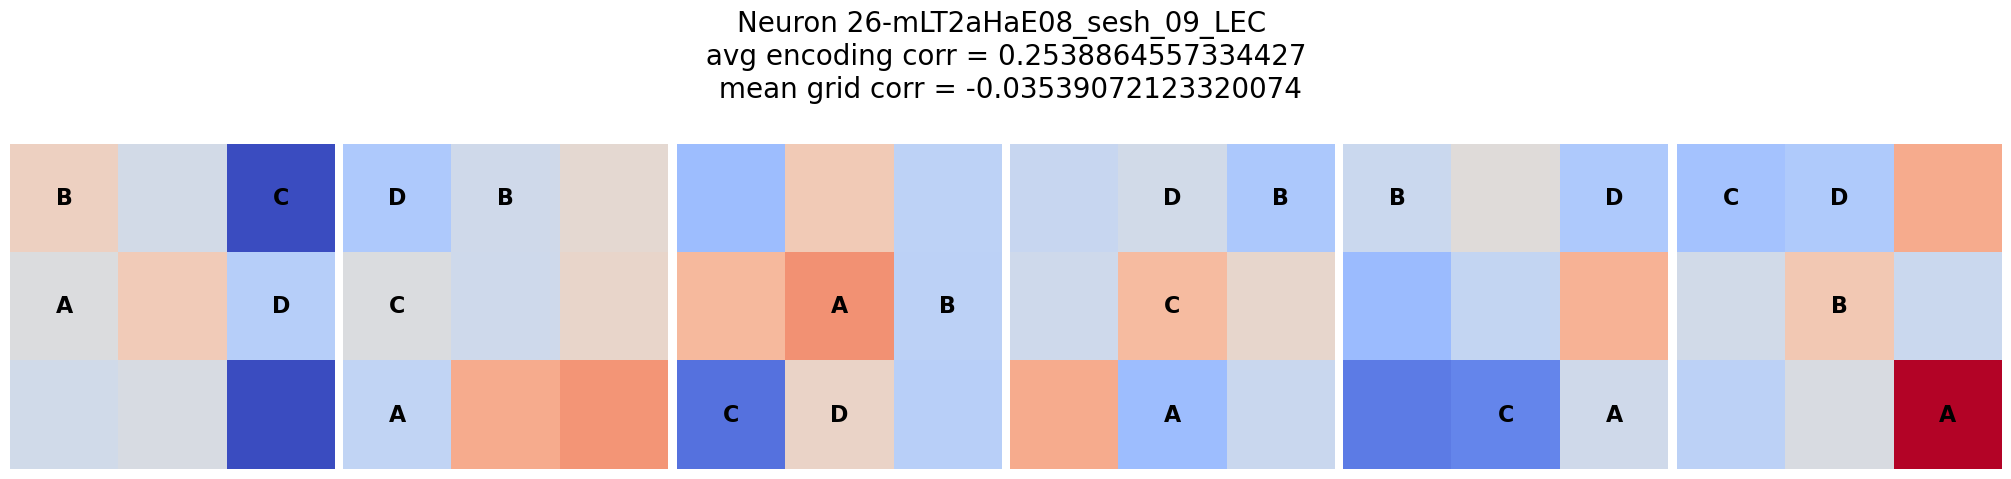

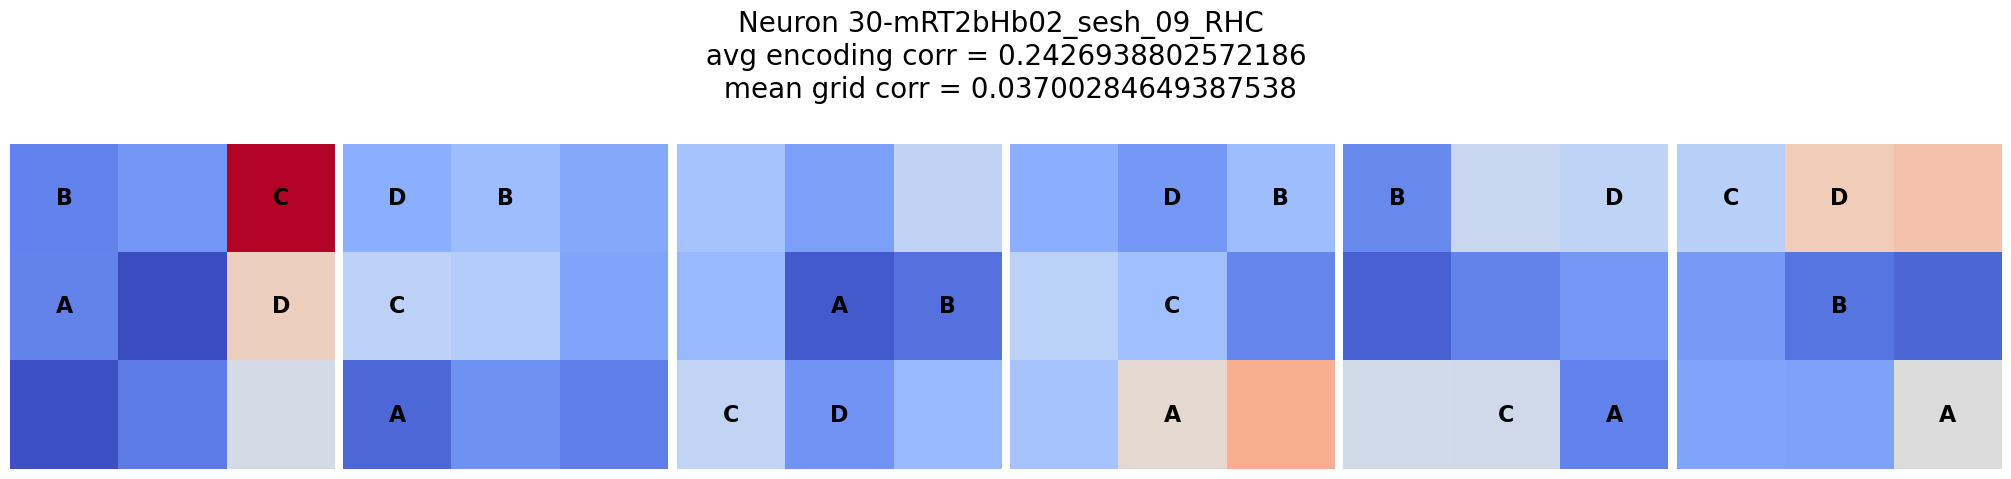

10
loading files for subject 10
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.009
Neuron 1: Mean grid correlation = -0.055


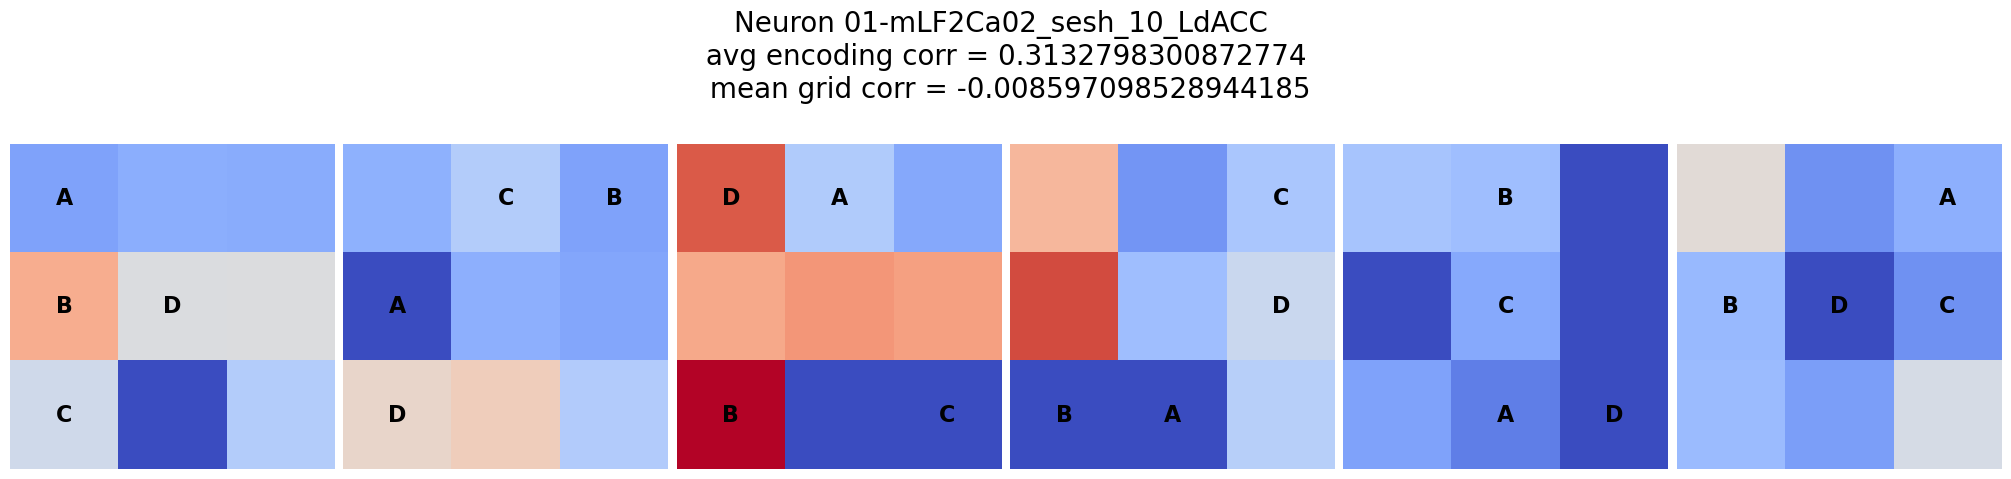

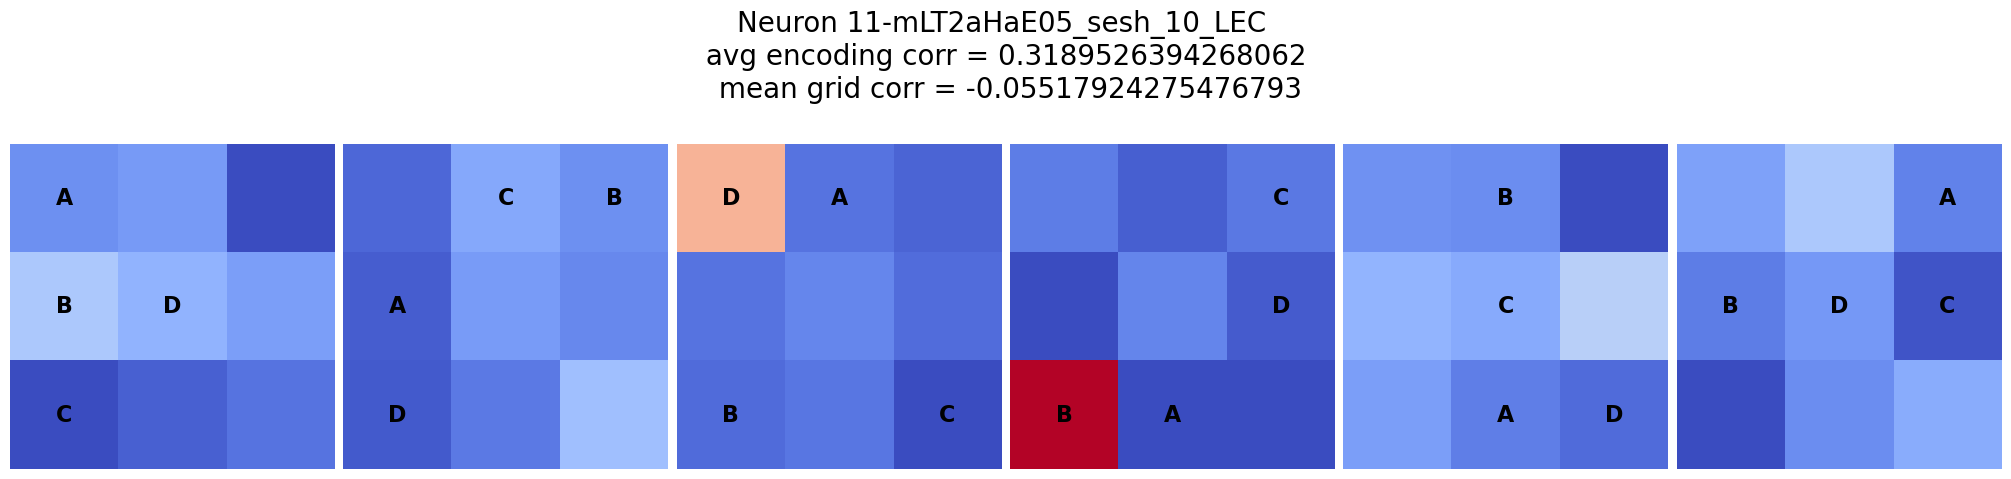

12
loading files for subject 12
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.074
Neuron 1: Mean grid correlation = 0.105


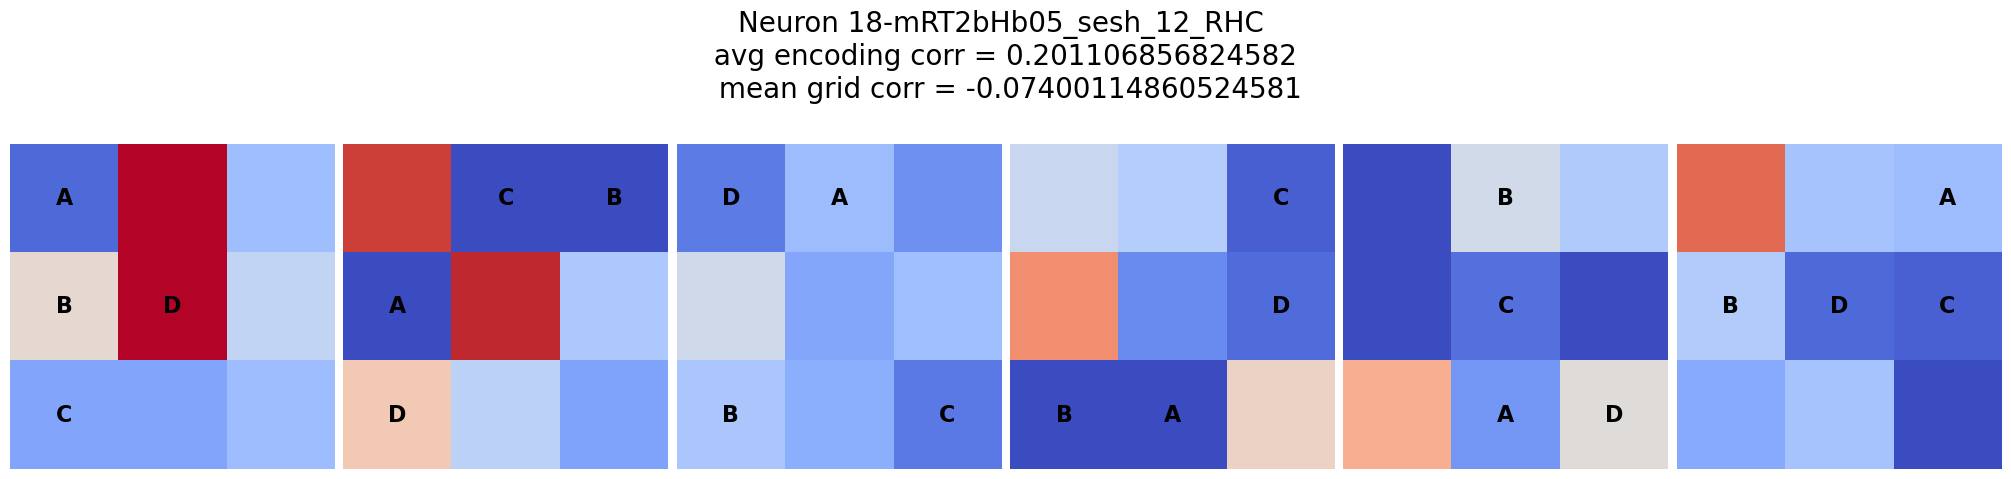

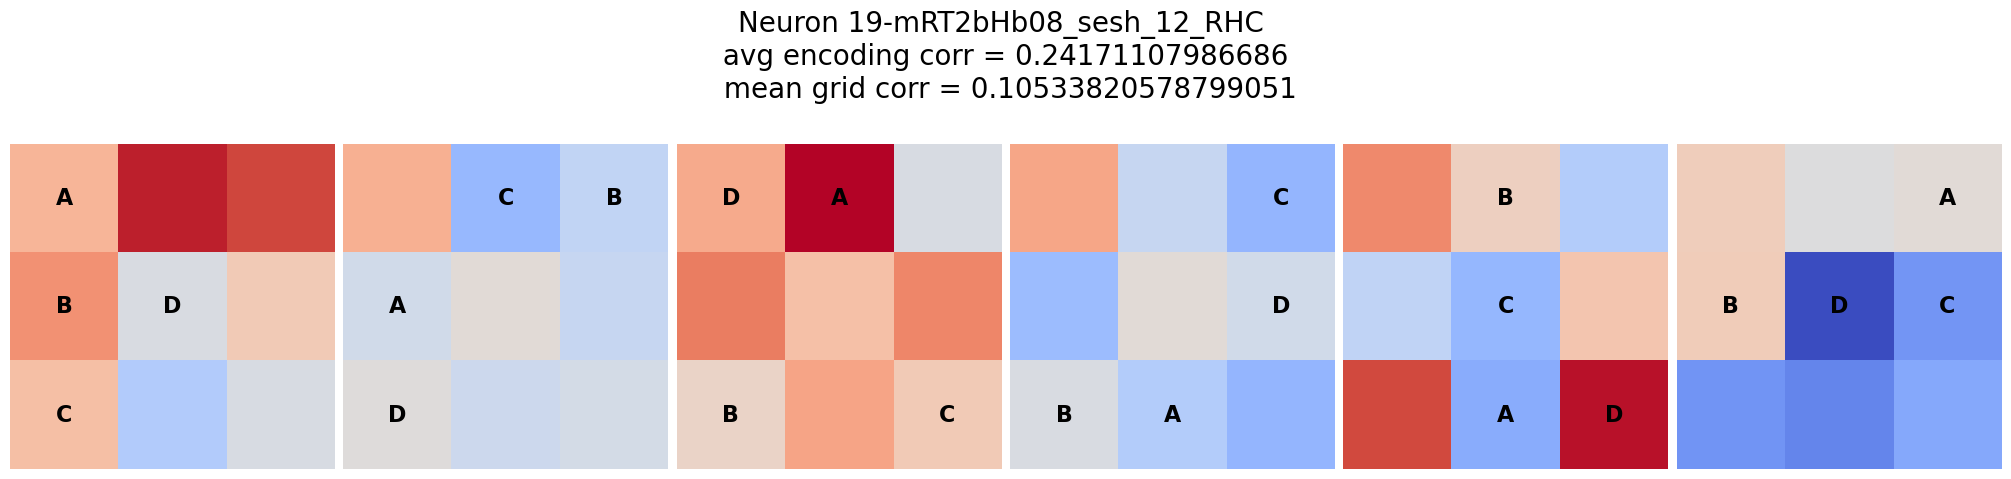

15
loading files for subject 15
unique grids are [[1. 6. 9. 7.]
 [2. 7. 9. 4.]
 [3. 2. 8. 6.]
 [4. 5. 7. 8.]
 [5. 1. 8. 3.]
 [6. 3. 7. 9.]]
Neuron 0: Mean grid correlation = 0.696
Neuron 1: Mean grid correlation = 0.588
Neuron 2: Mean grid correlation = 0.454
Neuron 3: Mean grid correlation = 0.350


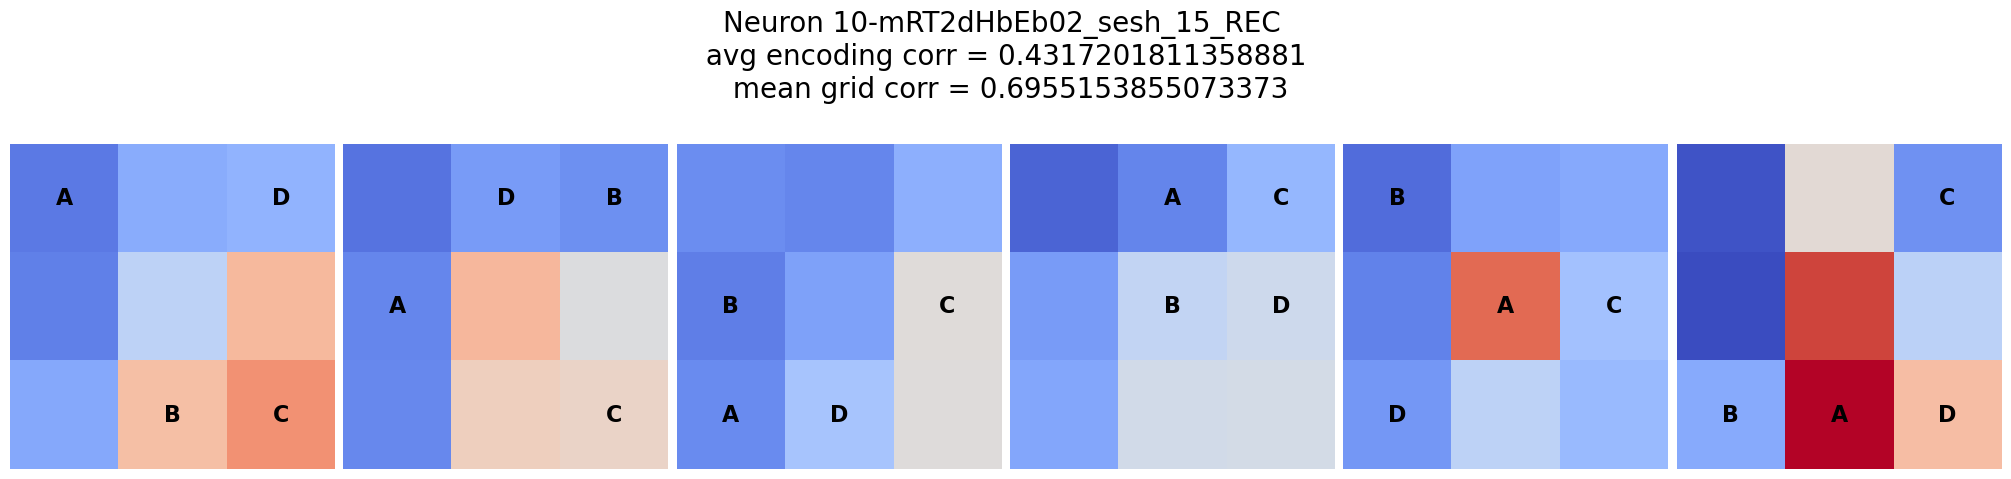

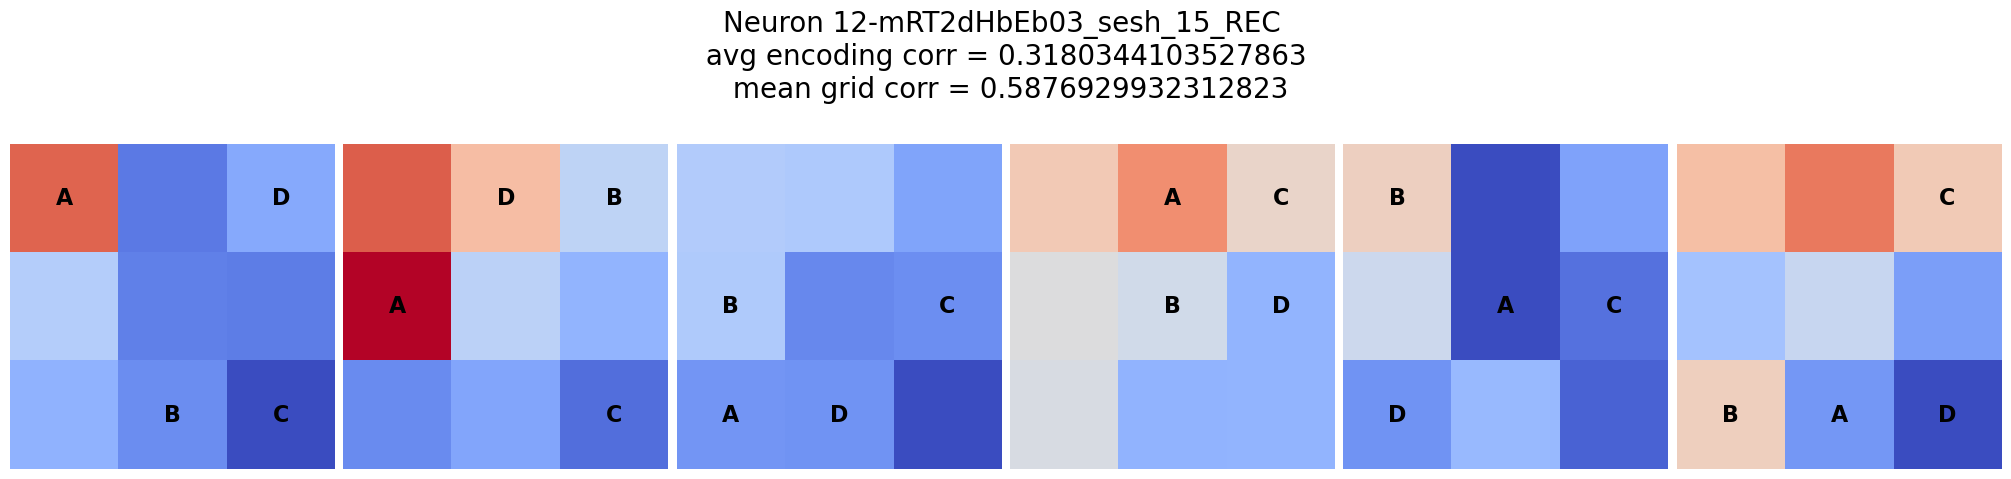

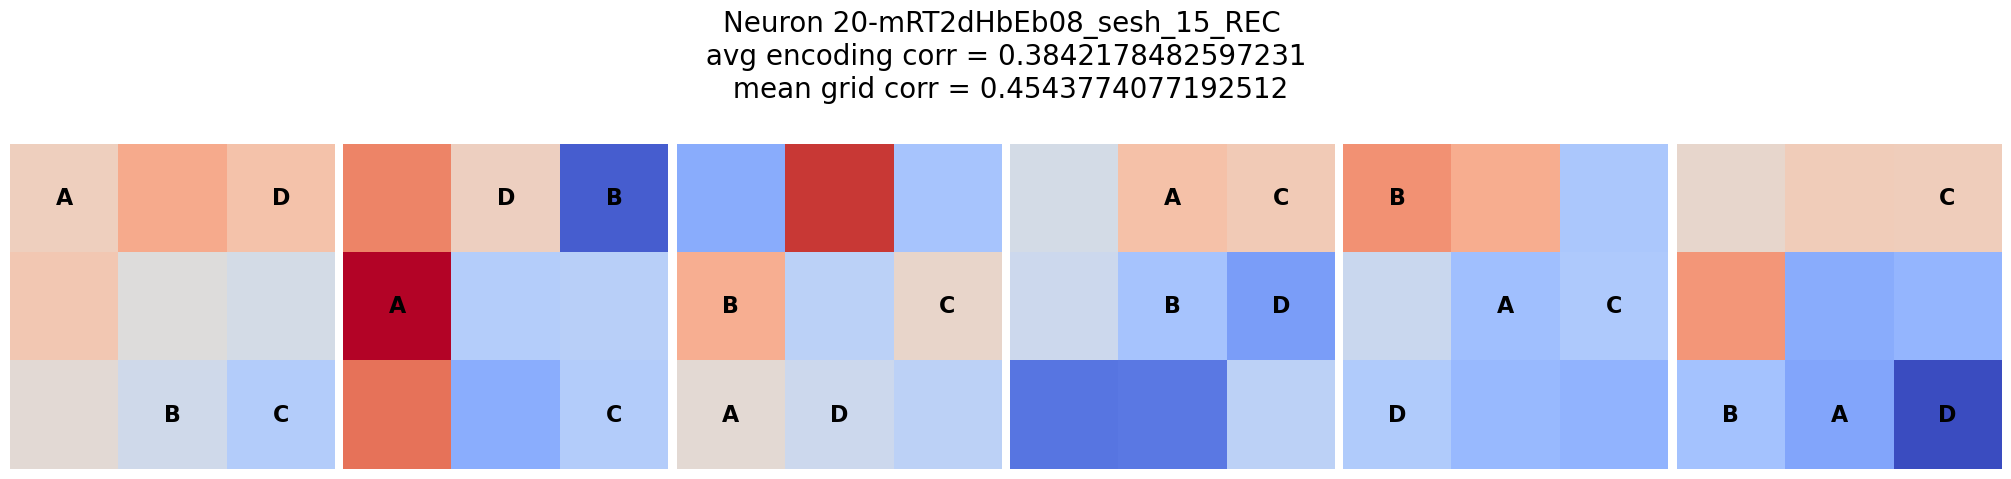

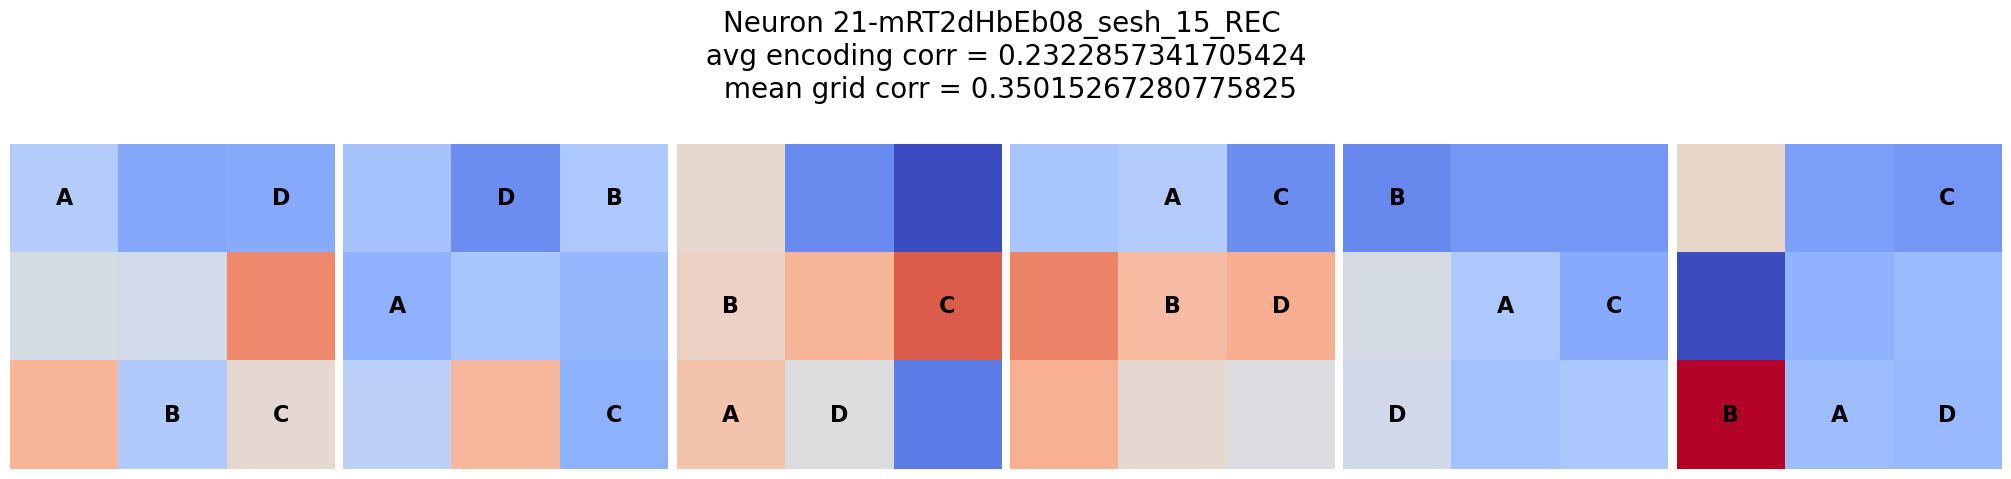

16
loading files for subject 16
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = 0.153
Neuron 1: Mean grid correlation = 0.026


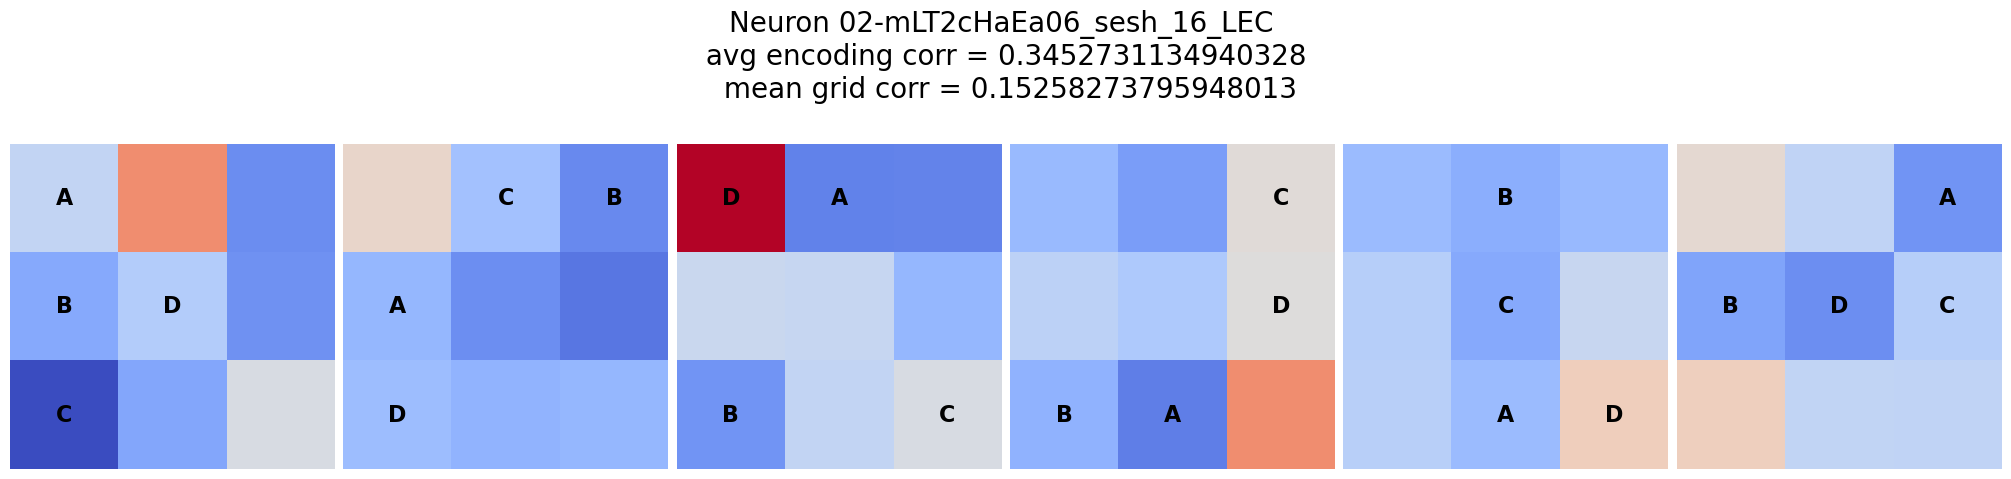

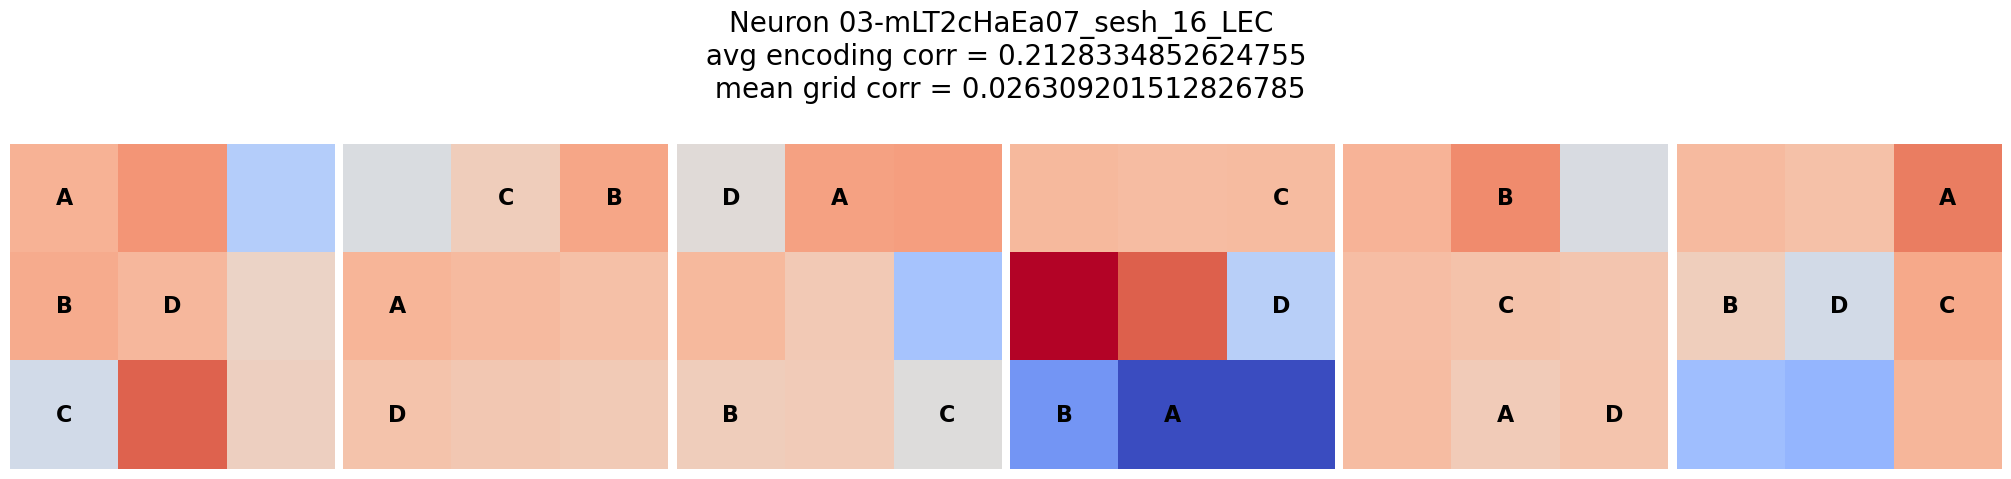

17
loading files for subject 17
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = 0.172


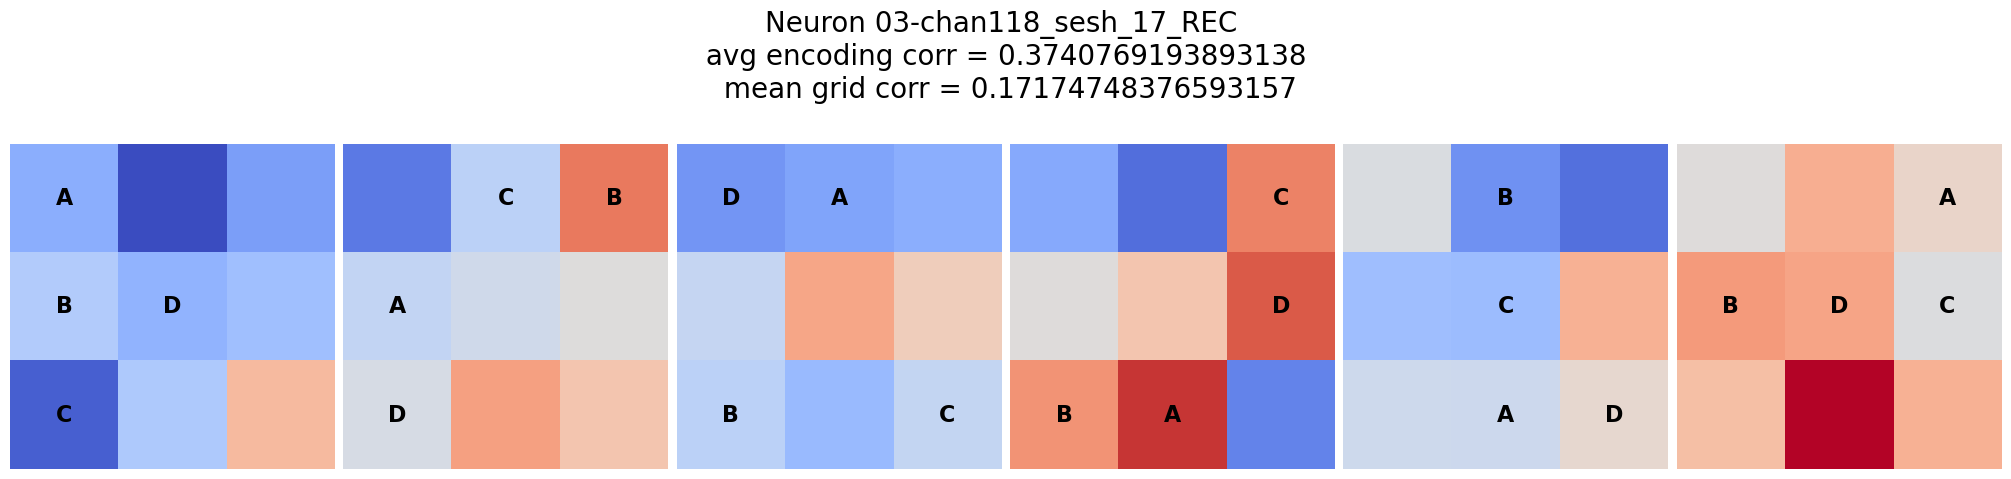

20
loading files for subject 20
unique grids are [[2. 5. 8. 1.]
 [2. 9. 7. 6.]
 [3. 8. 9. 6.]
 [7. 4. 8. 6.]
 [7. 6. 3. 4.]
 [9. 5. 1. 4.]]
Neuron 0: Mean grid correlation = 0.122
Neuron 1: Mean grid correlation = 0.133


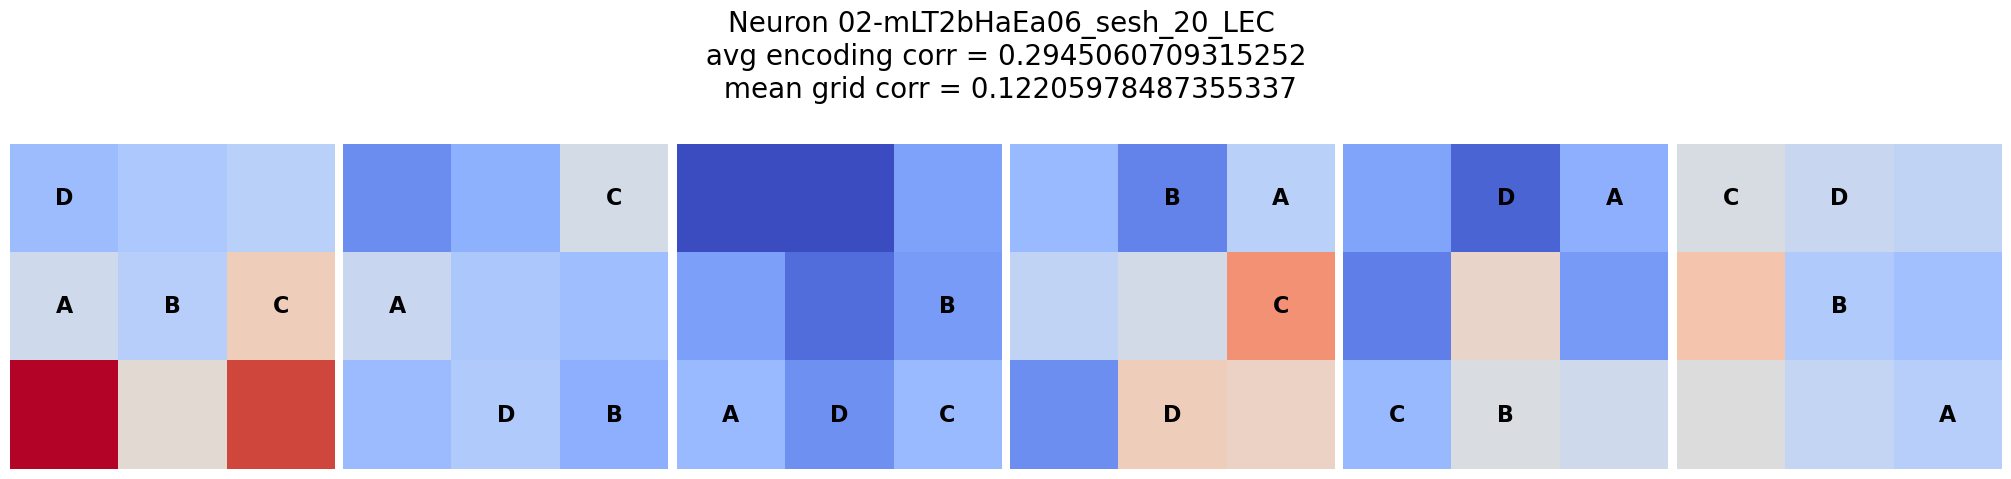

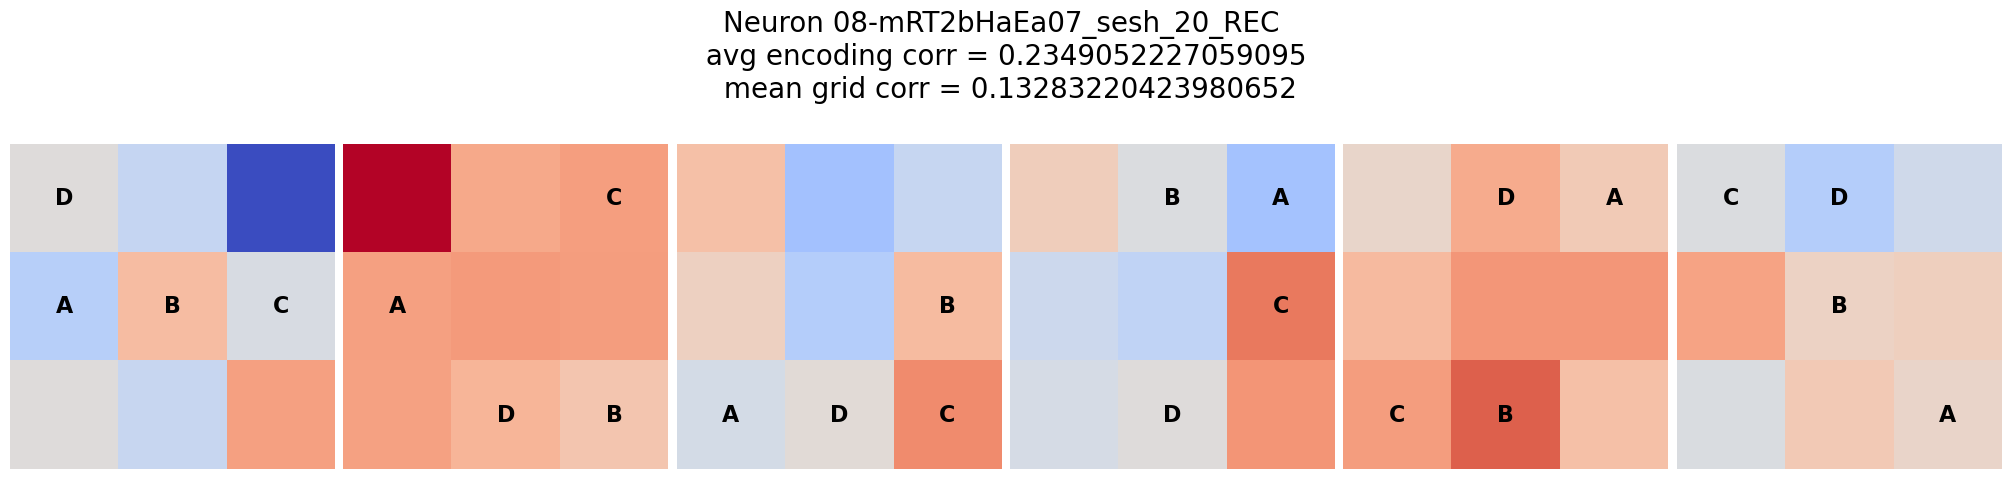

25
loading files for subject 25
unique grids are [[1. 2. 3. 5.]
 [2. 7. 4. 3.]
 [4. 3. 9. 1.]
 [6. 3. 7. 8.]
 [6. 4. 5. 9.]
 [7. 2. 8. 5.]]
Neuron 0: Mean grid correlation = -0.025
Neuron 1: Mean grid correlation = 0.120
Neuron 2: Mean grid correlation = 0.223


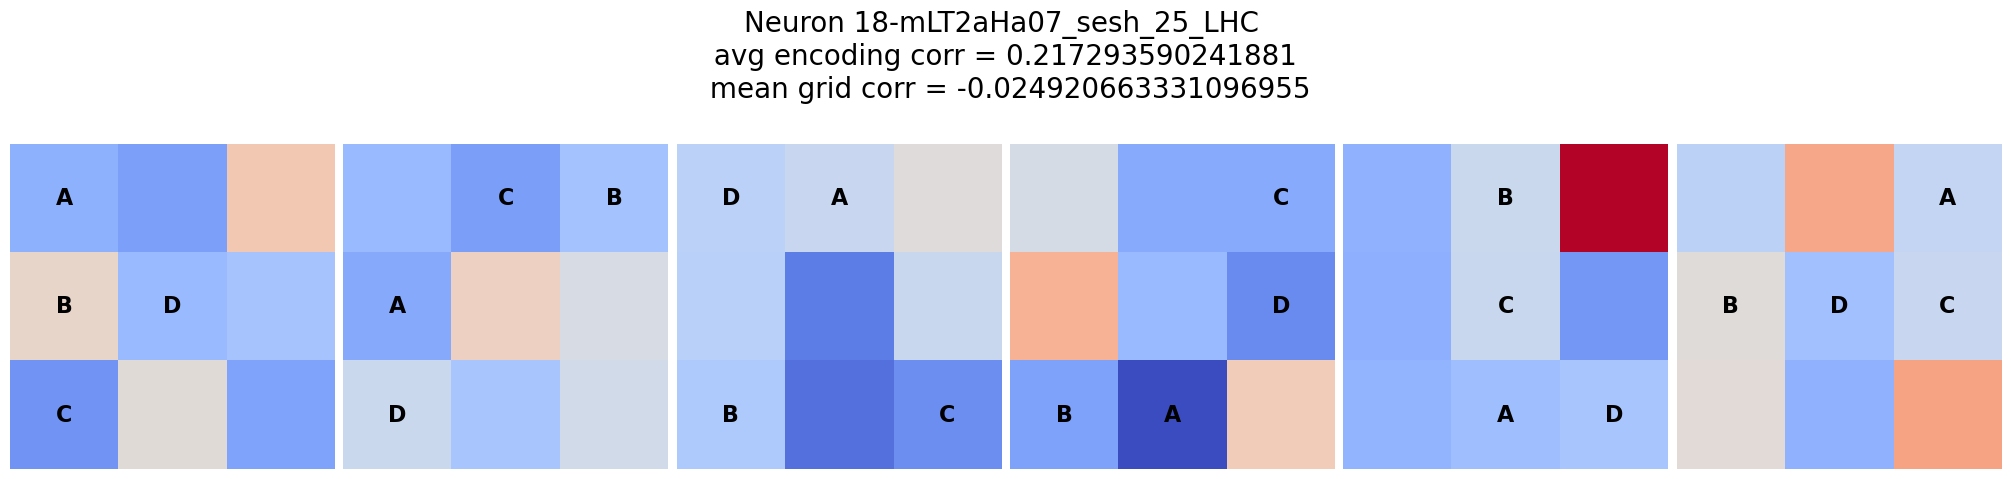

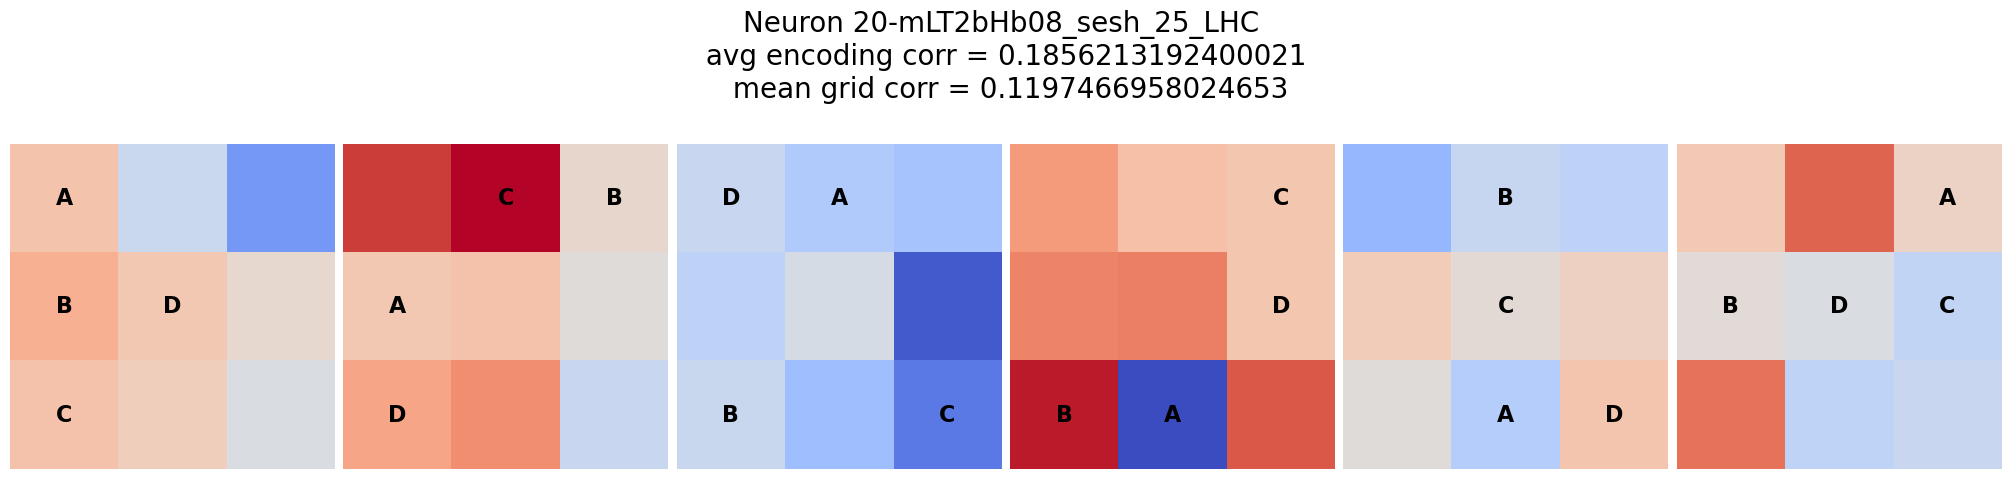

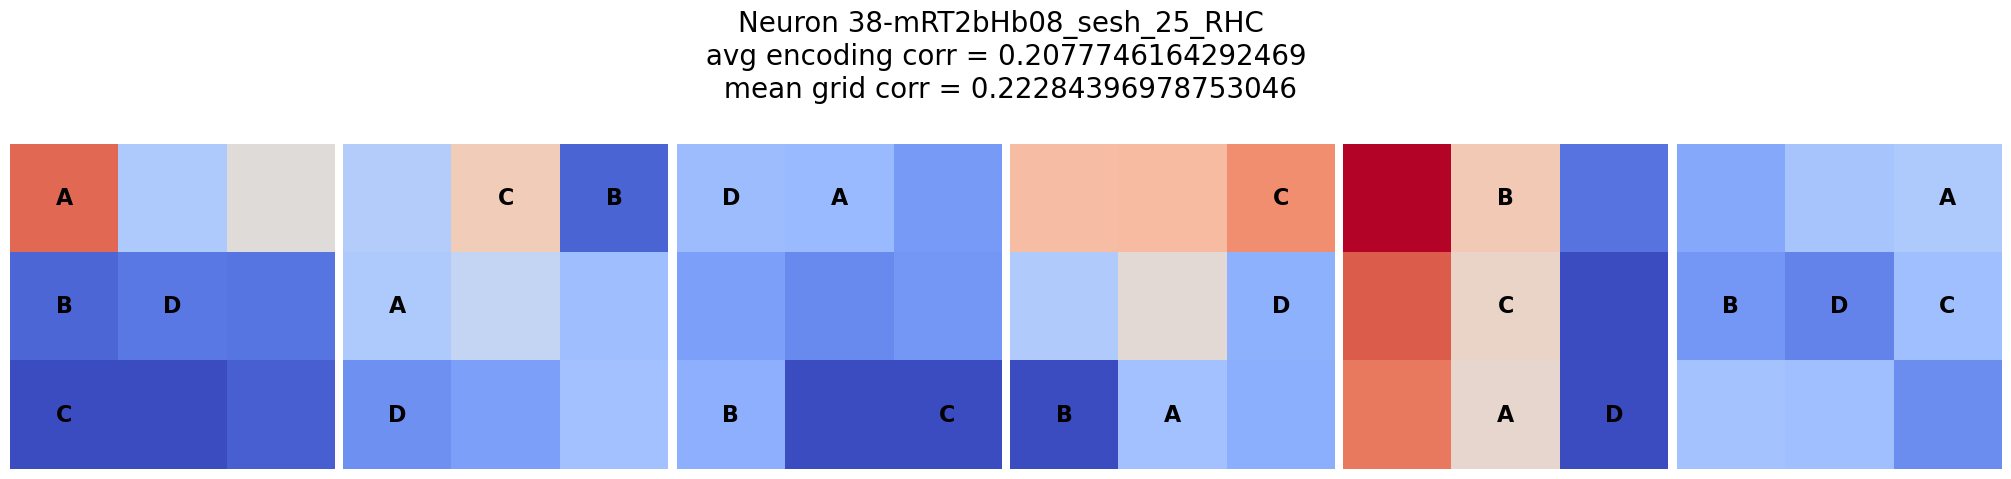

26
loading files for subject 26
unique grids are [[2. 6. 4. 9.]
 [3. 4. 8. 1.]
 [4. 2. 3. 7.]
 [6. 2. 5. 7.]
 [6. 2. 7. 8.]
 [9. 1. 8. 5.]
 [9. 3. 4. 1.]
 [9. 5. 3. 7.]]
Neuron 0: Mean grid correlation = 0.020


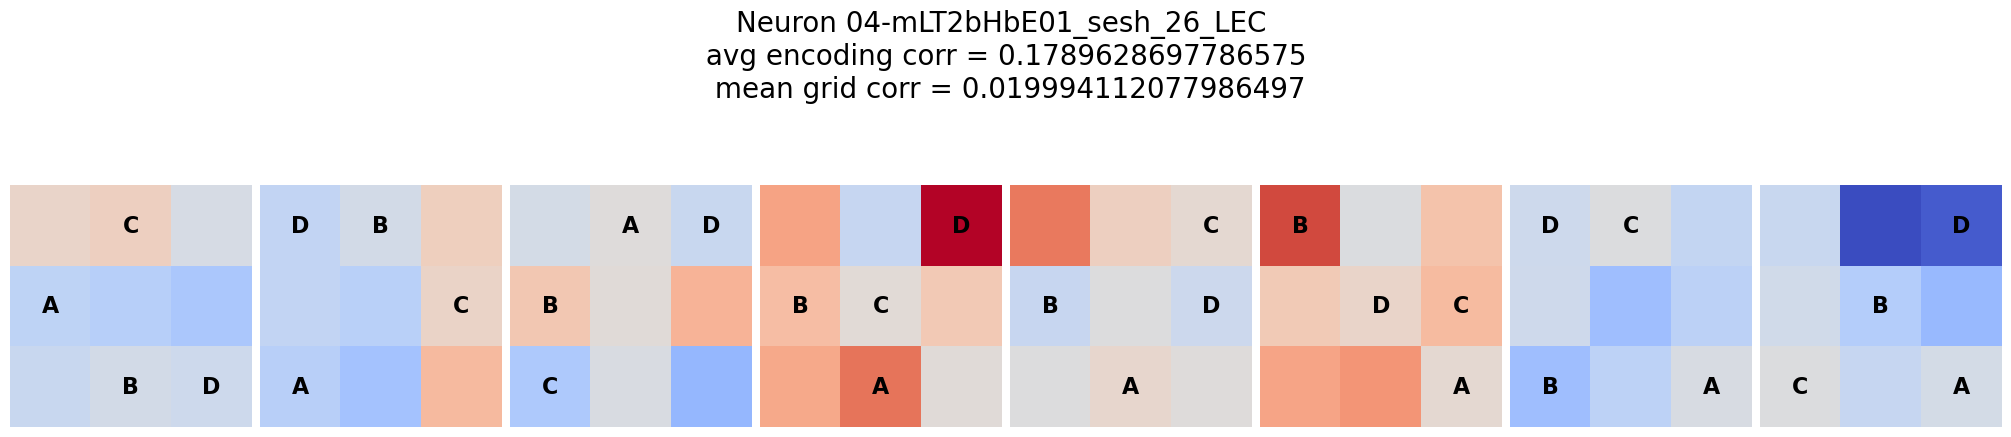

29
loading files for subject 29
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.110
Neuron 1: Mean grid correlation = 0.049


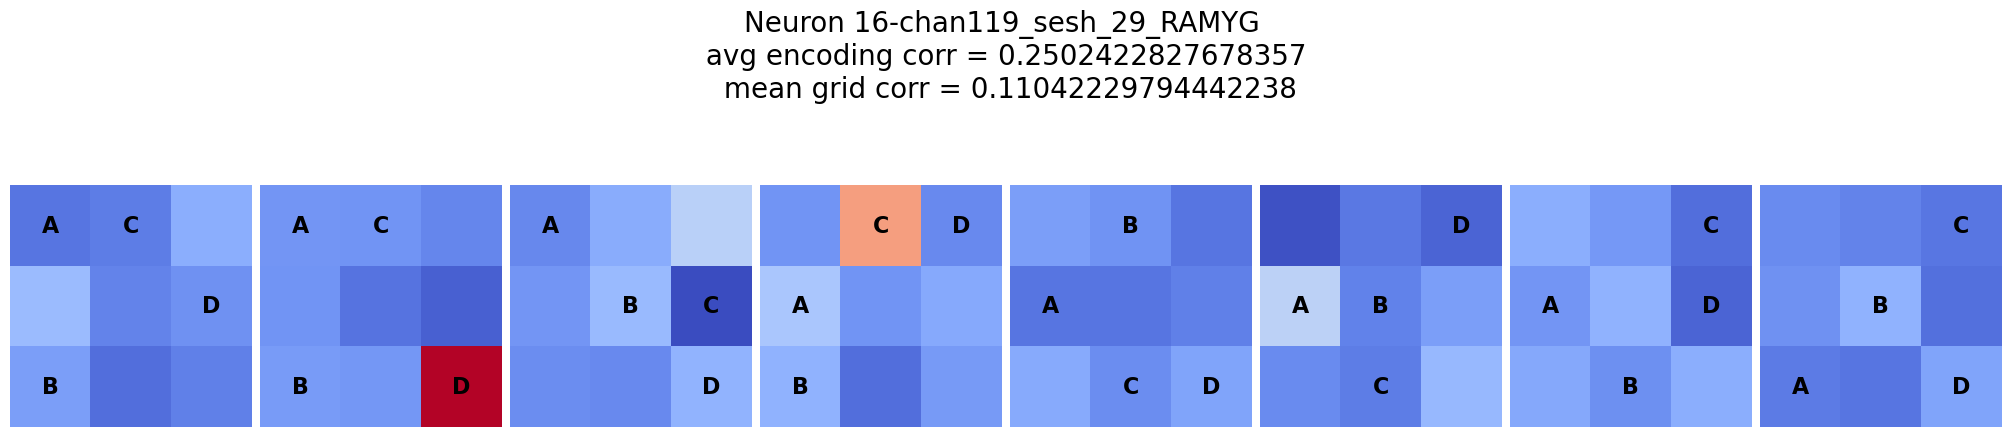

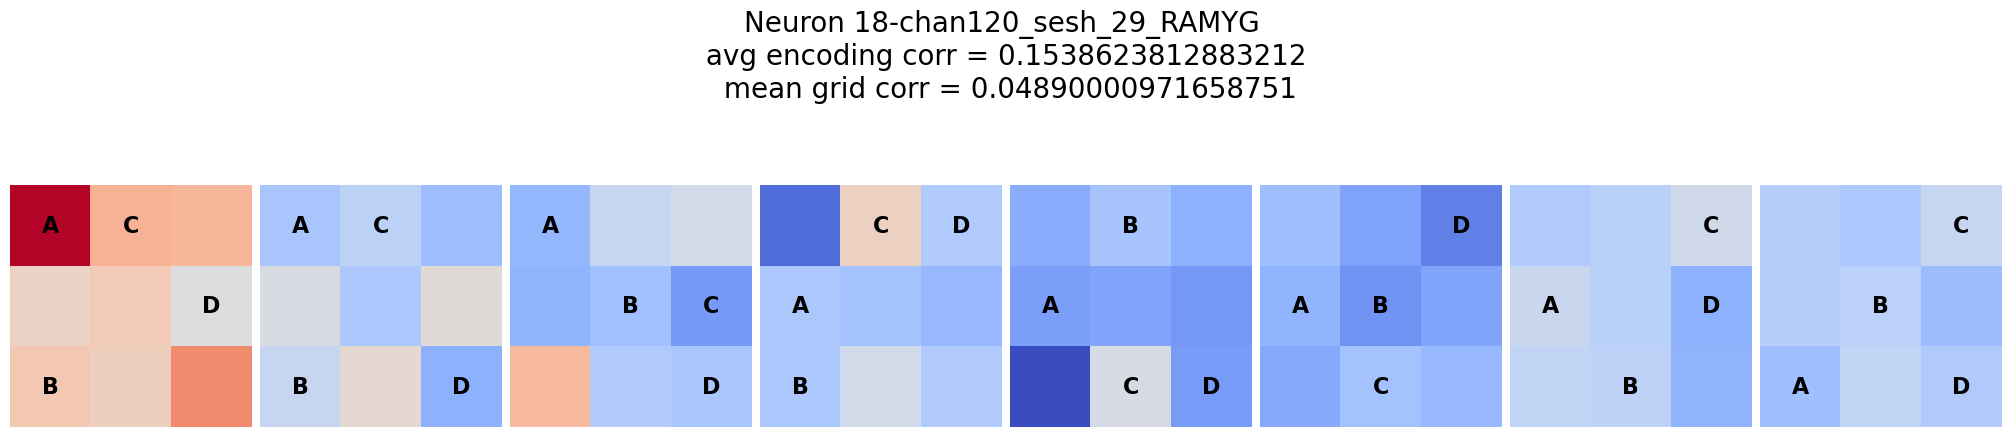

30
loading files for subject 30
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.017


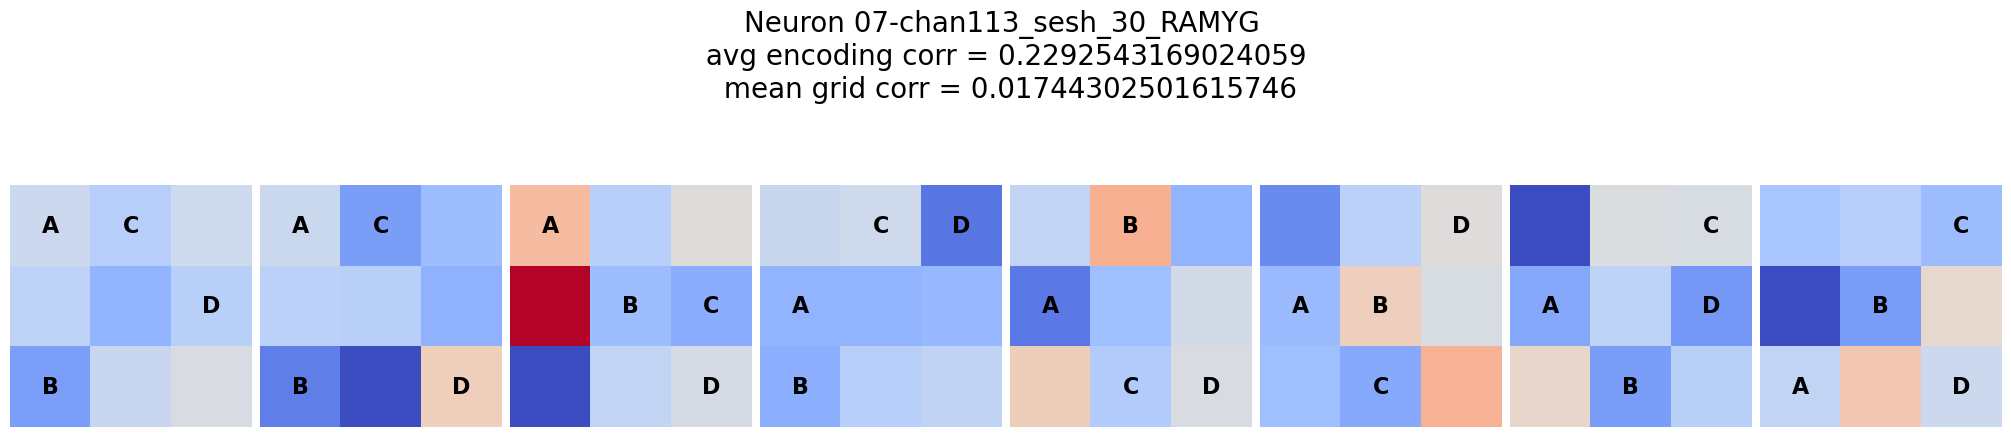

31
loading files for subject 31
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.320
Neuron 1: Mean grid correlation = -0.073
Neuron 2: Mean grid correlation = 0.027


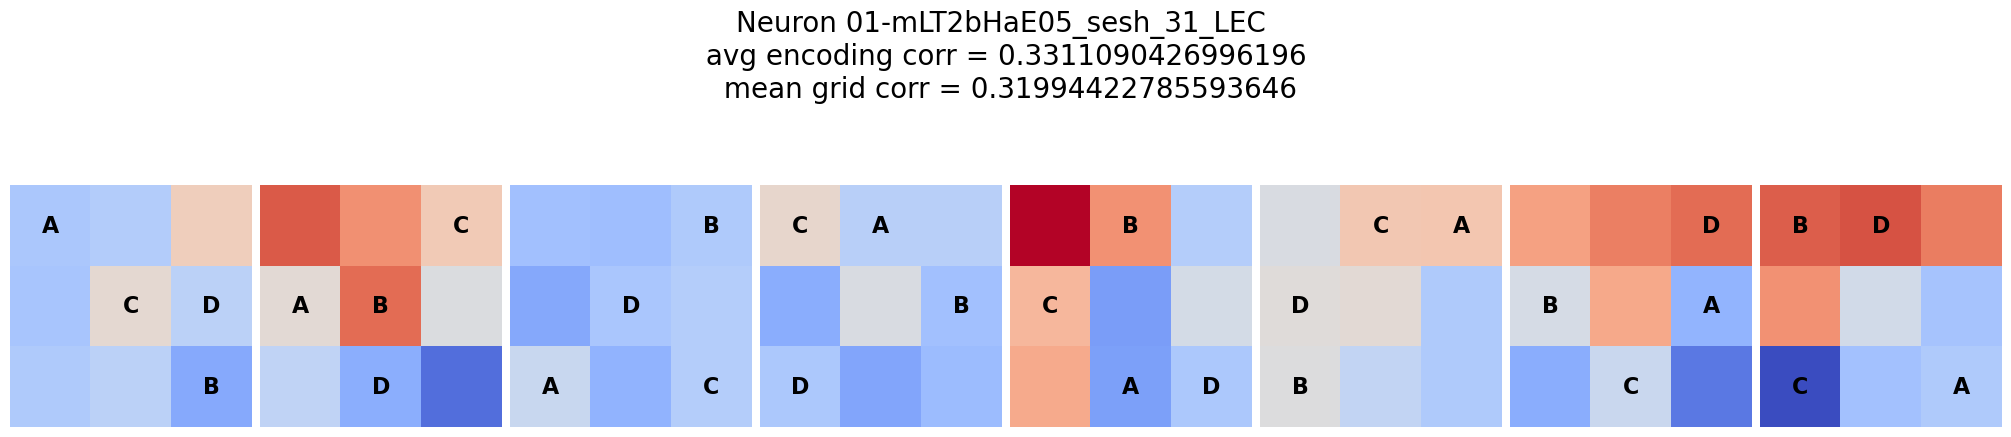

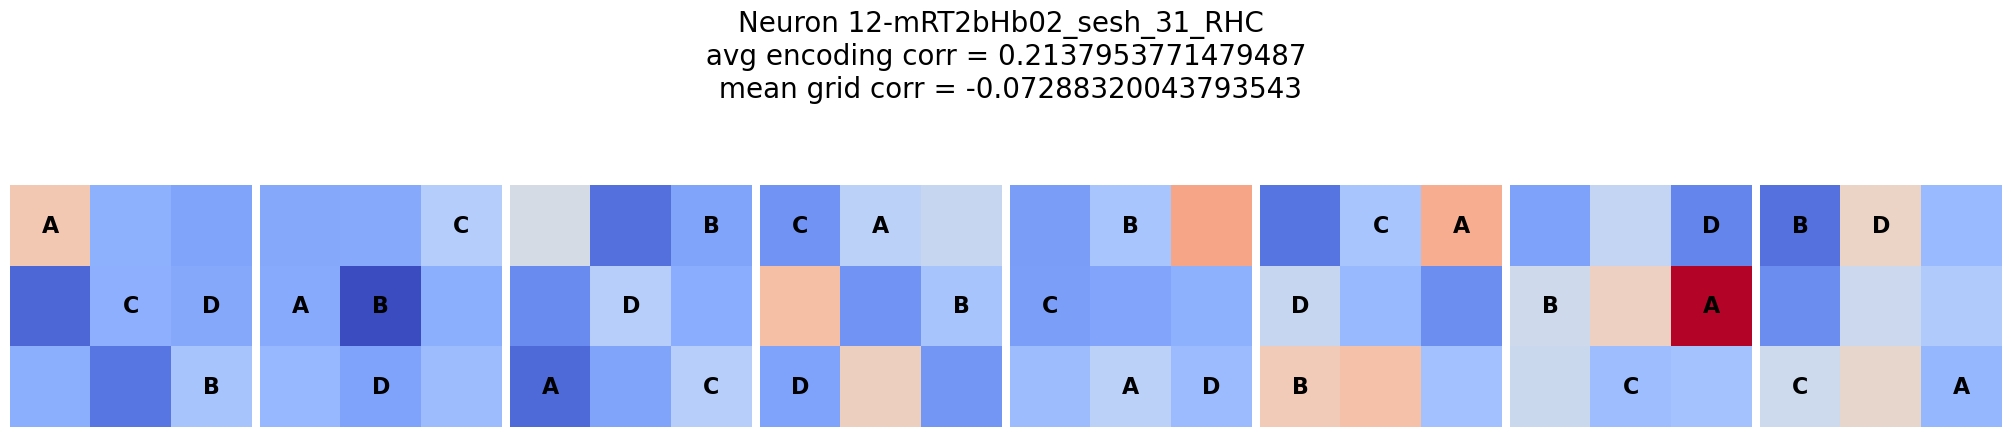

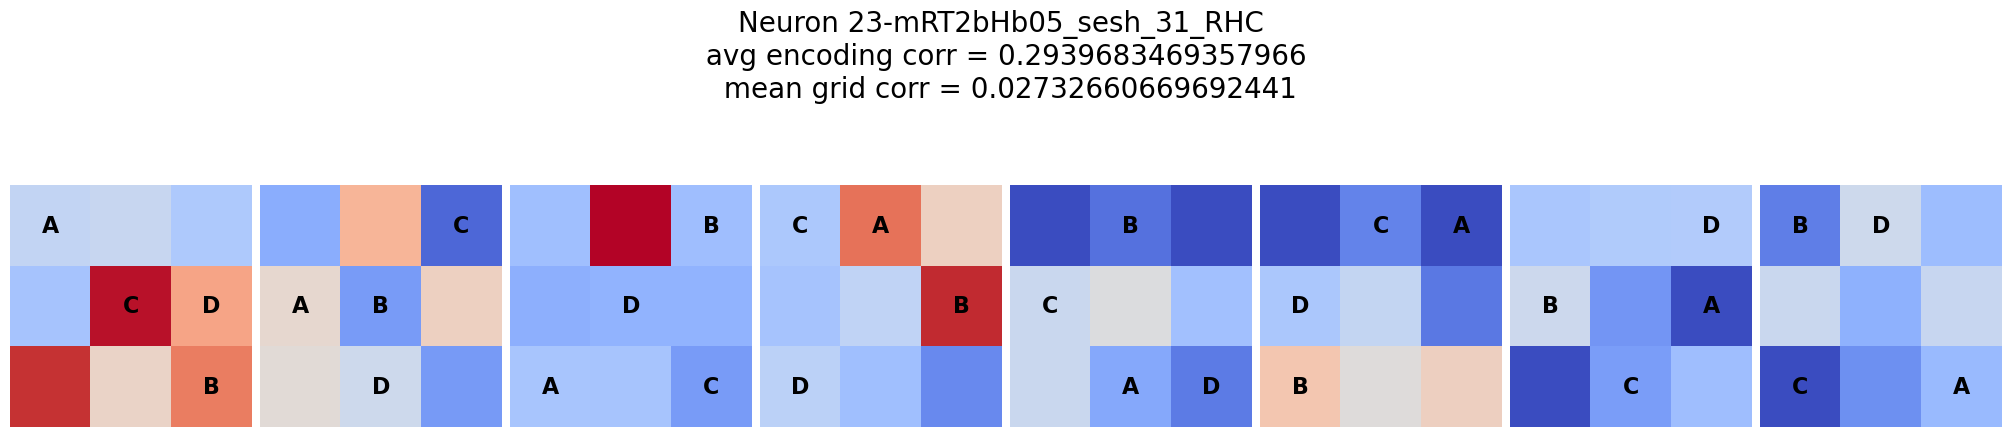

34
loading files for subject 34
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.395


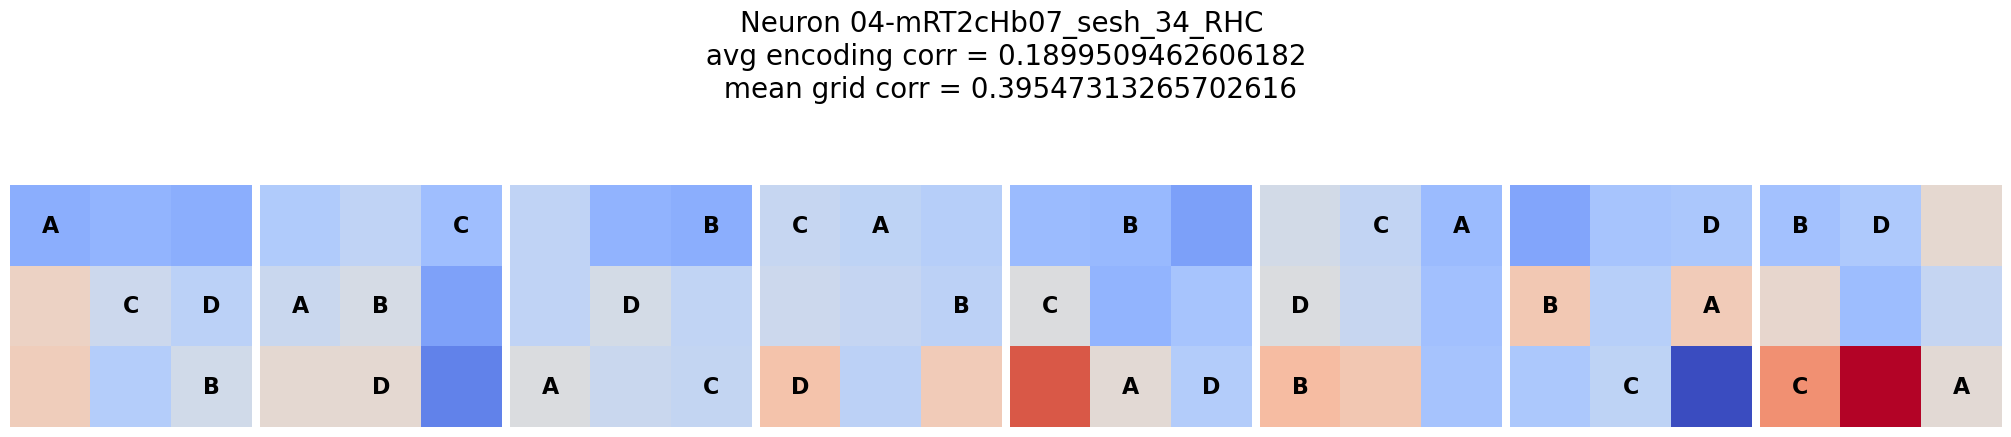

37
loading files for subject 37
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.050


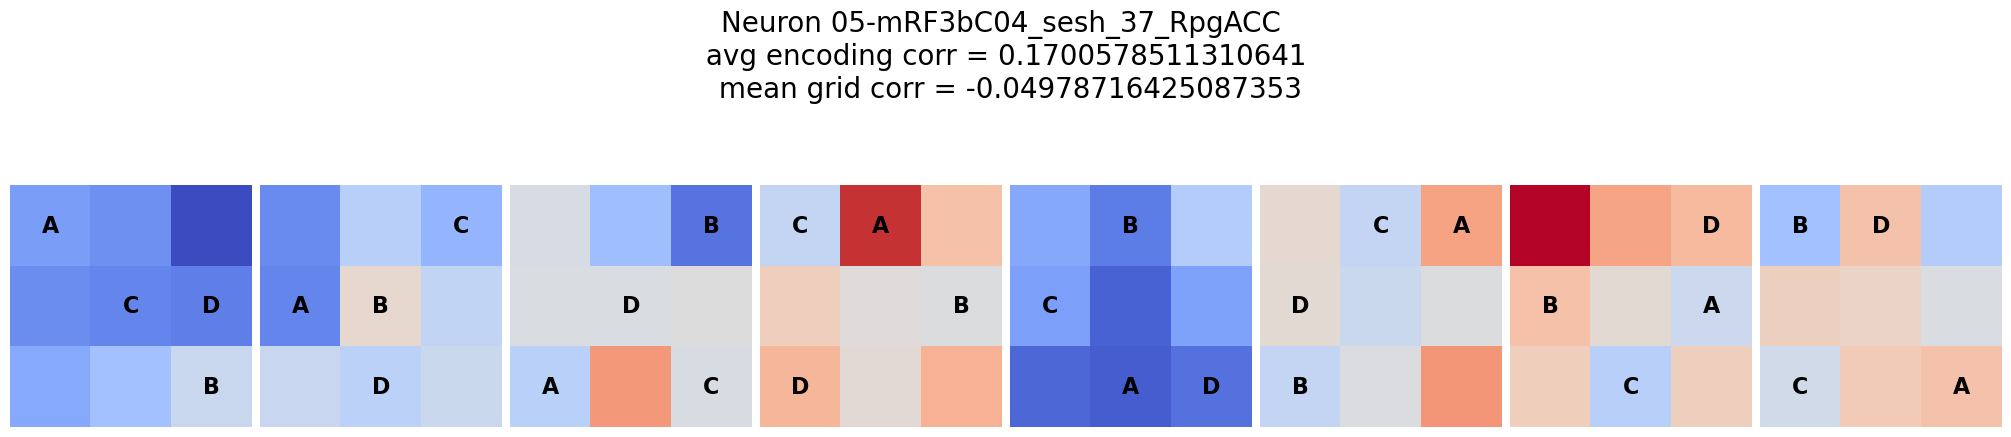

39
loading files for subject 39
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.018


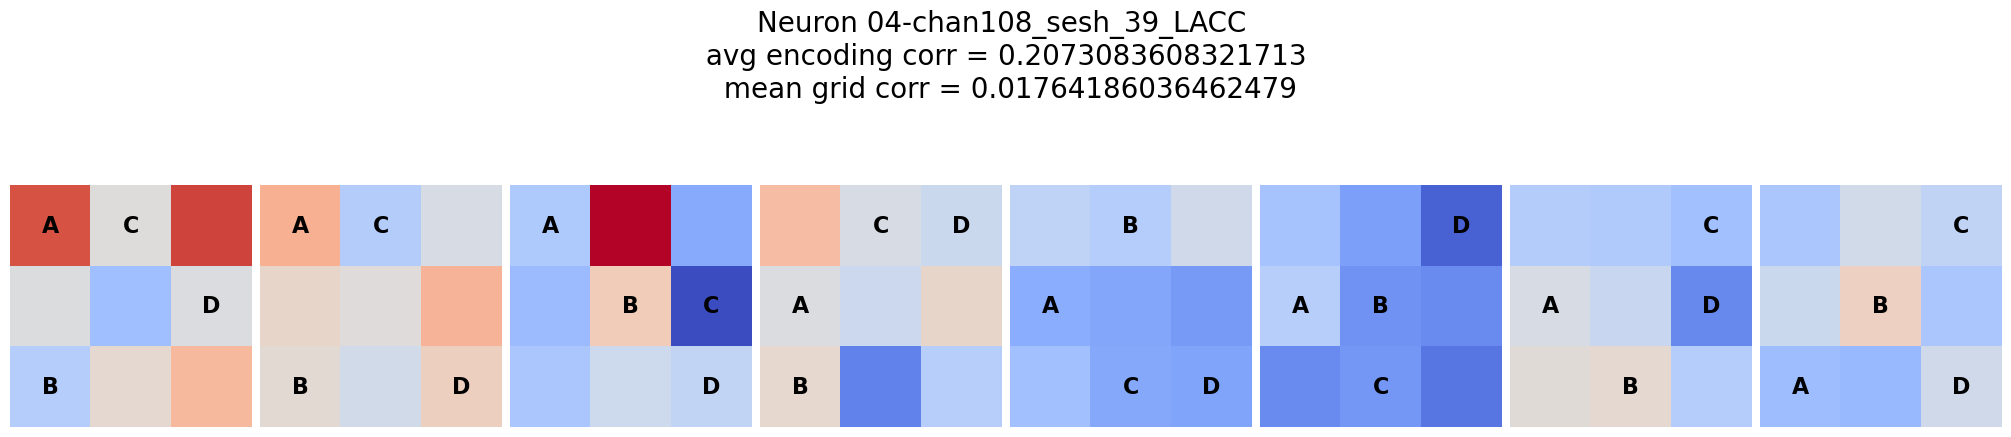

40
loading files for subject 40
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.023
Neuron 1: Mean grid correlation = 0.089


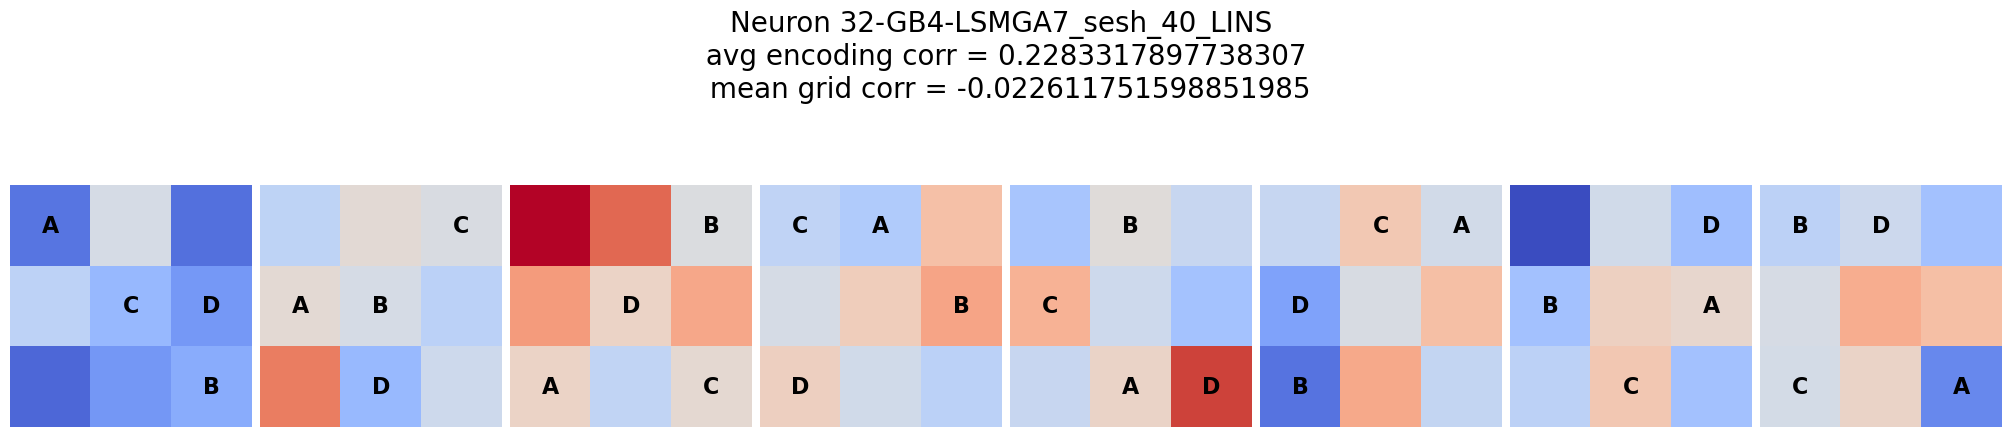

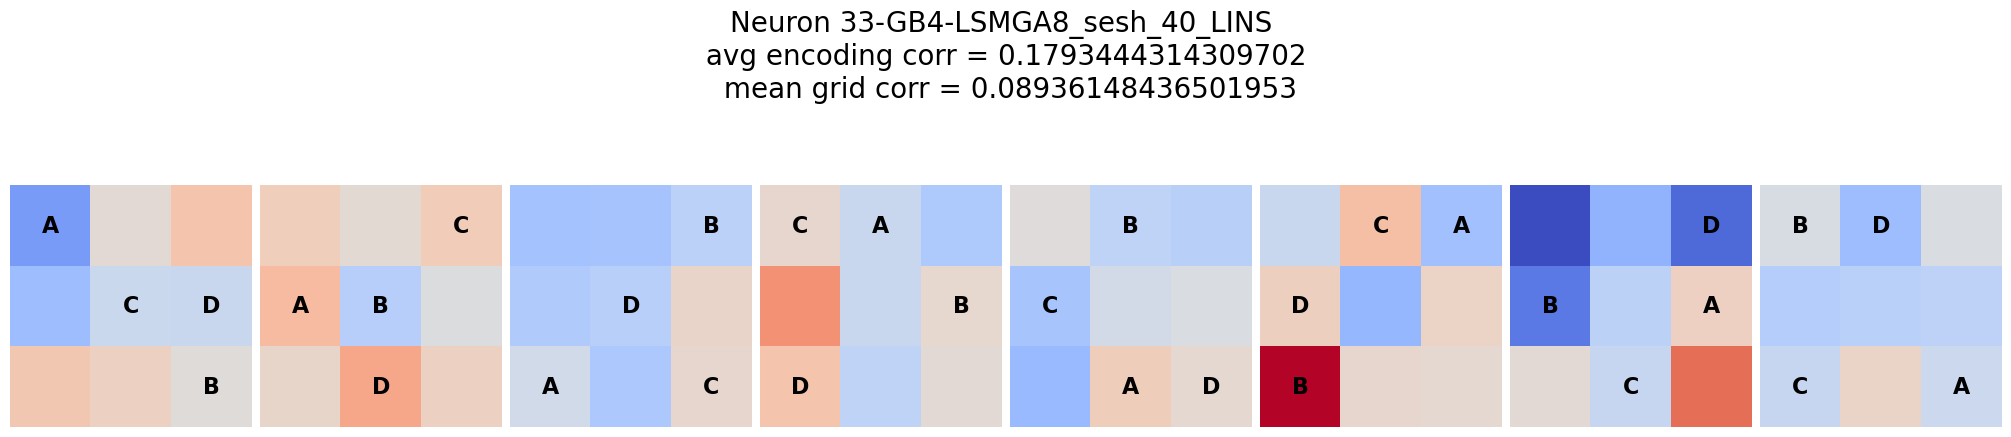

41
loading files for subject 41
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = 0.509


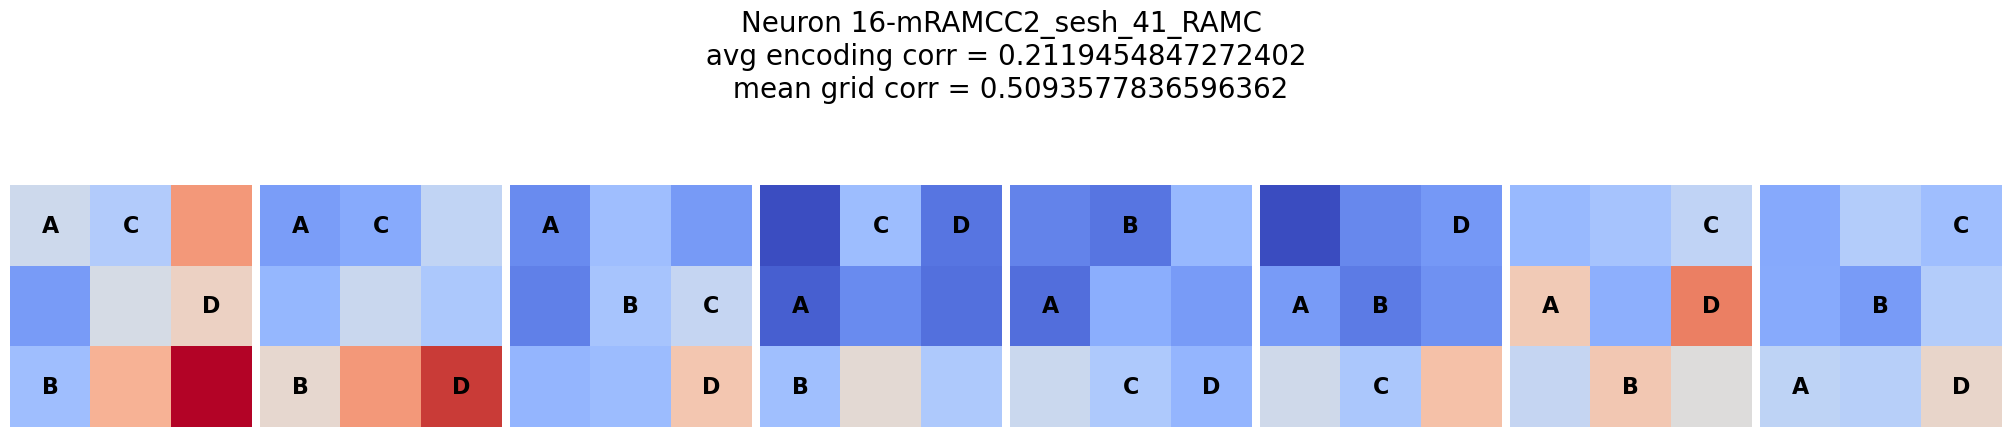

43
loading files for subject 43
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.081


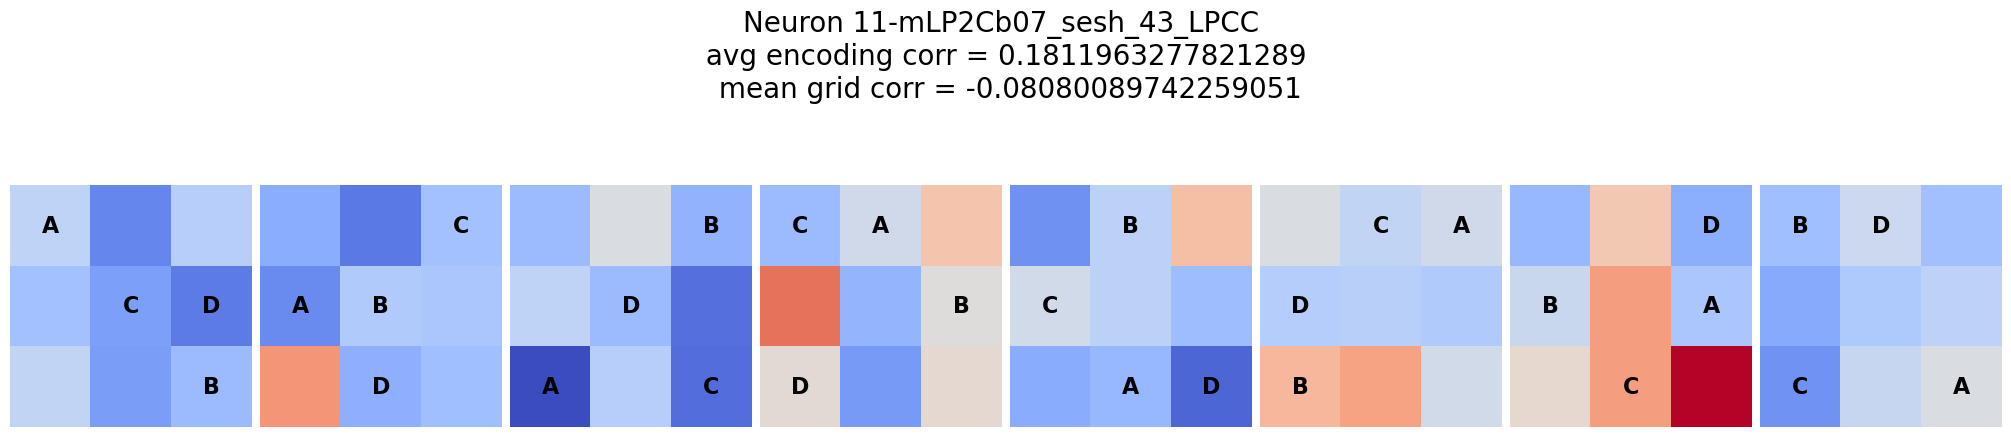

46
loading files for subject 46
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.044


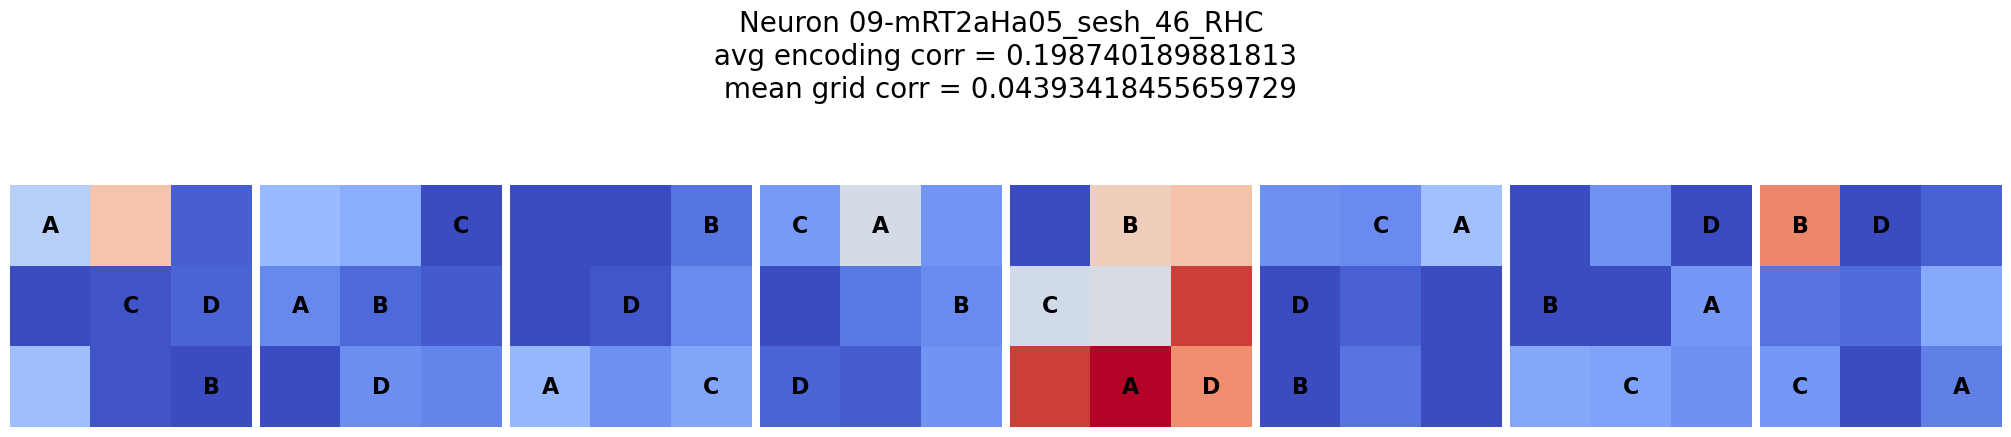

48
loading files for subject 48
unique grids are [[1. 7. 6. 9.]
 [2. 3. 7. 9.]
 [2. 5. 6. 4.]
 [5. 8. 4. 1.]
 [5. 9. 2. 7.]
 [9. 3. 8. 6.]]
Neuron 0: Mean grid correlation = -0.061


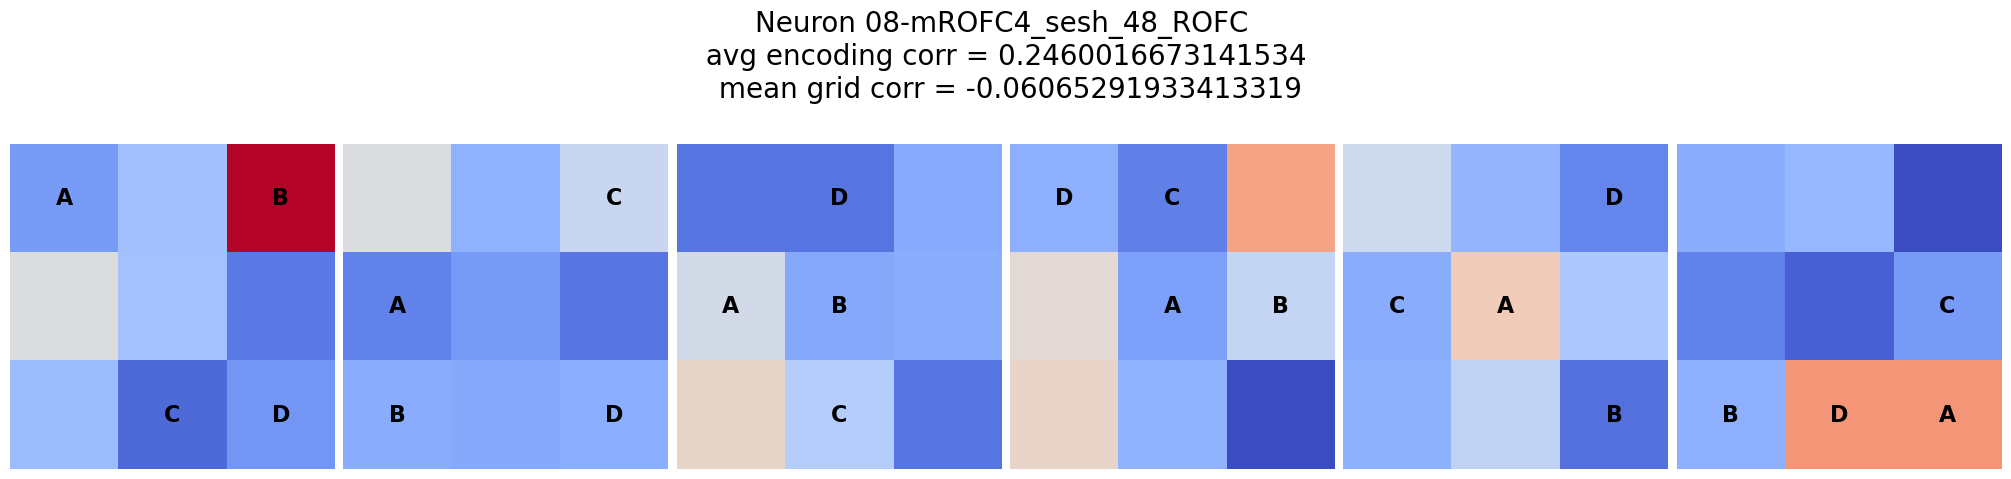

51
loading files for subject 51
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.150


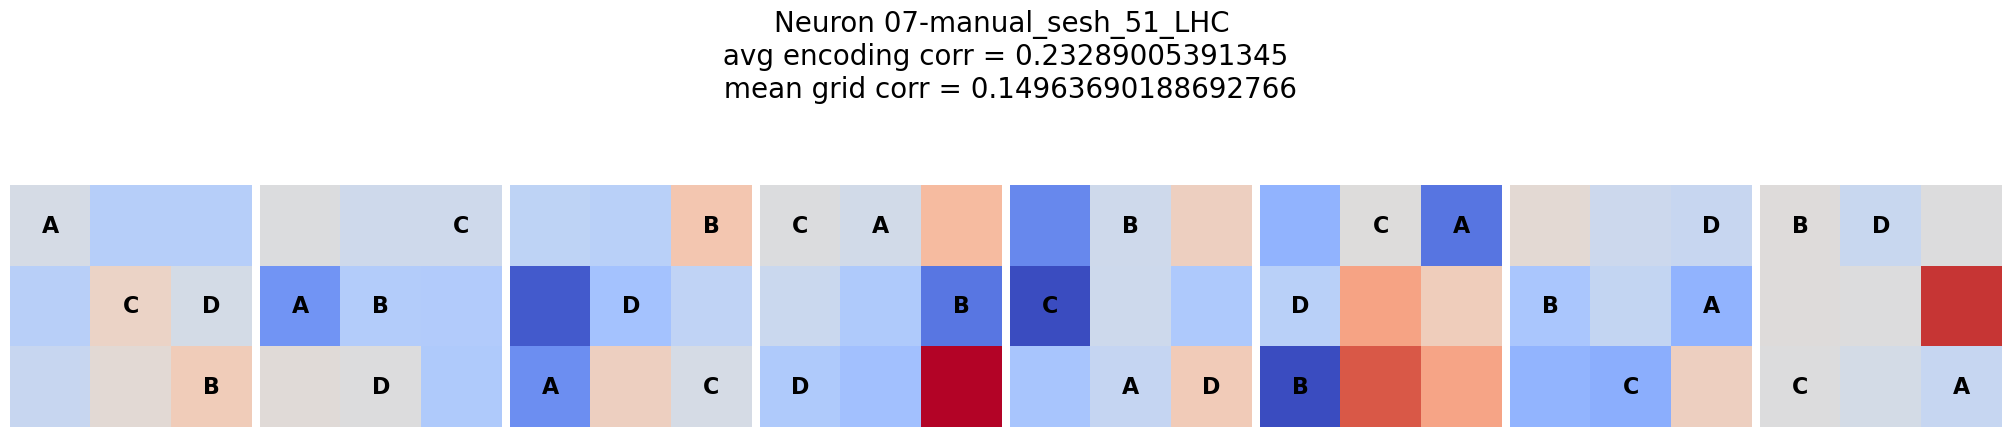

52
loading files for subject 52
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = -0.001


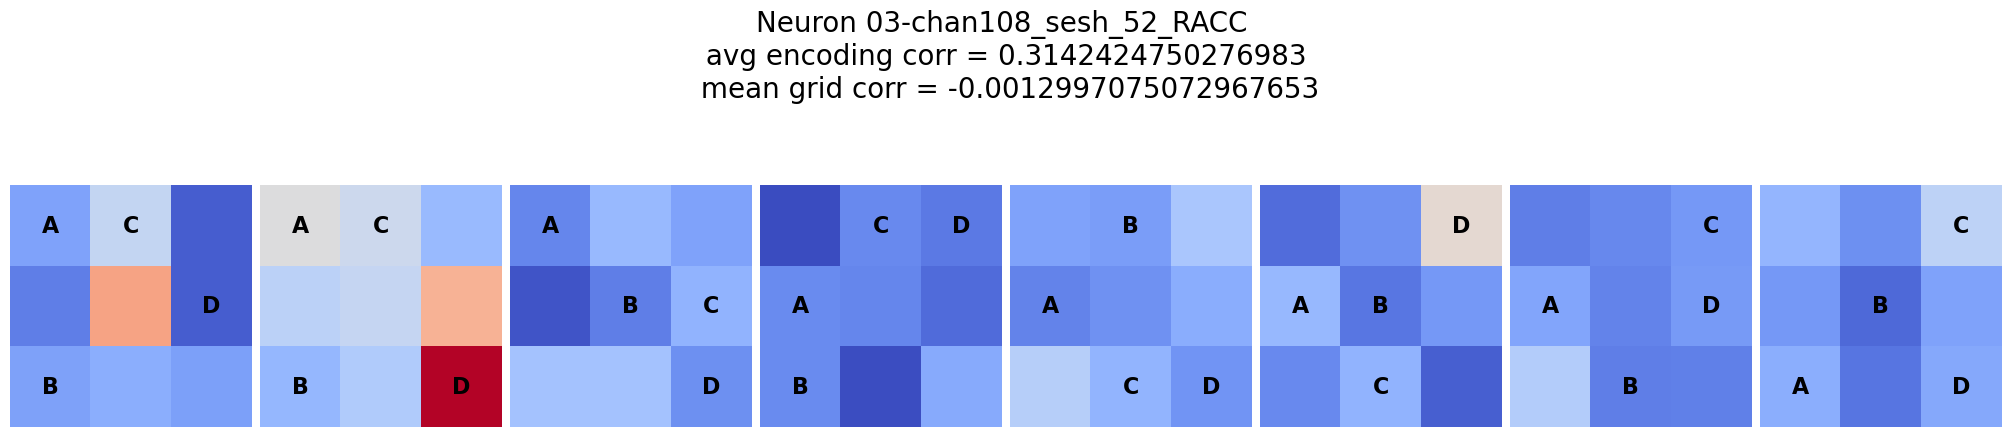

54
loading files for subject 54
unique grids are [[1. 3. 4. 8.]
 [1. 3. 4. 9.]
 [1. 5. 8. 9.]
 [2. 3. 4. 7.]
 [2. 4. 6. 9.]
 [2. 5. 6. 7.]
 [2. 6. 7. 8.]
 [3. 5. 7. 9.]]
Neuron 0: Mean grid correlation = -0.030


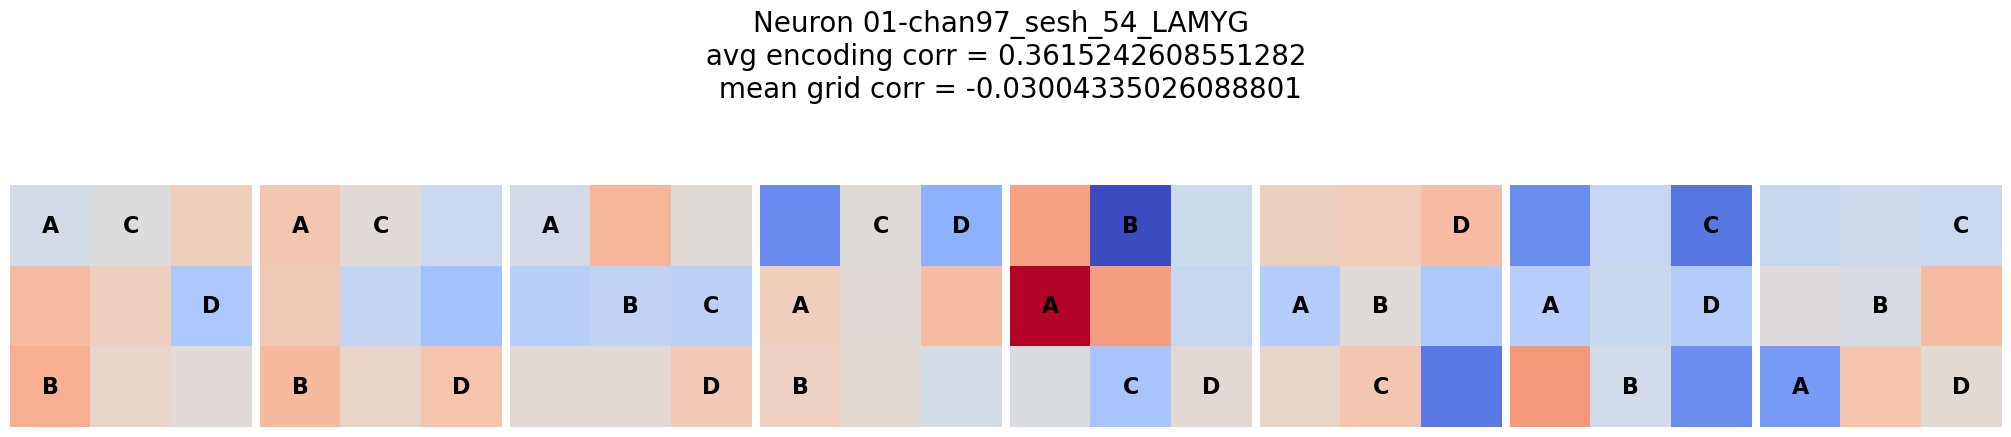

56
loading files for subject 56
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.089


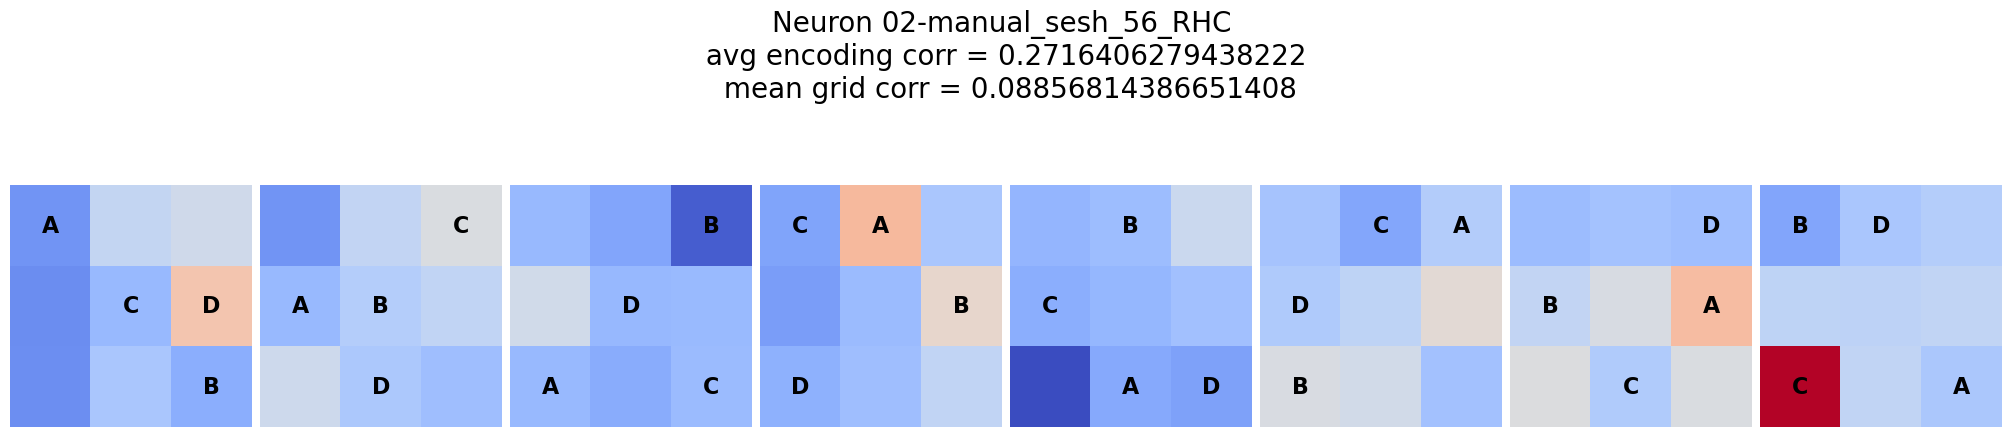

57
loading files for subject 57
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.014


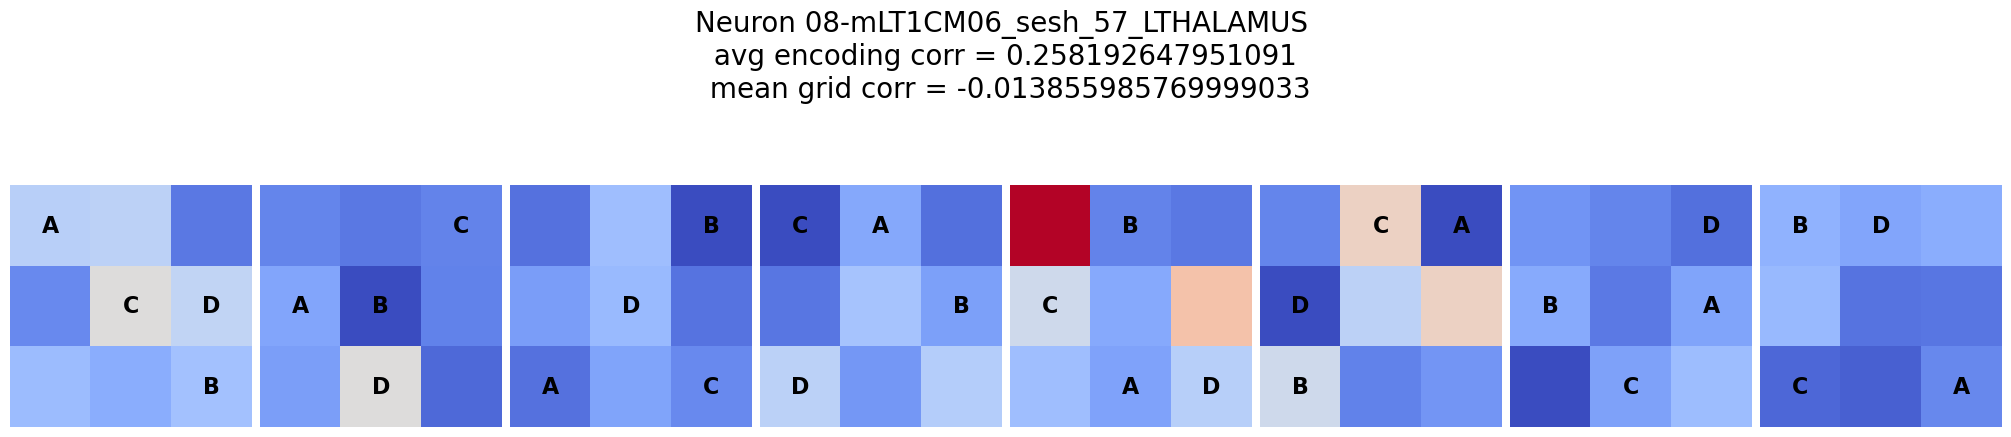

58
loading files for subject 58
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = 0.403
Neuron 1: Mean grid correlation = 0.224
Neuron 2: Mean grid correlation = 0.151


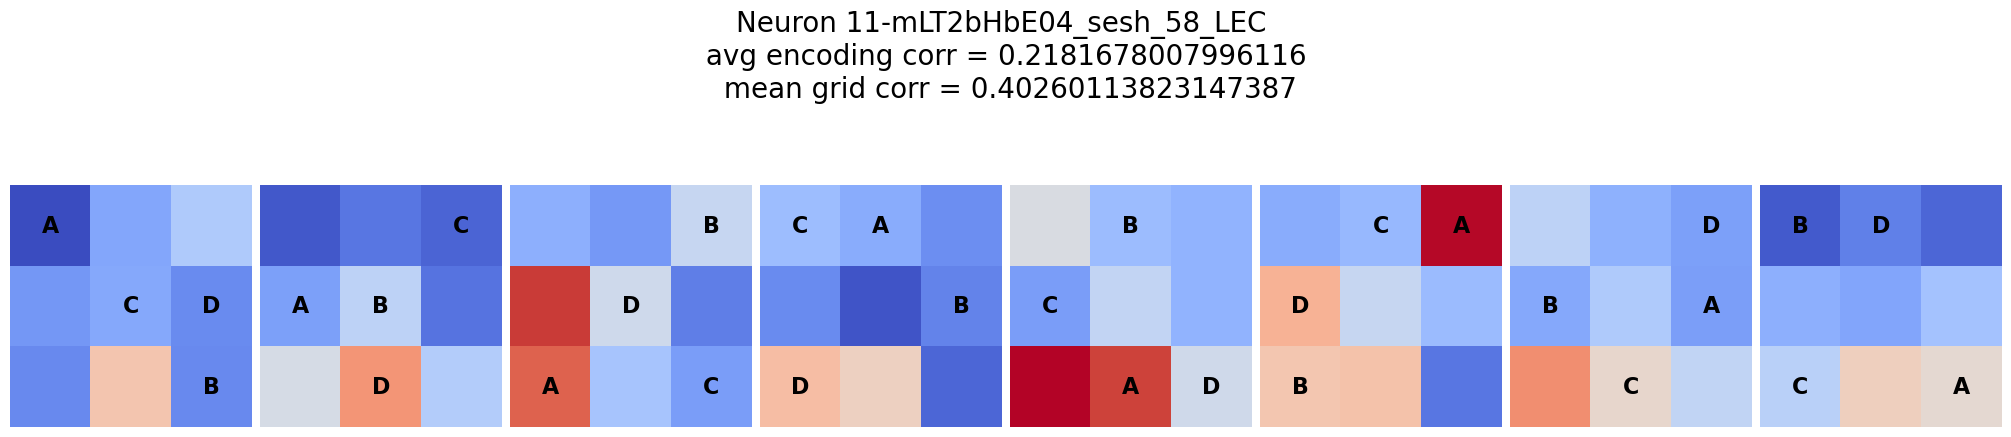

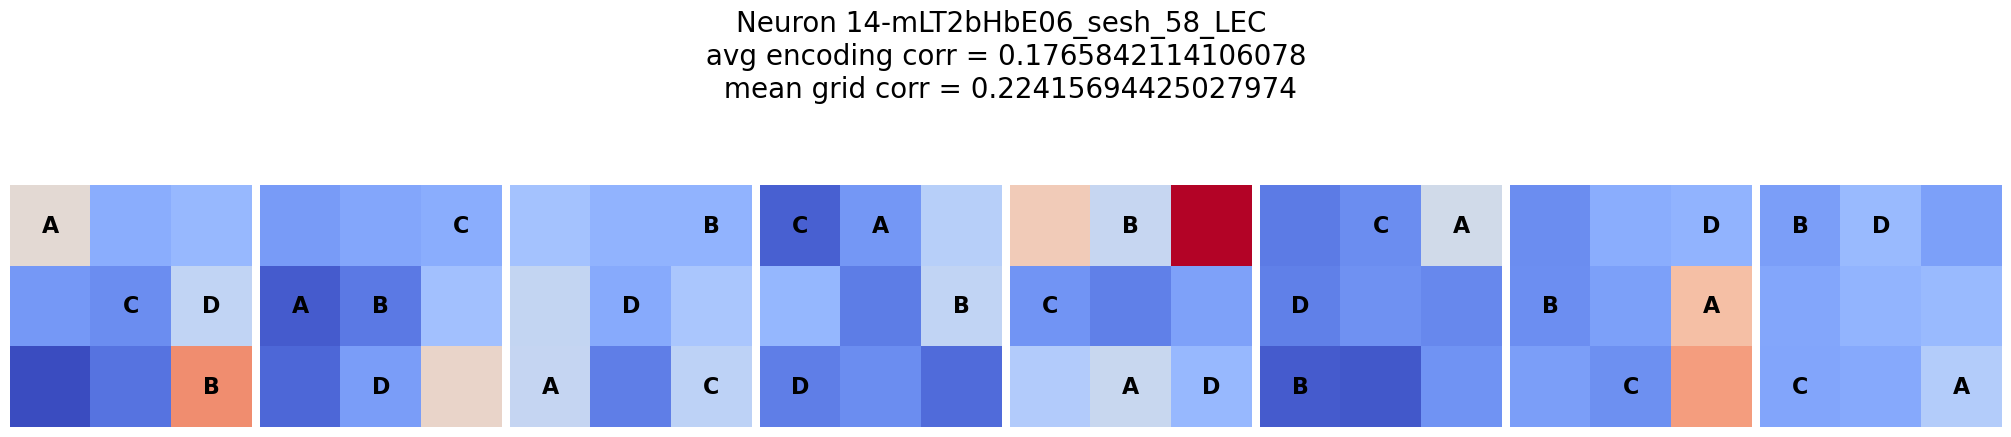

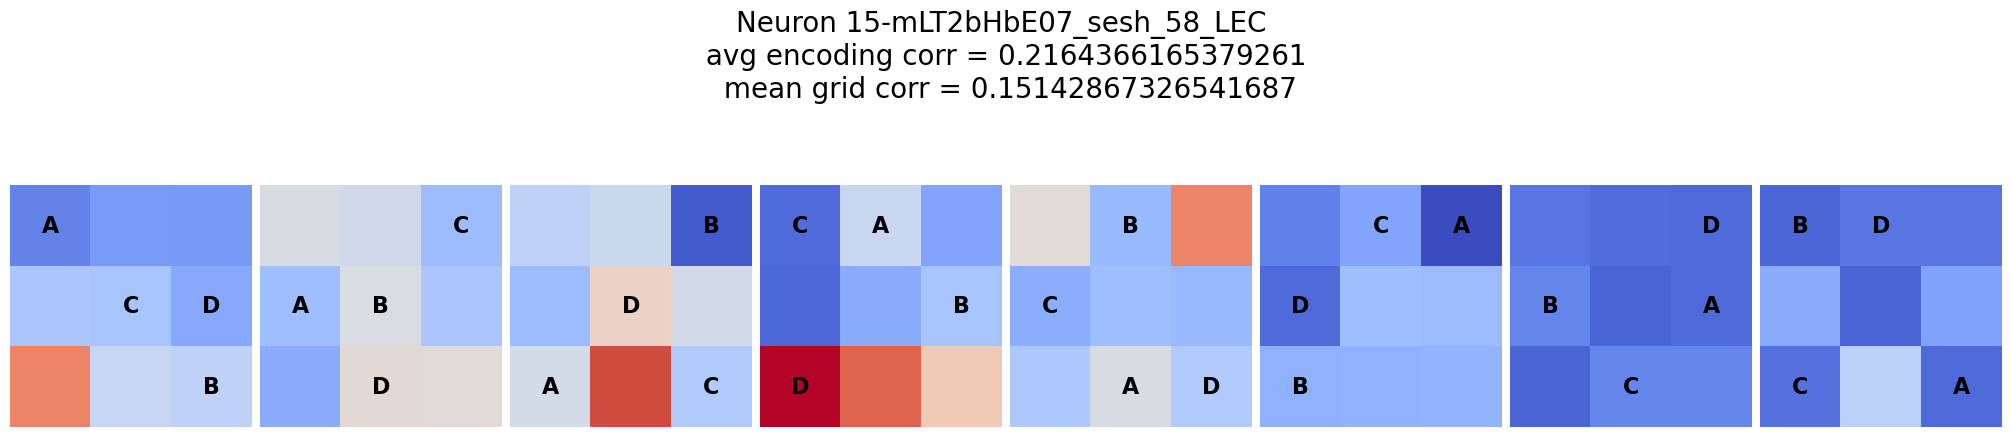

59
loading files for subject 59
unique grids are [[1. 9. 5. 8.]
 [2. 5. 7. 6.]
 [3. 7. 9. 5.]
 [4. 8. 1. 3.]
 [6. 4. 2. 9.]
 [7. 3. 4. 2.]
 [8. 2. 6. 7.]
 [9. 1. 3. 4.]]
Neuron 0: Mean grid correlation = -0.101
Neuron 1: Mean grid correlation = 0.005
Neuron 2: Mean grid correlation = 0.296
Neuron 3: Mean grid correlation = 0.053
Neuron 4: Mean grid correlation = 0.080


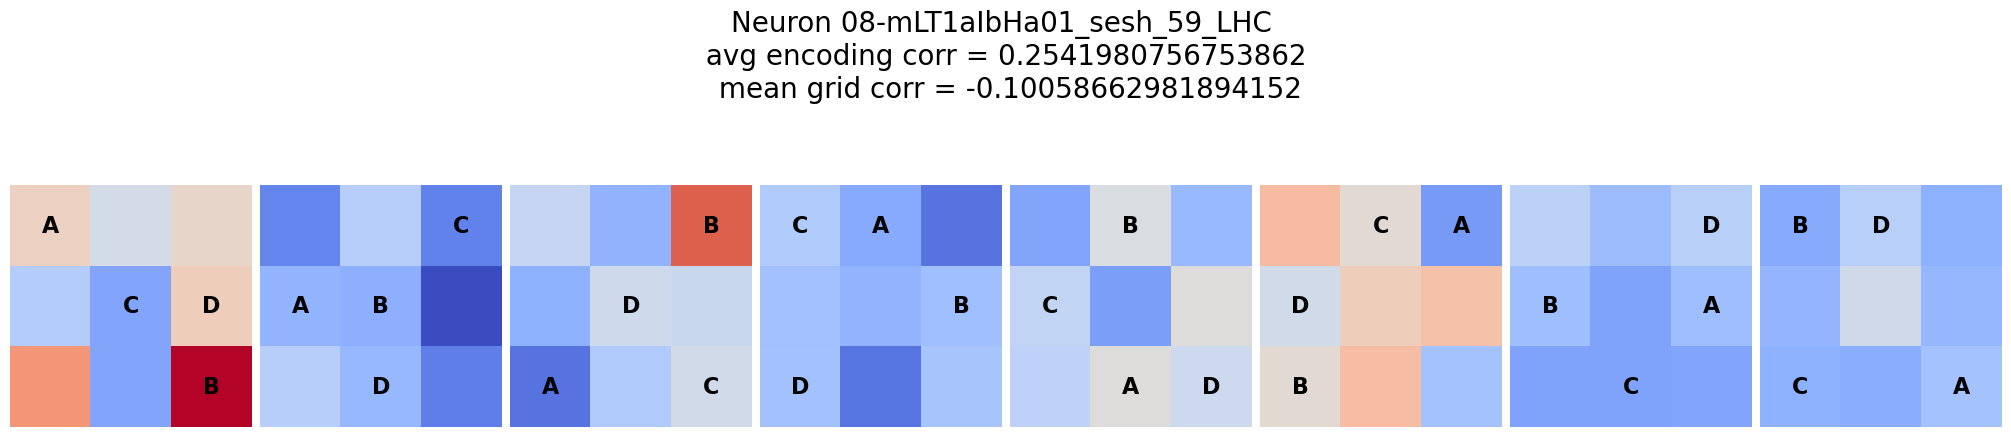

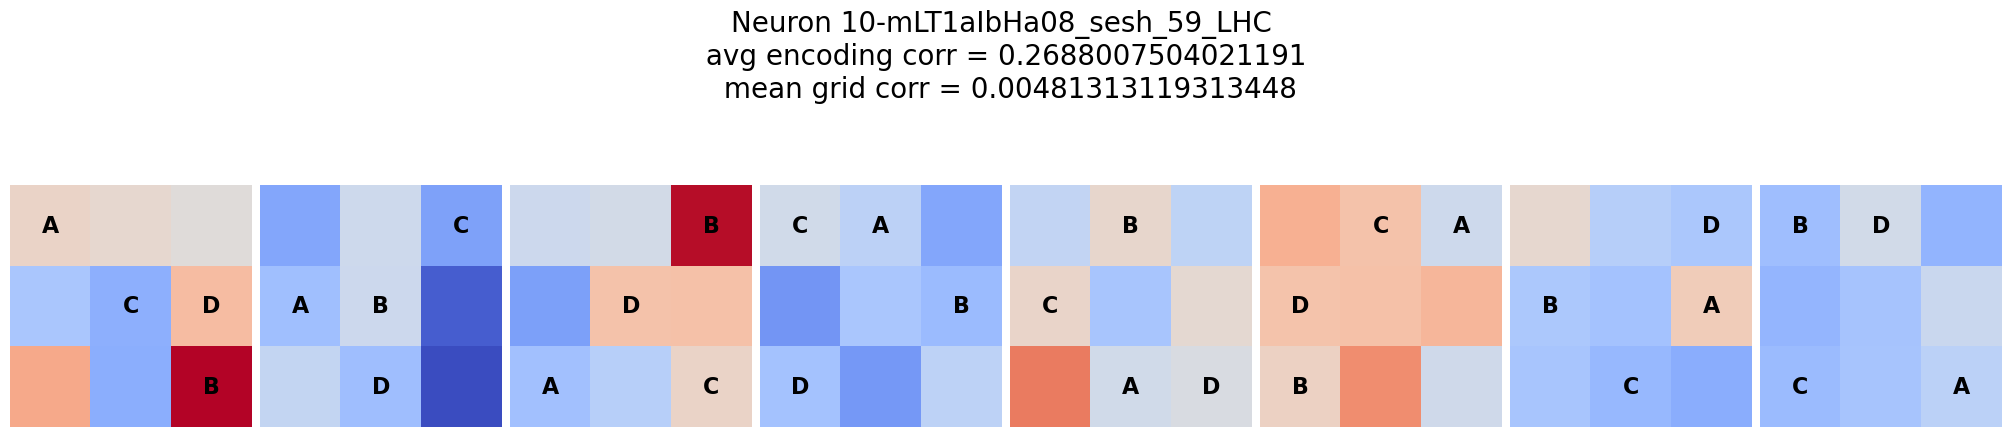

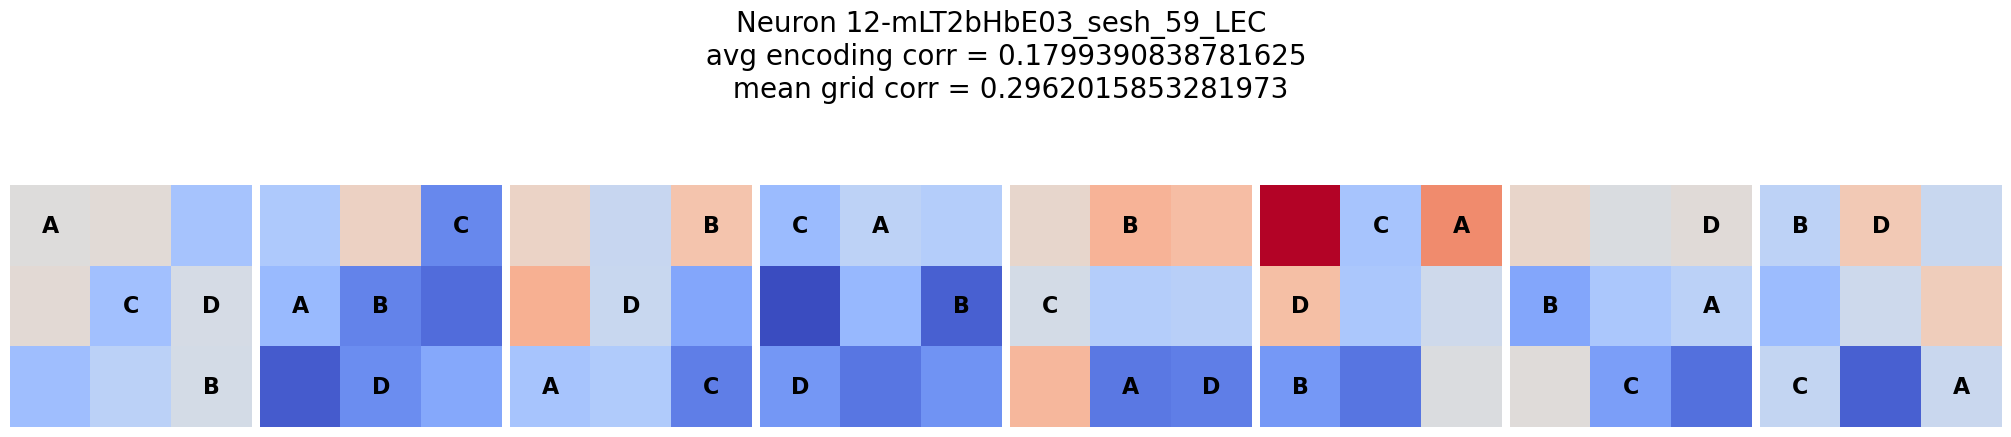

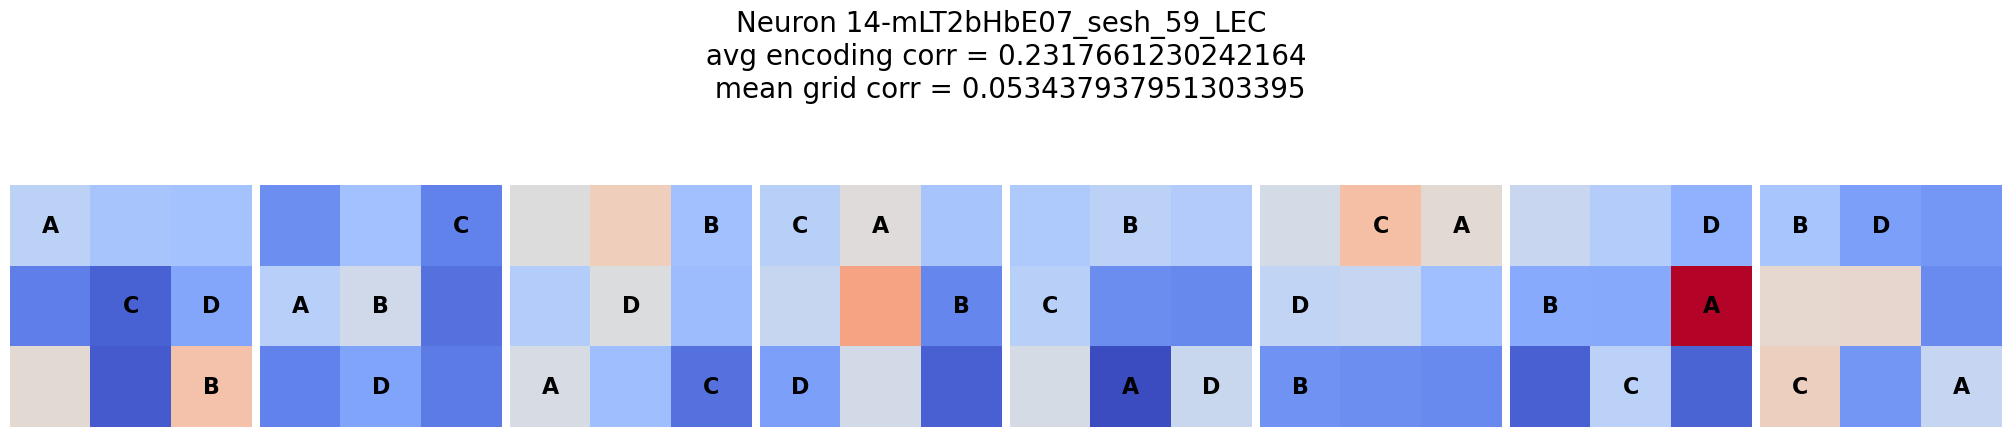

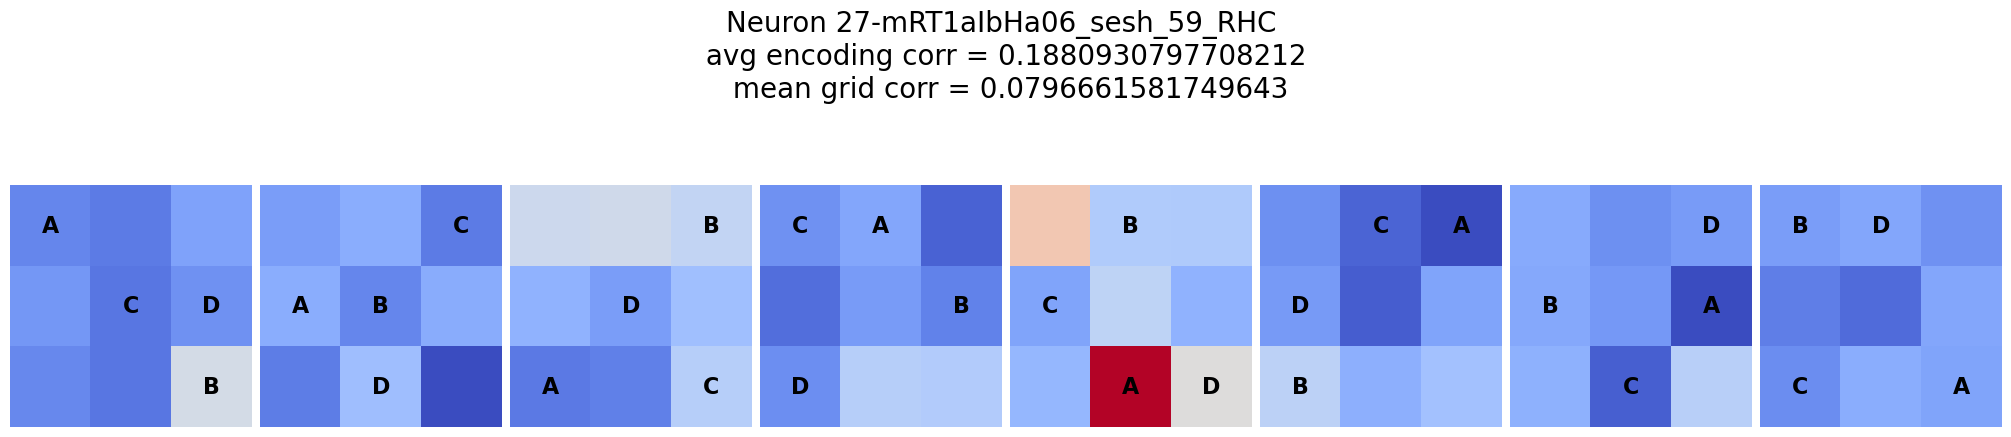

In [9]:
# DO THIS FOR ALL IN ONE BIG LOOP
data_folder = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives"

# sig_sessions_test = sig_sessions[0:3]
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))
Task_grid_plotting=np.column_stack((Task_grid[:,1],Task_grid[:,0]))


for sub in sig_sessions:
    if sub == 'sub-18':
        continue
    sesh = sub.split('-')[1]
    print(sesh)
    target_cells = []
    avg_corr_target_cells = []
    for idx, row in loc_df_sig.iterrows():
        if f"sesh_{sesh}" in row['cell']:
            target_cells.append(row['cell'])
            avg_corr_target_cells.append(row['average_corr'])
    data = mc.analyse.helpers_human_cells.load_cell_data(data_folder, [sesh])
    
    
    # go through 'electrode_labels' and figure out the correct index of the cell array.
    # take the first target cell.
    target_idx = [
        idx for idx, label_cell in enumerate(data[f"sub-{sesh}"]['electrode_labels'])
        if any(target in label_cell or label_cell in target for target in target_cells)
    ]
    
    # find out which grids are unique
    unique_grids, idx_unique_grid, idx_same_grids, counts = np.unique(data[f"sub-{sesh}"]['reward_configs'], axis=0,
                                                            return_index=True,
                                                            return_inverse=True,
                                                            return_counts=True)

    print(f"unique grids are {unique_grids}")

    firing_rate_cells = []
    for target_cell in target_idx:
        # initialise mean firing rates array for all target neurons
        mean_firing_rates_locs = np.zeros((9, len(idx_unique_grid)))
        # then go through all unique grids and concatenate the neurons to compute the firing rate for each location per grid.
        for i, unique_task_idx in enumerate(idx_unique_grid): 
            # I need to concatenate the location and cell array from the same grids.
            all_task_idx = np.where(idx_same_grids == idx_same_grids[unique_task_idx])[0]
            # print(f"same grids are in {all_task_idx}")
            all_neurons_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['neurons'])
            curr_neuron_currtask = [all_neurons[target_cell] for all_neurons in all_neurons_currtask]
            curr_neuron_currtask_flat = np.concatenate(curr_neuron_currtask)

            # DO THE SAME FOR LOCATIONS!
            all_locs_currtask = itemgetter(*all_task_idx)(data[f"sub-{sesh}"]['locations'])
            curr_locs_currtask_flat = np.concatenate(all_locs_currtask)

            for loc in range(9):
                mean_firing_rates_locs[loc, i] = curr_neuron_currtask_flat[curr_locs_currtask_flat == loc+1].mean()
                
        firing_rate_cells.append(mean_firing_rates_locs)


    # compute mean correlation between all grids
    mean_grid_corr = []
    for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
        # Compute pairwise Pearson correlation between columns (i.e., grids)
        corr_matrix = np.corrcoef(FR_maps_neuron.T)  # transpose: shape (n_grids, 9) --> correlation of grids

        # Mask upper triangle excluding diagonal
        upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
        mean_corr = np.nanmean(corr_matrix[upper_triangle_indices])  # nanmean in case of NaNs
        mean_grid_corr.append(mean_corr)
        print(f"Neuron {neuron_i}: Mean grid correlation = {mean_corr:.3f}")

        

    # firing_rate_cells is a list of (9 x N) arrays, one per neuron
    for neuron_i, FR_maps_neuron in enumerate(firing_rate_cells):
        max_rate = np.nanmax(FR_maps_neuron)
        min_rate = np.nanmin(FR_maps_neuron)

        fig1, f1_axes = plt.subplots(figsize=(20, 5), ncols=FR_maps_neuron.shape[1], nrows=1, constrained_layout=True)

        # If only one grid, f1_axes won't be iterable – wrap in list
        if FR_maps_neuron.shape[1] == 1:
            f1_axes = [f1_axes]

        for task_ind in np.arange(FR_maps_neuron.shape[1]):
            FR_map_neuron_task = FR_maps_neuron[:, task_ind].reshape(3, 3)
            ax1 = f1_axes[task_ind]

            im = ax1.matshow(FR_map_neuron_task, cmap='coolwarm', vmin=min_rate, vmax=max_rate)
            ax1.axis('off')

            for i_r, reward in enumerate(unique_grids[task_ind]):
                if i_r == 0:
                    write = 'A'
                elif i_r == 1:
                    write = 'B'
                elif i_r == 2:
                    write = 'C'
                elif i_r == 3:
                    write = 'D'
                pos_idx = int(reward) - 1  # assuming rewards are 1-based location indices
                row, col = Task_grid_plotting[pos_idx]
                ax1.text(col, row, write, ha='center', va='center',
                         color='black', fontsize=16, fontweight='bold')

        fig1.suptitle(f'Neuron {target_cells[neuron_i]} \n avg encoding corr = {avg_corr_target_cells[neuron_i]} \n mean grid corr = {mean_grid_corr[neuron_i]}', fontsize=20)
        plt.show()


[[0.05737705 0.03671706 0.06736069 0.05637255 0.05342466 0.06443914
  0.06071119 0.05228489]
 [0.05160662 0.05065533 0.075      0.06782465 0.05740181 0.08016878
  0.0548495  0.04102564]
 [0.05092593 0.03387978 0.0504451  0.05193798 0.05460751 0.06962025
  0.04589235 0.03886756]
 [0.03306524 0.05598914 0.05502846 0.06018519 0.05615826 0.05893186
  0.0438304  0.07060591]
 [0.02726734 0.06293706 0.06693364 0.08742331 0.03650336 0.05997693
  0.04350782 0.07120419]
 [0.04274736 0.03037383 0.04899777 0.03479853 0.0352867  0.04985955
  0.1122807  0.03609516]
 [0.0697599  0.03381375 0.06501548 0.04100529 0.06469003 0.03758389
  0.02674591 0.0741573 ]
 [0.02593134 0.0420354  0.04966374 0.06403941 0.02247191 0.03667482
  0.05690704 0.03840683]
 [0.07901235 0.03257329 0.03032345 0.02680566 0.06140845 0.03557312
  0.02747253 0.05966724]]


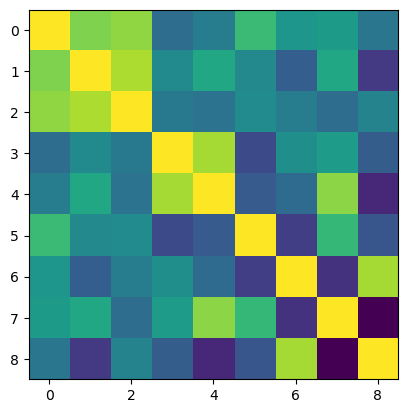

In [206]:
corr_matrix = np.corrcoef(FR_maps_neuron) 
plt.figure(); plt.imshow(corr_matrix)
print(FR_maps_neuron)

In [2]:
def matrix_triangle(a,direction='upper',return_indices=False):
    if direction=='upper':
        indices=np.triu_indices(len(a), k = 1)
    if direction=='lower':
        indices=np.tril_indices(len(a), k = -1)
    triangle=a[indices]
    if return_indices==True:
        return(triangle,indices)
    else:
        return(triangle)
    
def smooth_circular(x,sigma=10):
    return(gaussian_filter1d(np.hstack((x,x,x)),sigma,axis=0)[len(x):int(len(x)*2)])

def find_identical_indices(array_list):
    identical_groups = []
    checked = set()

    for i in range(len(array_list)):
        if i in checked:
            continue
        group = [i]
        for j in range(i + 1, len(array_list)):
            if np.array_equal(array_list[i], array_list[j]):
                group.append(j)
                checked.add(j)
        if len(group) > 1:
            identical_groups.append(group)

    return identical_groups

###Normalisation - i.e. how to get from array of raw firing rates and state times to
##normalised firing matrices

###Defining functions
def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)

def polar_plot_stateX2(meanx,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=[], structure_abstract='ABCD',fontsize=20,set_max=False,max_val=1):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    #ax=plt.subplot(111, projection='polar')
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        if set_max==False:
            ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        else:
            ax.set_rmax(max_val)
            
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        if structure_abstract=='ABCD':
            ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==False:
            ax.set_xticklabels(['A', '', '', '', 'B', '', '', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==True:
            ax.set_xticklabels(['A', '', 'B', '', 'A', '', 'B', ''],fontsize=fontsize)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=fontsize)

def arrange_plot_statecells_persessionX2(mouse_recday,neuron,Data_folder,sessions_included=None\
                                       ,fignamex=False,sigma=10,\
                                       save=False,plot=False,figtype='.svg', Marker=False,\
                                       fields_booleanx=[],measure_type='mean', abstract_structures=[],\
                                      repeated=False,behaviour_oversampling_factor=3,behaviour_rate=1000,\
                                       tracking_oversampling_factor=50):

    awake_sessions=session_dic['awake'][mouse_recday]
    awake_sessions_behaviour=session_dic_behaviour['awake'][mouse_recday]
    
    colors=np.repeat('blue',len(awake_sessions_behaviour))
    plot_boolean=np.repeat(False,len(awake_sessions_behaviour))
    plot_boolean[sessions_included]=True
    
    
    
    num_trials_day=np.load(Intermediate_object_folder+'Num_trials_'+mouse_recday+'.npy')

    fig= plt.figure(figsize=plt.figaspect(1)*4.5)
    fig.tight_layout()
    for awake_session_ind, timestamp in enumerate(awake_sessions_behaviour):
        structure_abstract=abstract_structures[awake_session_ind]
        
        if num_trials_day[awake_session_ind]<2:
            print('Not enough trials session'+str(awake_session_ind))
            continue
        if timestamp not in awake_sessions:
            print('Ephys not used for session'+str(awake_session_ind))
            continue
            
            
        try:
            norm_activity_all=np.load(Data_folder+'Neuron_'+mouse_recday+'_'+str(awake_session_ind)+'.npy')
        except:
            print('No file found session'+str(awake_session_ind))
            continue
        
        norm_activity_neuron=norm_activity_all[neuron]
        
        xxx=np.asarray(norm_activity_neuron).T
        standardized_FR=np.hstack([np.nanmean(xxx[ii],axis=0) for ii in range(len(xxx))])*\
        behaviour_oversampling_factor*behaviour_rate/tracking_oversampling_factor
        standardized_FR_sem=np.hstack([st.sem(xxx[ii],axis=0,nan_policy='omit') for ii in range(len(xxx))])*\
        behaviour_oversampling_factor*behaviour_rate/tracking_oversampling_factor
        standardized_FR_smoothed=smooth_circular(standardized_FR,sigma=sigma)            
        standardized_FR_sem_smoothed=smooth_circular(standardized_FR_sem,sigma=sigma)                    

        
        standardized_FR_smoothed_upper=standardized_FR_smoothed+standardized_FR_sem_smoothed
        standardized_FR_smoothed_lower=standardized_FR_smoothed-standardized_FR_sem_smoothed
       
        
        color=colors[awake_session_ind]
        
        ax = fig.add_subplot(1, len(awake_sessions_behaviour), awake_session_ind+1, projection='polar')
        if len(fields_booleanx)>0:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=Marker,fields_booleanx=fields_booleanx[awake_session_ind],\
                             structure_abstract=structure_abstract,repeated=repeated)
        else:
            polar_plot_stateX2(standardized_FR_smoothed,standardized_FR_smoothed_upper,standardized_FR_smoothed_lower,\
                              ax,color=color, Marker=False,structure_abstract=structure_abstract,repeated=repeated)
    plt.margins(0,0)
    #plt.tight_layout()
    if save==True:
        plt.savefig(fignamex+str(awake_session_ind)+figtype)
    if plot==True & plot_boolean[awake_session_ind]==True:
        plt.show()
    else:
        plt.close() 

In [3]:
###Folders

#Input_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Human/'
#Ephys_output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'
#Behaviour_output_folder= 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Behaviour/'


Input_folder = '/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives/group/best_cells'

#Ephys_output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'
#Behaviour_output_folder= 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Behaviour/'




In [4]:
'''
reward_configs: a dictionary that contains a numpy of the different reward configurations, 
locations: a list of arrays of length n grids for the neuron, for the location the subjects were on. 
timings: It also contains a list of arrays for the timings, which are of dimensions n= number of repeats in this grid x 5. 
Time one corresponds to when they start state 'A',
the other 4 respectively refer to when they are entering a 'new state' i.e. uncovering a reward.

'''

"\nreward_configs: a dictionary that contains a numpy of the different reward configurations, \nlocations: a list of arrays of length n grids for the neuron, for the location the subjects were on. \ntimings: It also contains a list of arrays for the timings, which are of dimensions n= number of repeats in this grid x 5. \nTime one corresponds to when they start state 'A',\nthe other 4 respectively refer to when they are entering a 'new state' i.e. uncovering a reward.\n\n"

In [8]:
##Defining Task grid
from scipy.spatial import distance_matrix
from itertools import product
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))
Task_grid_plotting=np.column_stack((Task_grid[:,1],Task_grid[:,0]))
Task_grid_plotting2=[]
for yy in np.arange(3):
    y=int(yy*2)
    for xx in np.arange(3):
        x=int(xx*2)    
        Task_grid_plotting2.append([x,y])
Task_grid_plotting2=np.asarray(Task_grid_plotting2)    
Task_grid2=np.column_stack((Task_grid_plotting2[:,1],Task_grid_plotting2[:,0]))
num_locations=9

In [6]:
import pickle
path=Input_folder+'/RHC_33_25_best_for_location_reg_raw'

with open(path, 'rb') as f:
    cell_dict = pickle.load(f)

In [7]:
###space
###decent:'/LEC_0_sub-31_best_for_location_reg'
###decent:'/LHC_0_sub-04_best_for_location_reg'
###bad:'/LEC_0_sub-15_best_for_location_reg'



###State
##'/LHC_2_sub-12_best_for_state_reg'
##/LHC_5_sub-25_best_for_state_reg
###'LINS_4_sub-50_best_for_state_reg'
##REC_11_sub-15_best_for_location_reg - not a lot of trials


In [8]:
cell_dict.keys()

dict_keys(['RHC_33_25', 'reward_configs', 'locations', 'timings'])

In [9]:
###concatenating sessions of the same task

Tasks=cell_dict['reward_configs']
identical_task_indices=find_identical_indices(Tasks)
unique_tasks=Tasks[[identical_task_indices[ii][0] for ii in range(len(identical_task_indices))]]

Activity_all=cell_dict[list(cell_dict.keys())[0]]
Location_all=cell_dict['locations']


Activity_all_pertask=[]
Location_all_pertask=[]

for task_ind in np.arange(len(unique_tasks)):
    ses_indices=identical_task_indices[task_ind]
    
    Activity_task=np.hstack((np.asarray(Activity_all)[ses_indices]))
    Location_task=np.hstack((np.asarray(Location_all)[ses_indices]))
    
    Activity_all_pertask.append(Activity_task)
    Location_all_pertask.append(Location_task)
    


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/3090607093.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Activity_task=np.hstack((np.asarray(Activity_all)[ses_indices]))
/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/3090607093.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Location_task=np.hstack((np.asarray(Location_all)[ses_indices]))


In [10]:
'''
To plot:
1-place maps
2-state maps - predicted vs actual

'''

'\nTo plot:\n1-place maps\n2-state maps - predicted vs actual\n\n'

In [11]:
Task_grid_plotting

array([[0, 0],
       [1, 0],
       [2, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [0, 2],
       [1, 2],
       [2, 2]])

In [7]:
###Spatial maps
FR_maps_neuron=np.zeros((len(Activity_all_pertask),3,3))
FR_maps_neuron[:]=np.nan

FR_arrays_neuron=np.zeros((len(Activity_all_pertask),9))
FR_maps_neuron[:]=np.nan

for task_ind in np.arange(len(Activity_all_pertask)):
    Activity_task=Activity_all_pertask[task_ind]
    #print(len(Activity_ses))

    location_task=Location_all_pertask[task_ind]-1
    #print(len(location_ses))


    FR_array=st.binned_statistic(location_task,Activity_task,bins=np.arange(10))[0]

    FR_map=np.zeros((3,3))
    FR_map[:]=np.nan

    for loc_ind in np.arange(num_locations):
        FR_map[Task_grid_plotting[loc_ind][0],Task_grid_plotting[loc_ind][1]]=FR_array[loc_ind]
    FR_maps_neuron[task_ind]=FR_map

NameError: name 'Activity_all_pertask' is not defined

In [13]:
FR_array

array([0.20145712, 0.20339252, 0.20785433, 0.20337863, 0.18891549,
       0.20707596, 0.19303675, 0.18177948, 0.18208036])

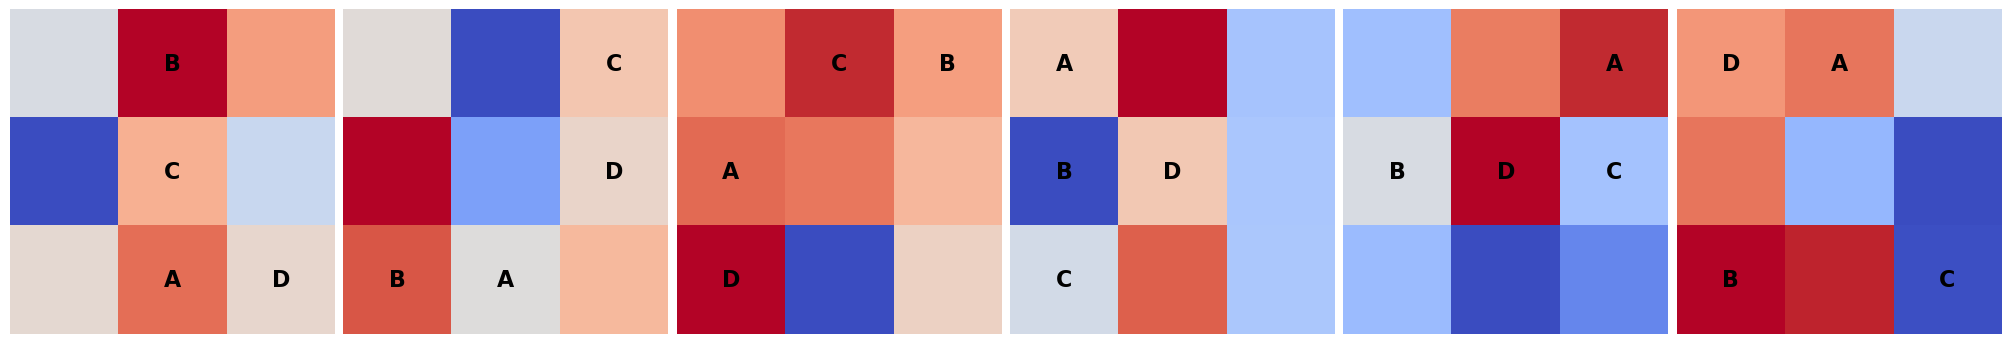

In [14]:
max_rate=np.nanmax(FR_maps_neuron)
min_rate=np.nanmin(FR_maps_neuron)

fig1, f1_axes = plt.subplots(figsize=(20, 20),ncols=len(FR_maps_neuron), nrows=1, constrained_layout=True)  
for task_ind in np.arange(len(FR_maps_neuron)):
    FR_map_neuron_task=FR_maps_neuron[task_ind]
    ax1=f1_axes[task_ind]
    ax1.matshow(FR_map_neuron_task, cmap='coolwarm')
    ax1.axis('off')
    for i_r, reward in enumerate(unique_tasks[task_ind]):
        if i_r == 0:
            write = 'A'
        elif i_r == 1:
            write = 'B'
        elif i_r == 2:
            write = 'C'
        elif i_r == 3:
            write = 'D'
        pos_idx = int(reward) - 1  # adjust to 0-index
        # Retrieve the row, col coordinates from Task_grid_plotting
        row, col = Task_grid_plotting[pos_idx]
        # Print the letter over the respective cell.
        ax1.text(col, row, write, ha='center', va='center',
                 color='black', fontsize=16, fontweight='bold')
            
            
            
plt.axis('off') 
plt.show()


In [15]:
unique_tasks

array([[6., 4., 5., 9.],
       [6., 3., 7., 8.],
       [2., 7., 4., 3.],
       [1., 2., 3., 5.],
       [7., 2., 8., 5.],
       [4., 3., 9., 1.]])

In [16]:
FR_maps_neuron

array([[[0.19257221, 0.20950563, 0.20099432],
        [0.17696867, 0.19943347, 0.19093988],
        [0.19414704, 0.20453773, 0.19458048]],

       [[0.1995296 , 0.18596828, 0.20228083],
        [0.21242236, 0.19137597, 0.20057307],
        [0.20956594, 0.19928327, 0.20352898]],

       [[0.18678304, 0.19676012, 0.18467304],
        [0.19090358, 0.18957968, 0.1808978 ],
        [0.19882367, 0.14513274, 0.17562254]],

       [[0.21271008, 0.22940156, 0.20136519],
        [0.18795394, 0.21312756, 0.20173805],
        [0.20716639, 0.22420965, 0.20194647]],

       [[0.17725632, 0.19780546, 0.20379024],
        [0.1842863 , 0.20536956, 0.17771798],
        [0.17672209, 0.16491754, 0.17055948]],

       [[0.20145712, 0.20337863, 0.19303675],
        [0.20339252, 0.18891549, 0.18177948],
        [0.20785433, 0.20707596, 0.18208036]]])

In [17]:
FR_arrays=np.vstack((FR_maps_neuron.T)).T
np.nanmean(matrix_triangle(np.corrcoef(FR_arrays)))

-0.023029491068023364

_____
Example output neuron
trials x normalised time bins
dashed lines represent reward times
0
32101


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/688750525.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])


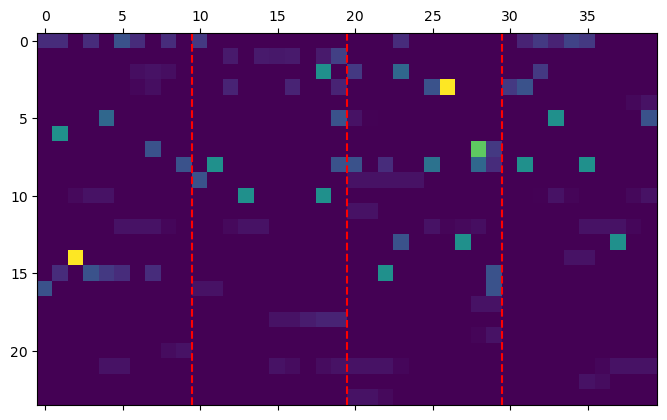

1
14474


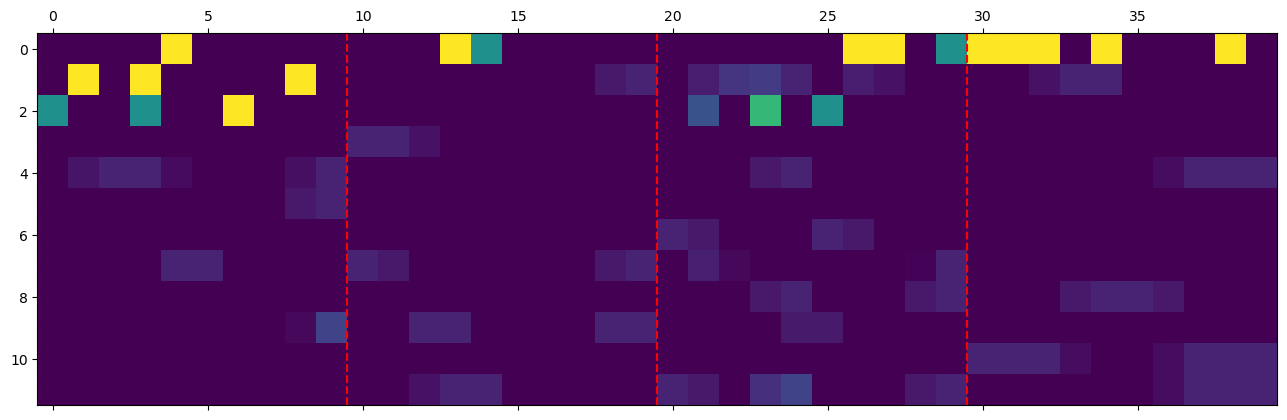

2
19355


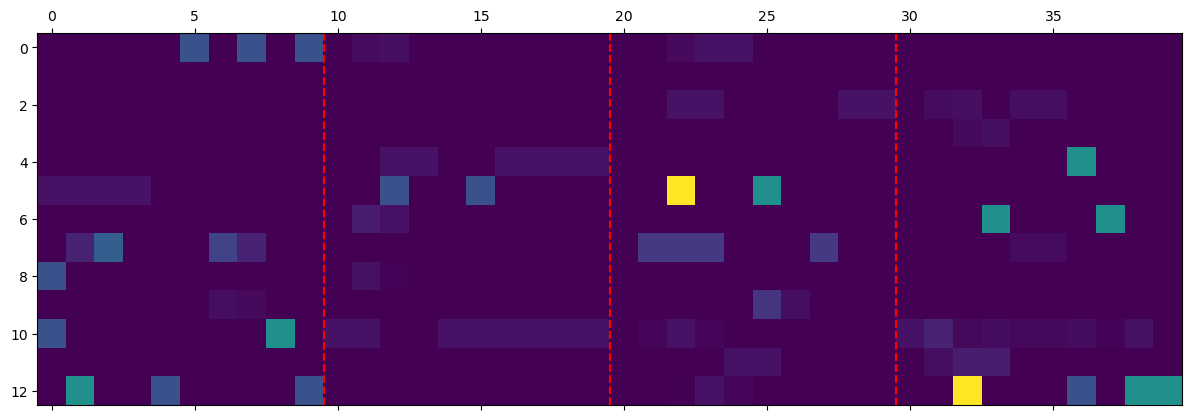

3
7207


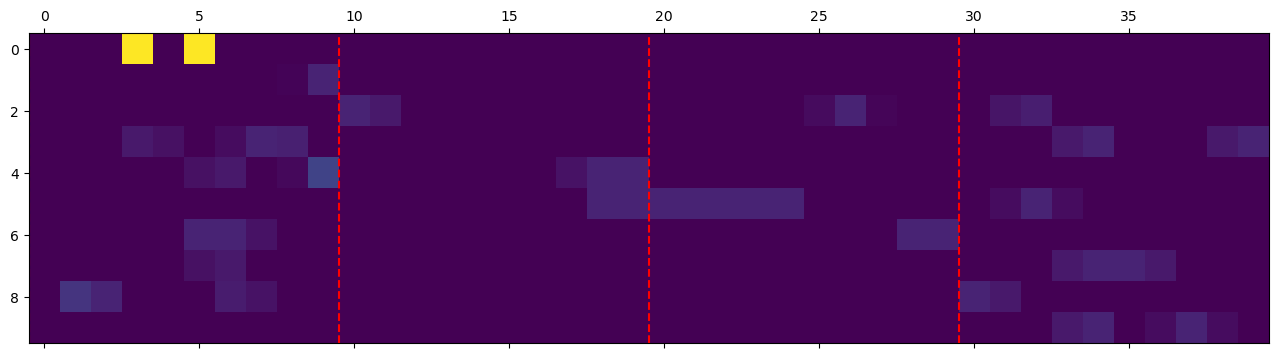

4
12015


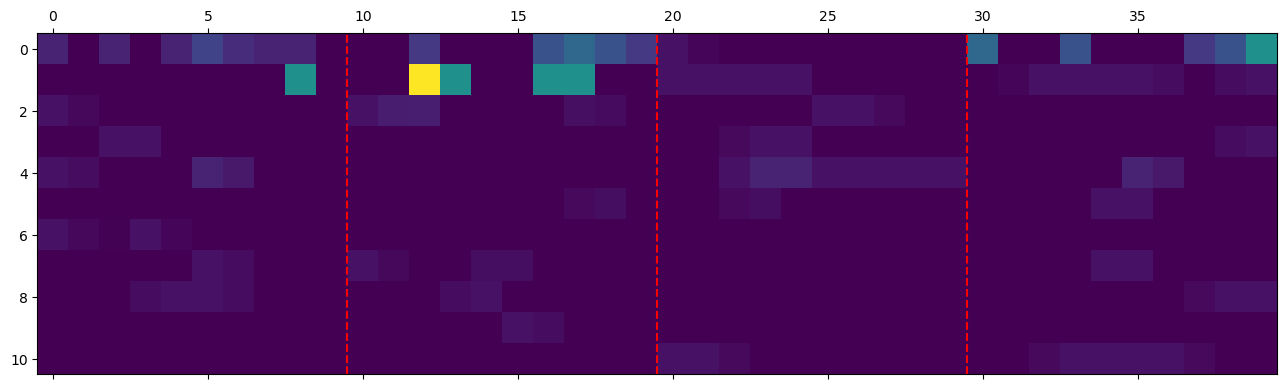

5
22840


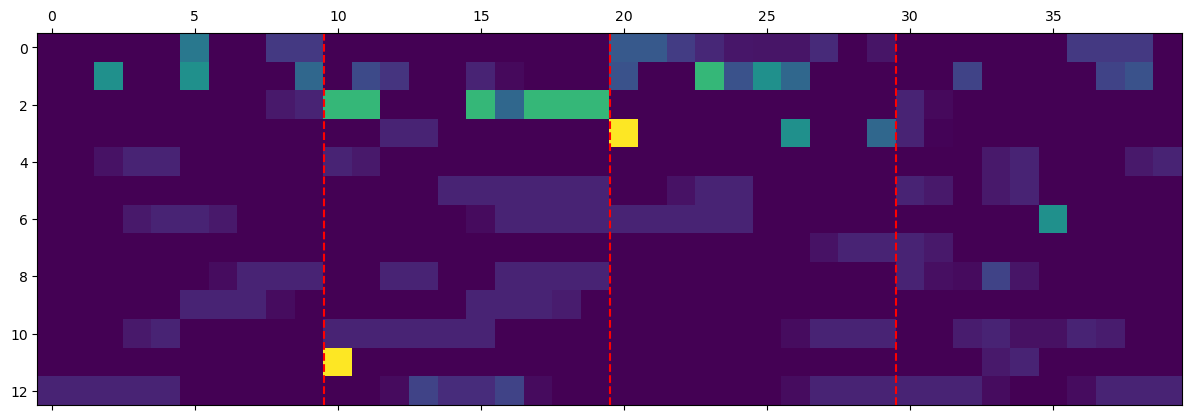

6
10000


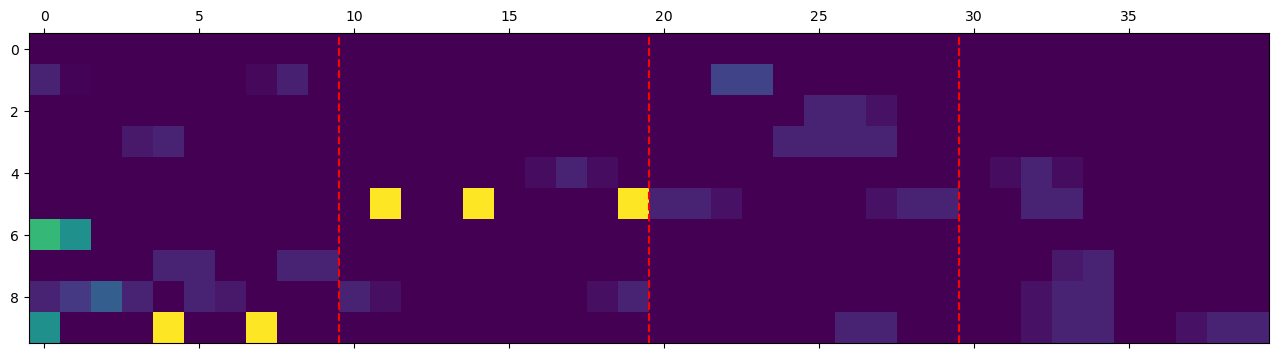

7
7861


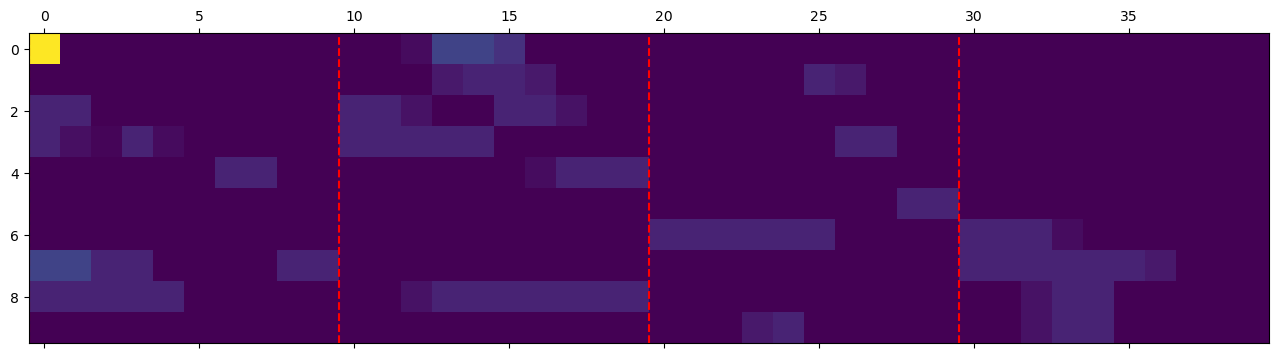

8
7800


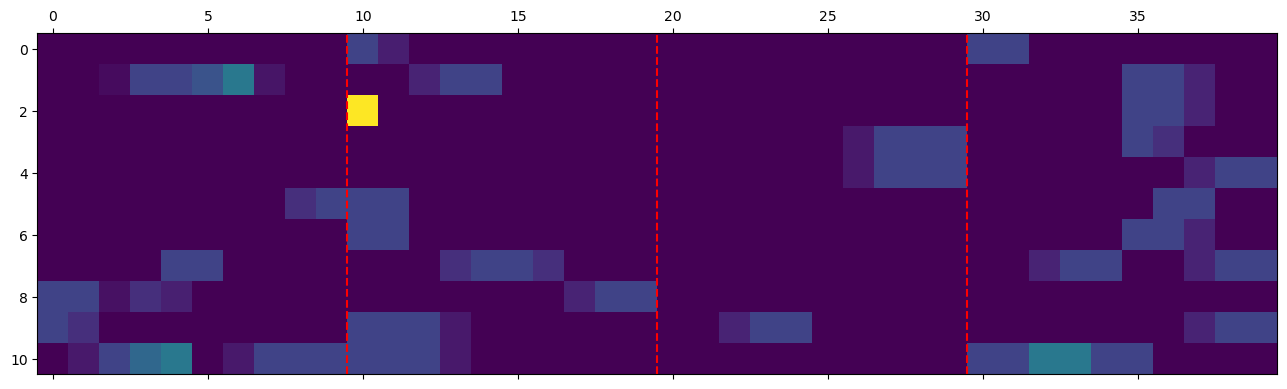

9
55007
Error - Not plotted
10
15538


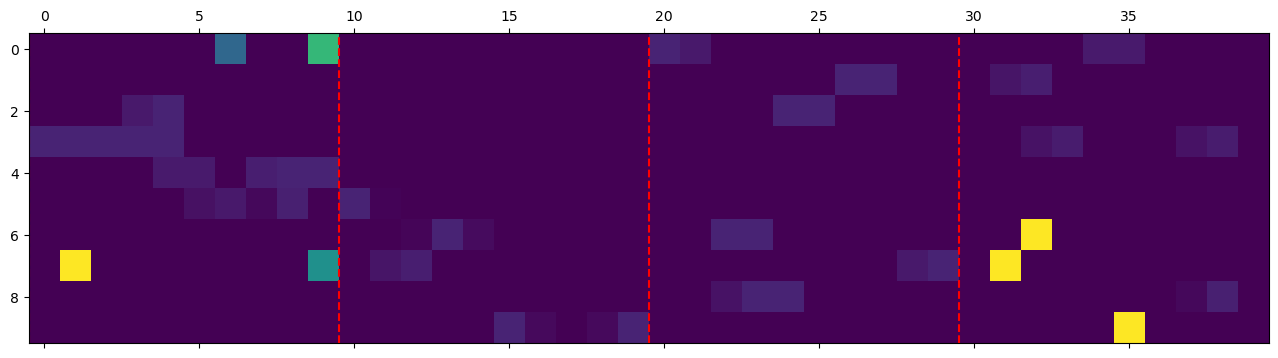

11
13601


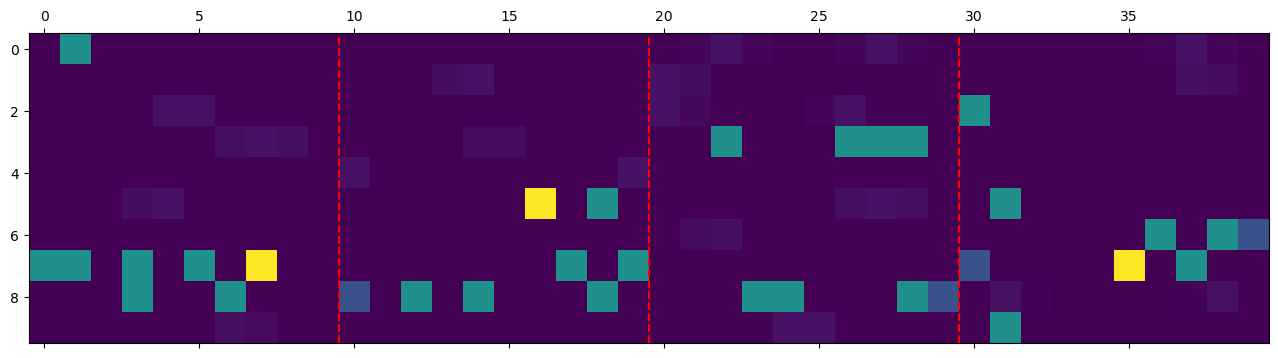

12
13013


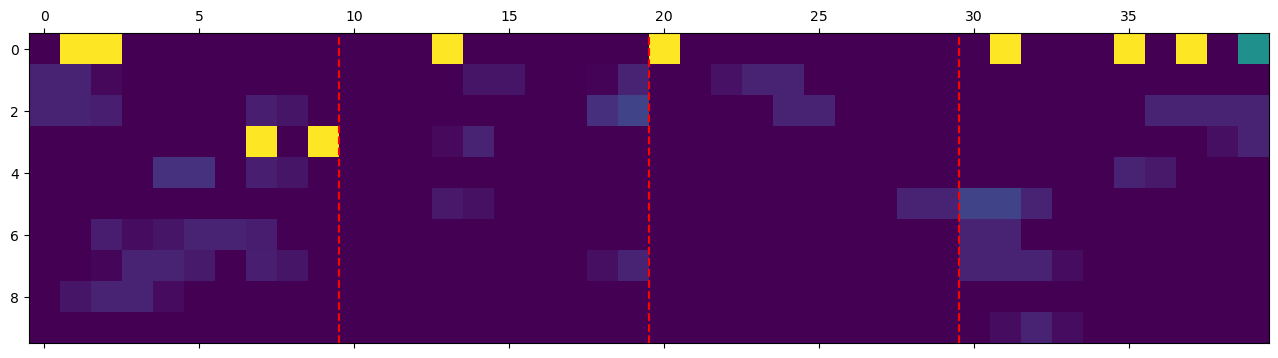

13
11671


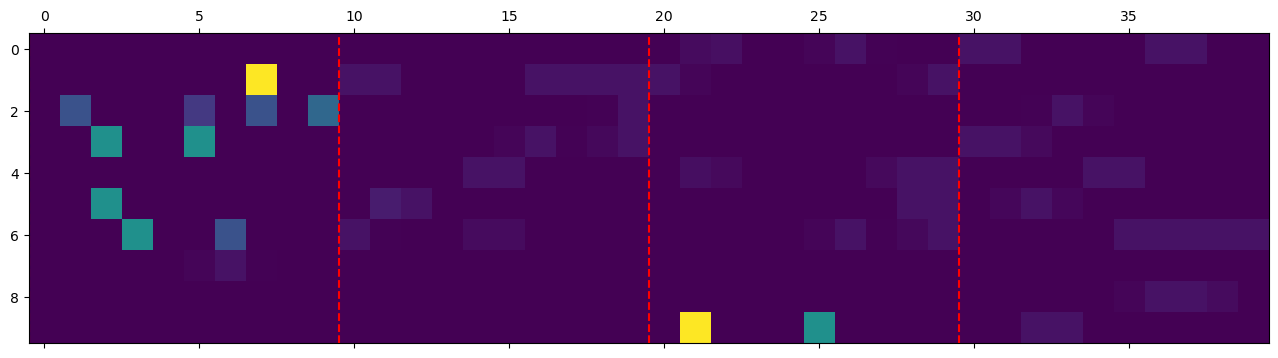

14
10642


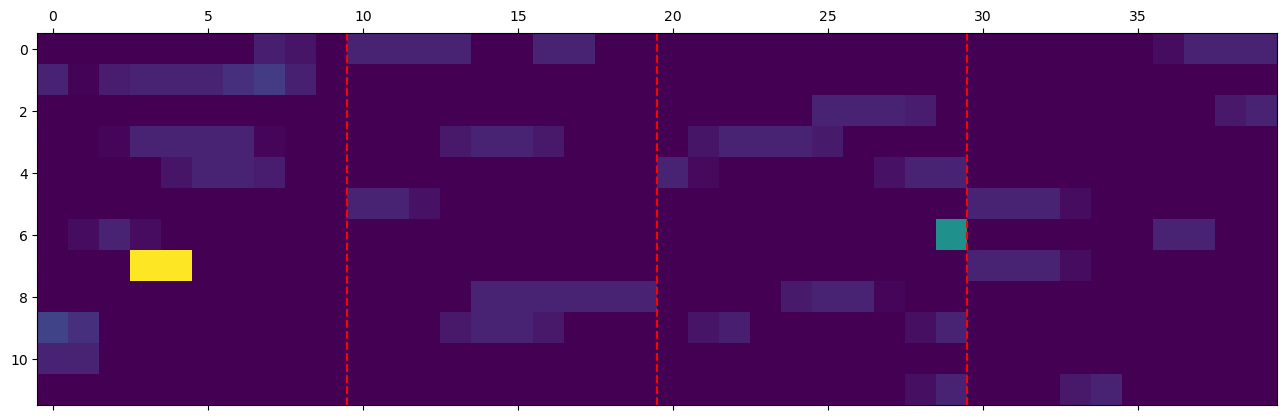

15
6517


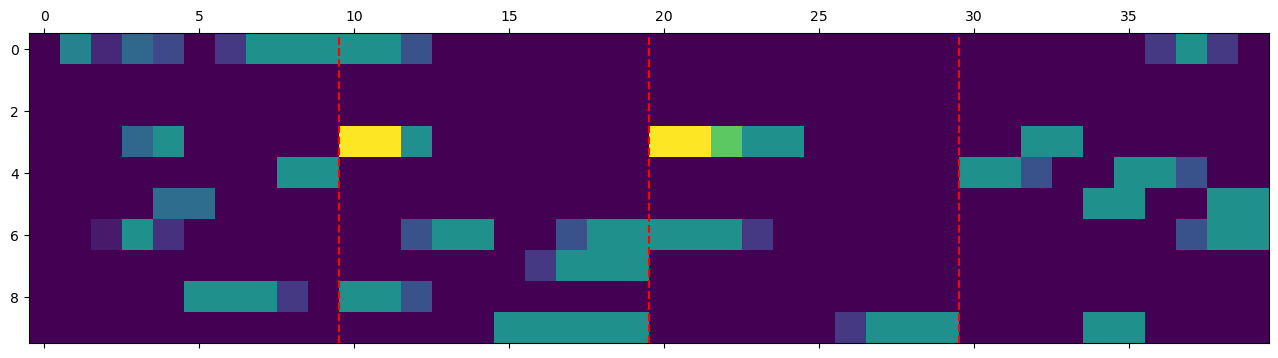

16
12580


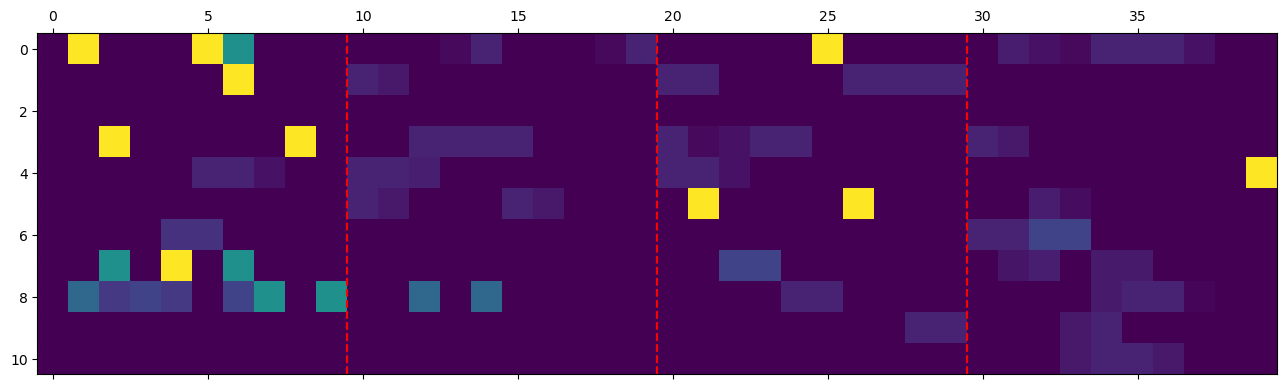

17
10030


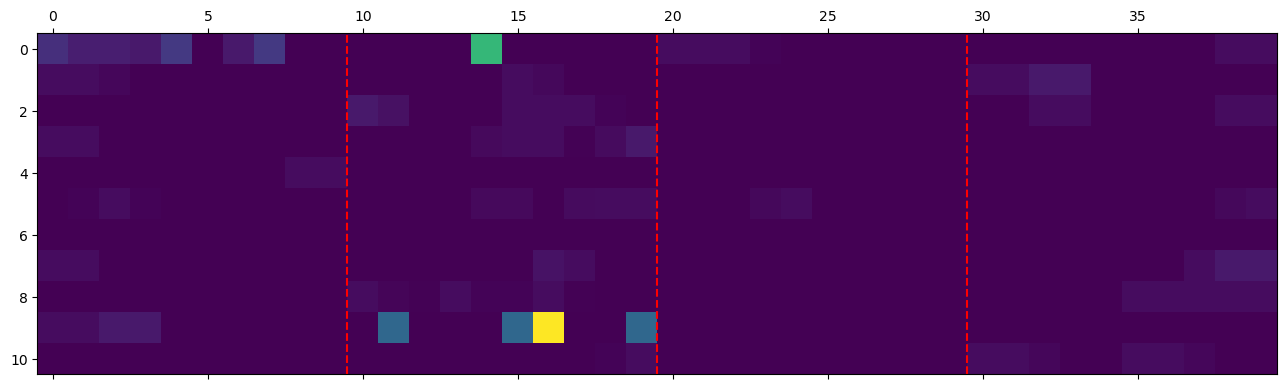

18
10895


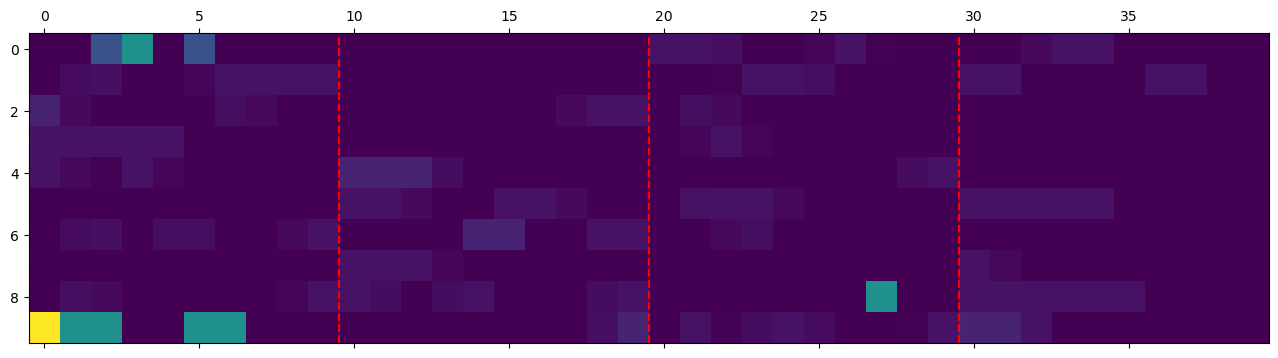

19
7126


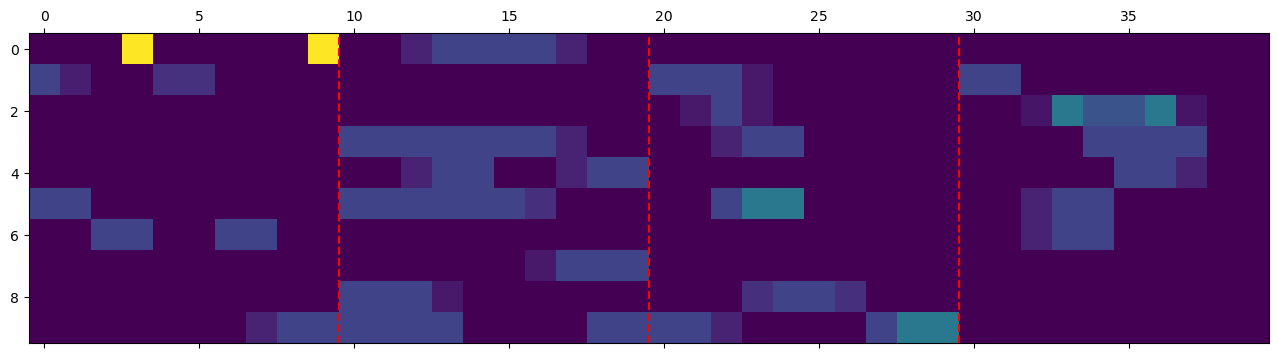

20
11444


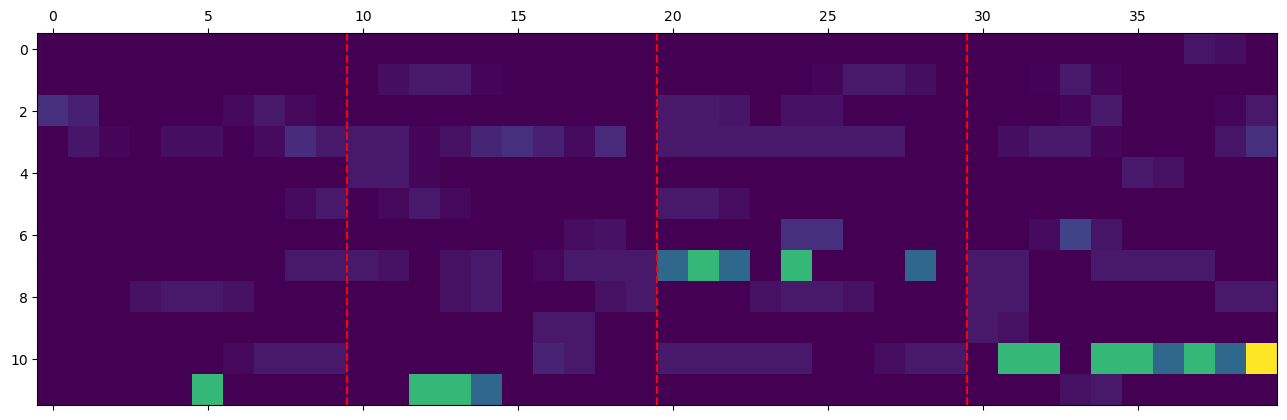

21
9770


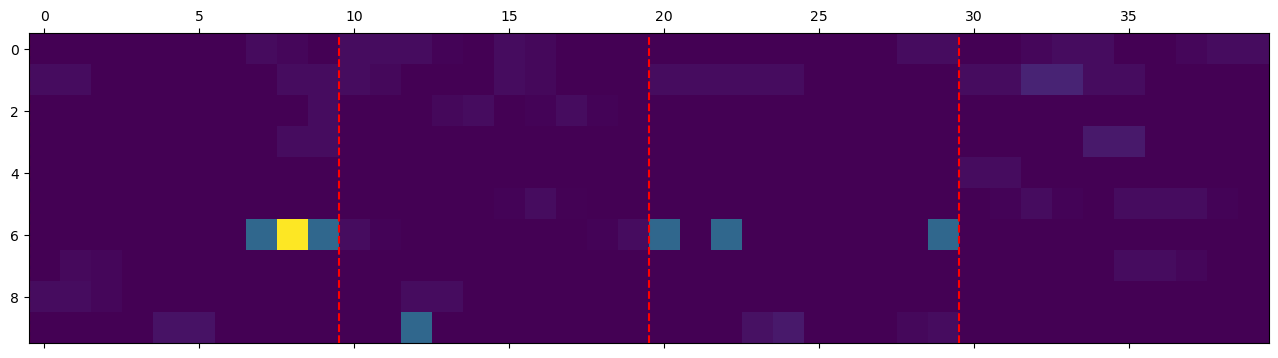

In [18]:
###Example

num_bins=10
num_states=4
num_phases=3
Neuron_norm_all=[]

print('_____')
print('Example output neuron')
print('trials x normalised time bins')
print('dashed lines represent reward times')
for ses_ind in range(len(Activity_all)):
    print(ses_ind)
    Neuron_raw=Activity_all[ses_ind]

    Trial_times=(cell_dict['timings'][ses_ind]).astype(int)
    if len(np.shape(Trial_times))!=2:
        Neuron_norm_all.append([])
        print('Not enough trials')
        continue
    num_trials=len(Trial_times)
    
    num_neurons=len(Neuron_raw)

    ##Normalisation
    Trial_times_conc=np.hstack((np.concatenate(Trial_times[:,:-1]),Trial_times[-1,-1]))//25

    Neuron_raw_neuron=Neuron_raw
    print(len(Neuron_raw_neuron))
    Neuron_raw_neuron_split=partition(list(Neuron_raw_neuron), list(Trial_times_conc))
    try:
        Neuron_raw_neuron_split_norm=np.asarray([normalise(Neuron_raw_neuron_split[ii],num_bins=num_bins)\
                                             for ii in np.arange(len(Neuron_raw_neuron_split))])
    except:
        print('Error - Not plotted')
        Neuron_norm_all.append([])
        continue
    Neuron_norm=(Neuron_raw_neuron_split_norm.reshape(len(Neuron_raw_neuron_split_norm)//4,\
                                                      len(Neuron_raw_neuron_split_norm[0])*4))
    
    ###plotting example

    plt.matshow(Neuron_norm[1:]) ##excluding first trial
    for angle in np.arange(4)*10:
        plt.axvline(angle-0.5,color='red',ls='dashed')
    plt.show()
    
    Neuron_norm_all.append(Neuron_norm)

In [19]:
import pickle
path=Input_folder+'/RpgACC_5_3_best_for_clo_model_binned'
with open(path, 'rb') as f:
    cell_dict = pickle.load(f)

In [20]:
###concatenating sessions of the same task
cell_dict.keys()
Tasks=cell_dict['reward_configs']
identical_task_indices=find_identical_indices(Tasks)
unique_tasks=Tasks[[identical_task_indices[ii][0] for ii in range(len(identical_task_indices))]]

Activity_all=cell_dict[list(cell_dict.keys())[0]]
Location_all=cell_dict['locations']


Activity_all_pertask=[]
Location_all_pertask=[]

for task_ind in np.arange(len(unique_tasks)):
    ses_indices=identical_task_indices[task_ind]
    
    Activity_task=np.hstack((np.asarray(Activity_all)[ses_indices]))
    Location_task=np.hstack((np.asarray(Location_all)[ses_indices]))
    
    Activity_all_pertask.append(Activity_task)
    Location_all_pertask.append(Location_task)
    

/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/847017041.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Activity_task=np.hstack((np.asarray(Activity_all)[ses_indices]))
/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/847017041.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Location_task=np.hstack((np.asarray(Location_all)[ses_indices]))


In [21]:
print(unique_tasks)

[[3. 9. 4. 6.]
 [9. 8. 6. 4.]
 [7. 5. 8. 1.]
 [1. 5. 2. 3.]
 [7. 3. 1. 9.]
 [2. 1. 5. 8.]]


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/688750525.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)


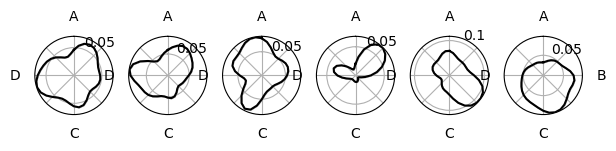

In [22]:
repeated=False
fig= plt.figure(figsize=plt.figaspect(1)*4.5)
fig.tight_layout()
sigma=2
for ses_ind in range(len(Activity_all_pertask)):
    Neuron_norm=Neuron_norm_all[ses_ind]
    if len(Neuron_norm)==0:
        continue
    mean_=np.nanmean(Neuron_norm,axis=0)
    mean_smooth=smooth_circular(mean_,sigma=sigma)  
    
    sem_=st.sem(Neuron_norm,axis=0,nan_policy='omit')
    sem_smooth=smooth_circular(sem_,sigma=sigma) 
    upperx=mean_smooth#+sem_
    lowerx=mean_smooth#+sem_
    
    ax = fig.add_subplot(1, len(Activity_all), ses_ind+1, projection='polar')
    polar_plot_stateX2(mean_smooth,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                          fields_booleanx=[], structure_abstract='ABCD',fontsize=10,set_max=False,max_val=1)

In [23]:
###concatenating sessions of the same task

Tasks=cell_dict['reward_configs']
identical_task_indices=find_identical_indices(Tasks)
unique_tasks=Tasks[[identical_task_indices[ii][0] for ii in range(len(identical_task_indices))]]



Neuron_norm_all_pertask=[]

for task_ind in np.arange(len(unique_tasks)):
    ses_indices=identical_task_indices[task_ind]
    

    
    Neuron_norm_task=[]
    for ses_ind in ses_indices:
        Trial_times=(cell_dict['timings'][ses_ind]).astype(int)
        if len(np.shape(Trial_times))!=2:
            #Neuron_norm_task.append([])
            print('Not enough trials')
            continue
        num_trials=len(Trial_times)
        num_neurons=len(Neuron_raw)

        ##Normalisation
        Trial_times_conc=np.hstack((np.concatenate(Trial_times[:,:-1]),Trial_times[-1,-1]))//25

        Neuron_raw_neuron=Neuron_raw
        print(len(Neuron_raw_neuron))
        Neuron_raw_neuron_split=partition(list(Neuron_raw_neuron), list(Trial_times_conc))
        try:
            Neuron_raw_neuron_split_norm=np.asarray([normalise(Neuron_raw_neuron_split[ii],num_bins=num_bins)\
                                                 for ii in np.arange(len(Neuron_raw_neuron_split))])
        except:
            print('Error - Not plotted')
            Neuron_norm_all.append([])
            continue
        Neuron_norm=(Neuron_raw_neuron_split_norm.reshape(len(Neuron_raw_neuron_split_norm)//4,\
                                                          len(Neuron_raw_neuron_split_norm[0])*4))
        
        Neuron_norm_task.append(Neuron_norm)
        
    Neuron_norm_task=np.vstack((Neuron_norm_task))
    Neuron_norm_all_pertask.append(Neuron_norm_task)


9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770
9770


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/688750525.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])


/var/folders/h2/_86s79551w1734r87y2wlkk40000gt/T/ipykernel_26261/688750525.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)


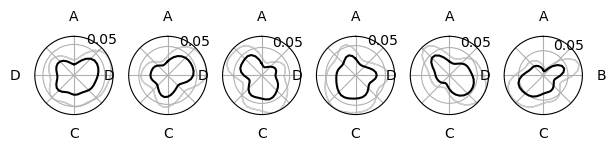

In [24]:
repeated=False
fig= plt.figure(figsize=plt.figaspect(1)*4.5)
fig.tight_layout()
sigma=2
for task_ind in range(len(Neuron_norm_all_pertask)):
    Neuron_norm=Neuron_norm_all_pertask[task_ind]
    if len(Neuron_norm)==0:
        continue
    mean_=np.nanmean(Neuron_norm,axis=0)
    mean_smooth=smooth_circular(mean_,sigma=sigma)  
    
    sem_=st.sem(Neuron_norm,axis=0,nan_policy='omit')
    sem_smooth=smooth_circular(sem_,sigma=sigma) 
    upperx=mean_smooth+sem_smooth
    lowerx=mean_smooth+sem_smooth
    
    ax = fig.add_subplot(1, len(Activity_all), task_ind+1, projection='polar')
    polar_plot_stateX2(mean_smooth,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                          fields_booleanx=[], structure_abstract='ABCD',fontsize=10,set_max=False,max_val=1)